In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/arxiv_ai_ethics.csv')
data.head()

id        submitter  \
0  1005.0928     Antti Airola   
1  1005.1518     Liane Gabora   
2  1110.2212         F. Rossi   
3  1210.7154  Patrick Lambrix   
4  1302.4957  David Heckerman   

                                             authors  \
0     Antti Airola, Tapio Pahikkala, Tapio Salakoski   
1                                       Liane Gabora   
2            F. Rossi, K. B. Venable, N. Yorke-Smith   
3  Patrick Lambrix, Zlatan Dragisic, Valentina Iv...   
4                        David Heckerman, Dan Geiger   

                                               title  \
0  Training linear ranking SVMs in linearithmic t...   
1  Recognizability of Individual Creative Style W...   
2  Uncertainty in Soft Temporal Constraint Proble...   
3  Get my pizza right: Repairing missing is-a rel...   
4  Learning Bayesian Networks: A Unification for ...   

                                            comments  \
0                                20 pages, 4 figures   
1  6 pages, submitted to Annual Meeting of the Co...   
2                                                NaN   
3                                                NaN   
4  This version has improved pointers to the lite...   

                                         journal-ref  \
0    Pattern Recognit. Lett. 32(9): 1328-1336 (2011)   
1  In S. Ohlsson & R. Catrambone (Eds.), Proceedi...   
2  Journal Of Artificial Intelligence Research, V...   
3                                                NaN   
4                                                NaN   

                            doi              report-no categories  \
0  10.1016/j.patrec.2011.03.014                    NaN    stat.ML   
1                           NaN                    NaN      cs.AI   
2             10.1613/jair.2135                    NaN      cs.AI   
3   10.1007/978-3-642-37996-3_2                    NaN      cs.AI   
4                           NaN  UAI-P-1995-PG-274-284      cs.AI   

                                             license  \
0  http://arxiv.org/licenses/nonexclusive-distrib...   
1  http://arxiv.org/licenses/nonexclusive-distrib...   
2  http://arxiv.org/licenses/nonexclusive-distrib...   
3  http://arxiv.org/licenses/nonexclusive-distrib...   
4        http://creativecommons.org/licenses/by/4.0/   

                                            abstract  \
0    We introduce an efficient method for trainin...   
1    It is hypothesized that creativity arises fr...   
2    In real-life temporal scenarios, uncertainty...   
3    With the increased use of ontologies in sema...   
4    We examine Bayesian methods for learning Bay...   

                                            versions update_date  \
0  [{'version': 'v1', 'created': 'Thu, 6 May 2010...  2022-02-07   
1  [{'version': 'v1', 'created': 'Mon, 10 May 201...  2019-07-11   
2  [{'version': 'v1', 'created': 'Mon, 10 Oct 201...  2021-04-12   
3  [{'version': 'v1', 'created': 'Fri, 26 Oct 201...  2023-11-13   
4  [{'version': 'v1', 'created': 'Wed, 20 Feb 201...  2021-07-01   

                                      authors_parsed          Category  
0  [['Airola', 'Antti', ''], ['Pahikkala', 'Tapio...  AI-Ethics papers  
1                          [['Gabora', 'Liane', '']]  AI-Ethics papers  
2  [['Rossi', 'F.', ''], ['Venable', 'K. B.', '']...  AI-Ethics papers  
3  [['Lambrix', 'Patrick', ''], ['Dragisic', 'Zla...  AI-Ethics papers  
4  [['Heckerman', 'David', ''], ['Geiger', 'Dan',...  AI-Ethics papers

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489 entries, 0 to 6488
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              6489 non-null   float64
 1   submitter       6489 non-null   object 
 2   authors         6489 non-null   object 
 3   title           6489 non-null   object 
 4   comments        3952 non-null   object 
 5   journal-ref     494 non-null    object 
 6   doi             617 non-null    object 
 7   report-no       25 non-null     object 
 8   categories      6489 non-null   object 
 9   license         6489 non-null   object 
 10  abstract        6489 non-null   object 
 11  versions        6489 non-null   object 
 12  update_date     6489 non-null   object 
 13  authors_parsed  6489 non-null   object 
 14  Category        6489 non-null   object 
dtypes: float64(1), object(14)
memory usage: 760.6+ KB


In [ ]:
# Turning the 'update_date' column into a datetime format column
data['update_date'] = pd.to_datetime(data['update_date'])
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489 entries, 0 to 6488
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              6489 non-null   float64       
 1   submitter       6489 non-null   object        
 2   authors         6489 non-null   object        
 3   title           6489 non-null   object        
 4   comments        3952 non-null   object        
 5   journal-ref     494 non-null    object        
 6   doi             617 non-null    object        
 7   report-no       25 non-null     object        
 8   categories      6489 non-null   object        
 9   license         6489 non-null   object        
 10  abstract        6489 non-null   object        
 11  versions        6489 non-null   object        
 12  update_date     6489 non-null   datetime64[ns]
 13  authors_parsed  6489 non-null   object        
 14  Category        6489 non-null   object        
dtypes: d

<ipython-input-7-bcb28f738ef7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['categories'], palette="husl", order=data['categories'].value_counts(ascending=True).index)


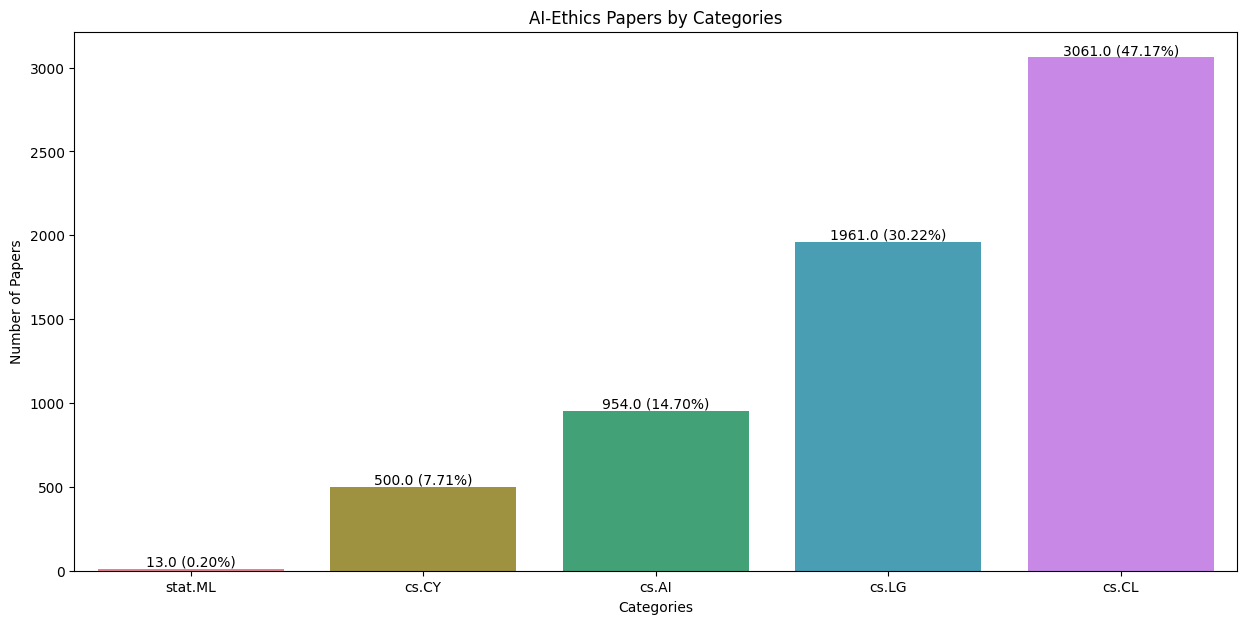

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

# Create the countplot
ax = sns.countplot(x=data['categories'], palette="husl", order=data['categories'].value_counts(ascending=True).index)

# Calculate absolute values for each category
abs_values = data['categories'].value_counts(ascending=False)

# Loop through the bars and add labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / len(data) * 100:.2f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the legend
plt.title('AI-Ethics Papers by Categories')
plt.xlabel("Categories")
plt.ylabel("Number of Papers")
plt.show()

# Data Preparation


In [ ]:
df = data[['update_date', 'title', 'abstract']]
df.head()

update_date                                              title  \
0  2022-02-07  Training linear ranking SVMs in linearithmic t...   
1  2019-07-11  Recognizability of Individual Creative Style W...   
2  2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3  2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4  2021-07-01  Learning Bayesian Networks: A Unification for ...   

                                            abstract  
0    We introduce an efficient method for trainin...  
1    It is hypothesized that creativity arises fr...  
2    In real-life temporal scenarios, uncertainty...  
3    With the increased use of ontologies in sema...  
4    We examine Bayesian methods for learning Bay...

Pre-processing text data
Most of the text data are cleaned by following below steps.

- Remove punctuations
- Tokenization - Converting a sentence into list of words
- Lammetization/stemming - Tranforming any form of a word to its root word
- Remove stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')

import string
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Remove punctuations

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['abstract_punct'] = df['abstract'].apply(lambda x: remove_punct(x))
df.head()

<ipython-input-13-8997faa8219c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abstract_punct'] = df['abstract'].apply(lambda x: remove_punct(x))


update_date                                              title  \
0  2022-02-07  Training linear ranking SVMs in linearithmic t...   
1  2019-07-11  Recognizability of Individual Creative Style W...   
2  2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3  2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4  2021-07-01  Learning Bayesian Networks: A Unification for ...   

                                            abstract  \
0    We introduce an efficient method for trainin...   
1    It is hypothesized that creativity arises fr...   
2    In real-life temporal scenarios, uncertainty...   
3    With the increased use of ontologies in sema...   
4    We examine Bayesian methods for learning Bay...   

                                      abstract_punct  
0    We introduce an efficient method for trainin...  
1    It is hypothesized that creativity arises fr...  
2    In reallife temporal scenarios uncertainty a...  
3    With the increased use of ontologies in sema...  
4    We examine Bayesian methods for learning Bay...

### Removing Accented Characters

In [ ]:
import unicodedata

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

df['abstract_accent'] = df['abstract_punct'].apply(lambda x: remove_accented_chars(x))
df.head()

<ipython-input-14-f6187f7d4cc1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abstract_accent'] = df['abstract_punct'].apply(lambda x: remove_accented_chars(x))


update_date                                              title  \
0  2022-02-07  Training linear ranking SVMs in linearithmic t...   
1  2019-07-11  Recognizability of Individual Creative Style W...   
2  2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3  2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4  2021-07-01  Learning Bayesian Networks: A Unification for ...   

                                            abstract  \
0    We introduce an efficient method for trainin...   
1    It is hypothesized that creativity arises fr...   
2    In real-life temporal scenarios, uncertainty...   
3    With the increased use of ontologies in sema...   
4    We examine Bayesian methods for learning Bay...   

                                      abstract_punct  \
0    We introduce an efficient method for trainin...   
1    It is hypothesized that creativity arises fr...   
2    In reallife temporal scenarios uncertainty a...   
3    With the increased use of ontologies in sema...   
4    We examine Bayesian methods for learning Bay...   

                                     abstract_accent  
0    We introduce an efficient method for trainin...  
1    It is hypothesized that creativity arises fr...  
2    In reallife temporal scenarios uncertainty a...  
3    With the increased use of ontologies in sema...  
4    We examine Bayesian methods for learning Bay...

### Tokenization

In [ ]:
from nltk.tokenize import RegexpTokenizer

def tokenization(texts):
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_texts = []
    for text in texts:
        text = text.lower()  # Convert to lowercase.
        tokens = tokenizer.tokenize(text)  # Split into words.

        # Remove numbers, but not words that contain numbers.
        tokens = [token for token in tokens if not token.isdigit()]

        # Remove words that are only one character.
        tokens = [token for token in tokens if len(token) > 3]

        tokenized_texts.append(tokens)

    return tokenized_texts

df['abstract_tokenized'] = tokenization(df['abstract_accent'])
df.head()

<ipython-input-15-1de2c12b31bc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abstract_tokenized'] = tokenization(df['abstract_accent'])


update_date                                              title  \
0  2022-02-07  Training linear ranking SVMs in linearithmic t...   
1  2019-07-11  Recognizability of Individual Creative Style W...   
2  2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3  2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4  2021-07-01  Learning Bayesian Networks: A Unification for ...   

                                            abstract  \
0    We introduce an efficient method for trainin...   
1    It is hypothesized that creativity arises fr...   
2    In real-life temporal scenarios, uncertainty...   
3    With the increased use of ontologies in sema...   
4    We examine Bayesian methods for learning Bay...   

                                      abstract_punct  \
0    We introduce an efficient method for trainin...   
1    It is hypothesized that creativity arises fr...   
2    In reallife temporal scenarios uncertainty a...   
3    With the increased use of ontologies in sema...   
4    We examine Bayesian methods for learning Bay...   

                                     abstract_accent  \
0    We introduce an efficient method for trainin...   
1    It is hypothesized that creativity arises fr...   
2    In reallife temporal scenarios uncertainty a...   
3    With the increased use of ontologies in sema...   
4    We examine Bayesian methods for learning Bay...   

                                  abstract_tokenized  
0  [introduce, efficient, method, training, linea...  
1  [hypothesized, that, creativity, arises, from,...  
2  [reallife, temporal, scenarios, uncertainty, p...  
3  [with, increased, ontologies, semanticallyenab...  
4  [examine, bayesian, methods, learning, bayesia...

### Lemmatization

In [ ]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['abstract_lemmatized'] = df['abstract_tokenized'].apply(lambda x: lemmatizer(x))
df.head()

<ipython-input-16-9ef7626fe1b6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abstract_lemmatized'] = df['abstract_tokenized'].apply(lambda x: lemmatizer(x))


update_date                                              title  \
0  2022-02-07  Training linear ranking SVMs in linearithmic t...   
1  2019-07-11  Recognizability of Individual Creative Style W...   
2  2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3  2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4  2021-07-01  Learning Bayesian Networks: A Unification for ...   

                                            abstract  \
0    We introduce an efficient method for trainin...   
1    It is hypothesized that creativity arises fr...   
2    In real-life temporal scenarios, uncertainty...   
3    With the increased use of ontologies in sema...   
4    We examine Bayesian methods for learning Bay...   

                                      abstract_punct  \
0    We introduce an efficient method for trainin...   
1    It is hypothesized that creativity arises fr...   
2    In reallife temporal scenarios uncertainty a...   
3    With the increased use of ontologies in sema...   
4    We examine Bayesian methods for learning Bay...   

                                     abstract_accent  \
0    We introduce an efficient method for trainin...   
1    It is hypothesized that creativity arises fr...   
2    In reallife temporal scenarios uncertainty a...   
3    With the increased use of ontologies in sema...   
4    We examine Bayesian methods for learning Bay...   

                                  abstract_tokenized  \
0  [introduce, efficient, method, training, linea...   
1  [hypothesized, that, creativity, arises, from,...   
2  [reallife, temporal, scenarios, uncertainty, p...   
3  [with, increased, ontologies, semanticallyenab...   
4  [examine, bayesian, methods, learning, bayesia...   

                                 abstract_lemmatized  
0  [introduce, efficient, method, training, linea...  
1  [hypothesized, that, creativity, arises, from,...  
2  [reallife, temporal, scenario, uncertainty, pr...  
3  [with, increased, ontology, semanticallyenable...  
4  [examine, bayesian, method, learning, bayesian...

### Remove stopwords

In [ ]:
# Custom list of stopwords
stop_list = ['model', '', 'data', 'method', 'task', 'learning', 'language', 'training', 'performance', 'approach', 'domain', 'show', 'propose', 'result', 'paper', 'system', 'ai', 'network', 'work', 'problem', 'using', 'however', 'knowledge', 'different', 'datasets', 'based', 'algorithm', 'text', 'framework', 'two',
             'neural', 'proposed', 'pretrained', 'experiment', 'also', 'study', 'information', 'new', 'prediction', 'existing', 'machine', 'dataset', 'large', 'graph', 'pretraining', 'demonstrate', 'human', 'representation', 'research', 'time', 'use', 'feature', 'novel', 'used', 'evaluation', 'present', 'set', 'analysis', 'application', 'process',
             'first', 'stateoftheart', 'accuracy', 'classification', 'deep', 'benchmark', 'one', 'challenge', 'generation', 'technique', 'question', 'various', 'constraint', 'across', 'improve', 'provide', 'better', 'llm', 'explanation', 'trained', 'target', 'uncertainty', 'adversarial', 'source', 'many', 'setting', 'distribution', 'recent',
             'natural', 'multiple', 'label', 'sample', 'well', 'input', 'strategy', 'address', 'baseline', 'without', 'three', 'introduce', 'user', 'decision', 'dialogue', 'compared', 'function', 'example', 'context', 'often', 'word', 'solution', 'translation', 'due', 'parameter', 'metric', 'several', 'find', 'may', 'issue',
             'realworld', 'finetuning', 'loss', 'design', 'make', 'type', 'architecture', 'including', 'significant', 'given', 'corpus', 'sentence', 'case', 'outperforms', 'need', 'experimental', 'eg', 'code', 'understanding', 'number', 'generate', 'term', 'entity', 'scenario', 'aim', 'available',
             'generalization', 'improvement', 'potential', 'space', 'detection', 'previous', 'agent', 'significantly', 'achieve', 'evaluate', 'structure', 'nlp', 'downstream', 'extensive', 'learn', 'error', 'policy', 'test', 'important', 'high', 'specifically', 'development', 'current', 'objective', 'optimization', 'plms', 'train', 'focus',
             'complex', 'attack', 'pair', 'semantic', 'class', 'score', 'even', 'limited', 'achieves', 'value', 'inference', 'response', 'attention', 'processing', 'cost', 'ie', 'challenging', 'level', 'lead', 'generated', 'general', 'state', 'transfer', 'impact', 'gradient', 'future', 'artificial', 'risk',
             'way', 'intelligence', 'specific', 'layer', 'perform', 'multilingual', 'finding', 'help', 'transformer', 'thus', 'group', 'classifier', 'point', 'output', 'within', 'key', 'image', 'standard', 'step', 'simple', 'via', 'resource', 'bert', 'modeling', 'best', 'environment', 'support', 'order',
             'instance', 'effect', 'tool', 'size', 'moreover', 'dynamic', 'identify', 'still', 'generative', 'search', 'answer', 'furthermore', 'relation', 'lack', 'node', 'finally', 'computational', 'provides', 'empirical', 'field', 'improves', 'document', 'social', 'shown', 'largescale', 'leverage', 'diverse', 'goal', 'measure',
             'mechanism', 'like', 'technology', 'weight', 'gap', 'behavior', 'annotation', 'concept', 'small', 'prompt', 'among', 'explore', 'common', 'particular', 'event', 'recently', 'memory', 'amount', 'develop', 'prior', 'strong', 'investigate', 'increase', 'especially', 'similar', 'single', 'applied', 'shift',
             'practice', 'component', 'benefit', 'making', 'token', 'critical', 'selection', 'despite', 'reinforcement', 'change', 'optimal', 'supervised', 'achieved', 'local', 'requires', 'range', 'success', 'theoretical', 'le', 'called', 'embeddings', 'ml', 'rate', 'role', 'form', 'property', 'factor', 'reduce', 'fewshot',
             'student', 'relevant', 'crucial', 'sequence', 'global', 'claim', 'require', 'possible', 'individual', 'content', 'aspect', 'learned', 'series', 'could', 'four', 'improved', 'action', 'real', 'designed', 'pattern', 'accurate', 'zeroshot', 'addition', 'online', 'finegrained', 'summarization', 'unsupervised', 'labeled', 'english',
             'module', 'literature', 'insight', 'extraction', 'conduct', 'yet', 'capture', 'rl', 'related', 'community', 'promising', 'therefore', 'limitation', 'evidence', 'developed', 'allows', 'u', 'consider', 'estimation', 'second', 'synthetic', 'area', 'additional', 'overall', 'ensemble', 'named', 'public', 'predictive',
             'practical', 'federated', 'year', 'part', 'automatic', 'importance', 'patient', 'popular', 'whether', 'attribute', 'noise', 'compare', 'original', 'traditional', 'temporal', 'variable', 'relationship', 'able', 'query', 'interaction', 'gnns', 'known', 'us', 'xai', 'gain', 'recognition', 'sentiment', 'predict',
             'linear', 'average', 'generating', 'produce', 'stage', 'researcher', 'embedding', 'estimate', 'topic', 'gpt', 'since', 'domainspecific', 'providing', 'perspective', 'scale', 'lm', 'negative', 'towards', 'understand', 'paradigm', 'open', 'analyze', 'answering', 'qa', 'discus', 'crosslingual',
             'health', 'increasing', 'contrastive', 'additionally', 'condition', 'medical', 'convergence', 'become', 'solve', 'good', 'much', 'client', 'effort', 'alignment', 'made', 'offer', 'game', 'higher', 'end', 'similarity', 'take', 'review', 'build', 'clinical', 'sampling', 'scheme', 'parallel', 'highly', 'found',
             'directly', 'emotion', 'augmentation', 'although', 'correlation', 'advantage', 'chinese', 'retrieval', 'communication', 'useful', 'main', 'shared', 'world', 'usually', 'planning', 'opendomain', 'annotated', 'bound', 'remains', 'causal', 'enables', 'direction', 'device', 'summary', 'resulting', 'observation', 'construct', 'speech', 'low', 'random',
             'difficult', 'conversation', 'fact', 'competitive', 'certain', 'difference', 'evaluated', 'widely', 'perturbation', 'wide', 'platform', 'science', 'apply', 'assessment', 'leveraging', 'power', 'ood', 'news', 'unlabeled', 'regression', 'associated', 'obtain', 'report', 'long', 'achieving', 'probability', 'either', 'contribution',
             'tree', 'noisy', 'requirement', 'theory', 'empirically', 'progress', 'outcome', 'reward', 'publicly', 'particularly', 'corresponding', 'fl', 'combination', 'advance', 'essential', 'building', 'fully', 'simultaneously', 'distributed', 'explain', 'signal', 'multimodal', 'chain', 'interest', 'extract', 'create', 'employ', 'respectively', 'article', 'typically',
             'tackle', 'encoder', 'medium', 'base', 'implementation', 'underlying', 'manner', 'methodology', 'rely', 'energy', 'demonstrated', 'cause', 'lowresource', 'ethical', 'clustering', 'enable', 'provided', 'yield', 'decisionmaking', 'leading', 'combine', 'superior', 'al', 'latent', 'major', 'mean', 'five', 'concern',
             'proposes', 'dialog', 'failure', 'rule', 'computation', 'influence', 'highlight', 'access', 'textual', 'comparison', 'obtained', 'guarantee', 'solving', 'developing', 'legal', 'lower', 'matrix', 'recommendation', 'pipeline', 'category', 'mitigate', 'evaluating', 'great', 'tradeoff', 'principle', 'unseen', 'instead',
             'considered', 'teacher', 'identifying', 'alternative', 'procedure', 'positive', 'automated', 'healthcare', 'scientific', 'characteristic', 'project', 'computer', 'larger', 'finetuned', 'prompting', 'performs', 'increasingly', 'nature', 'visual', 'forecasting', 'suggest', 'would', 'linguistic', 'brain', 'deployment', 'survey',
             'observed', 'vector', 'phase', 'et', 'ii', 'reducing', 'sparse', 'conversational', 'learns', 'encoding', 'structured', 'validate', 'update', 'idea', 'difficulty', 'variant', 'according', 'service', 'management', 'computing', 'operation', 'cannot', 'demand', 'conducted', 'outperform', 'heterogeneous', 'phenomenon', 'stochastic',
             'argue', 'industry', 'nmt', 'selfsupervised', 'exhibit', 'bayesian', 'crossdomain', 'applying', 'tuning', 'considering', 'assumption', 'edge', 'ass', 'vision', 'along', 'experience', 'endtoend', 'transformerbased', 'focused', 'flow', 'reference', 'facilitate', 'masked', 'modern', 'testing', 'blackbox', 'play',
             'gnn', 'observe', 'substantial', 'people', 'unified', 'detect', 'correct', 'ensure', 'simulation', 'semantics', 'version', 'overcome', 'chatgpt', 'handle', 'conventional', 'product', 'dnns', 'introduces', 'map', 'statistical', 'expensive', 'biomedical', 'predicting', 'include', 'advanced', 'required', 'describe', 'distance', 'early', 'calibration',
             'guide', 'gender', 'distillation', 'speed', 'utterance', 'f', 'candidate', 'feedback', 'traffic', 'matching', 'reason', 'external', 'subset', 'pruning', 'program', 'programming', 'contextual', 'exploit', 'namely', 'cognitive', 'indicate', 'upon', 'generalize', 'multitask', 'hard', 'incorporate', 'heuristic', 'x', 'region', 'structural',
             'confidence', 'account', 'collection', 'dimension', 'monolingual', 'indomain', 'rather', 'introduced', 'commonly', 'entailment', 'style', 'full', 'ethic', 'fail', 'includes', 'engineering', 'modality', 'notion', 'meaning', 'taskspecific', 'smaller', 'criterion', 'compression', 'jointly', 'reduces', 'quantization', 'previously',
             'contrast', 'joint', 'utilize', 'prove', 'view', 'link', 'convolutional', 'trajectory', 'algorithmic', 'missing', 'collected', 'digital', 'give', 'mainly', 'message', 'selftraining', 'b', 'unique', 'studied', 'enabling', 'hierarchical', 'probabilistic', 'necessary', 'might', 'must', 'overfitting',
             'consists', 'fundamental', 'generally', 'short', 'reduction', 'tabular', 'activity', 'technical', 'generator', 'true', 'release', 'initial', 'contains', 'combining', 'counterfactual', 'compute', 'instruction', 'past', 'choice', 'capacity', 'inspired', 'cifar', 'active', 'preference', 'respect', 'little', 'hand',
              'define', 'together', 'easily', 'exploration', 'select', 'disease', 'span', 'examine', 'syntactic', 'relative', 'manually', 'besides', 'k', 'dnn', 'match', 'factual', 'utilizing', 'beyond', 'ner', 'following', 'skill', 'around', 'utility', 'limit', 'showing', 'numerical', 'mt',
             'demonstrates', 'customer', 'cot', 'situation', 'systematic', 'table', 'suffer', 'introducing', 'path', 'allow', 'pose', 'continual', 'financial', 'contain', 'deployed', 'extracted', 'company', 'formulation', 'learner', 'intermediate', 'spatial', 'regularization', 'argument', 'allowing', 'air', 'come', 'hidden', 'intent', 'optimize',
             'alleviate', 'extend', 'variation', 'mining', 'identification', 'blockchain', 'act', 'successful', 'pretrain', 'tested', 'etc', 'attempt', 'represent', 'seen', 'approximation', 'generates', 'detecting', 'mapping', 'expected', 'growing', 'becomes', 'life', 'practitioner', 'boost', 'intervention', 'implement', 'supervision', 'ontology', 'emerging', 'successfully',
             'sufficient', 'face', 'precision', 'connection', 'combined', 'performing', 'far', 'decoding', 'avoid', 'hypothesis', 'performed', 'datadriven', 'database', 'vehicle', 'manual', 'position', 'continuous', 'monitoring', 'unlike', 'hence', 'turn', 'education', 'next', 'remarkable', 'involves', 'unit', 'explored',
             'requiring', 'distinct', 'motivated', 'largely', 'another', 'degree', 'lexical', 'definition', 'rich', 'selected', 'establish', 'semisupervised', 'core', 'currently', 'theoretically', 'kernel', 'object', 'software', 'character', 'verify', 'sequential', 'sota', 'faster', 'creating', 'poor', 'unknown', 'activation', 'business',
             'presented', 'cluster', 'solver', 'logic', 'opportunity', 'population', 'created', 'reading', 'final', 'implicit', 'call', 'adopt', 'hybrid', 'outofdomain', 'identified', 'every', 'top', 'regarding', 'aggregation', 'likely', 'affect', 'numerous', 'adding', 'descent', 'participant', 'autonomous', 'augmented', 'designing', 'total',
             'inherent', 'validation', 'integration', 'predicted', 'increased', 'derive', 'description', 'employed', 'implemented', 'light', 'contribute', 'boundary', 'labeling', 'offline', 'defense', 'purpose', 'organization', 'close', 'decoder', 'pairwise', 'share', 'plm', 'intelligent', 'opinion', 'web',
             'released', 'vocabulary', 'adoption', 'needed', 'sparsity', 'independent', 'implication', 'utilizes', 'climate', 'covid', 'defined', 'kind', 'million', 'serve', 'potentially', 'separate', 'dense', 'parsing', 'fast', 'binary', 'team', 'construction', 'integrate', 'bleu', 'emerged', 'city', 'quantification', 'entire', 'partial', 'detailed',
             'commonsense', 'operator', 'outofdistribution', 'trend', 'competition', 'physical', 'uncertain', 'logical', 'complete', 'substantially', 'explaining', 'fixed', 'discussion', 'diagnosis', 'length', 'masking', 'plan', 'detail', 'consideration', 'kg', 'setup', 'uda', 'transformation', 'budget', 'deal', 'equation',
             'six', 'generic', 'determine', 'reduced', 'addressing', 'relies', 'pseudo', 'superiority', 'longterm', 'hate', 'impressive', 'approximate', 'bridge', 'others', 'typical', 'built', 'thereby', 'comprehension', 'whole', 'derived', 'demonstration', 'clean', 'integrated', 'foundation',
             'multidomain', 'differential', 'law', 'produced', 'forward', 'seek', 'integrating', 'weighted', 'overhead', 'direct', 'ranking', 'per', 'expression', 'focusing', 'ground', 'adapting', 'adopted', 'regret', 'v', 'generalized', 'last', 'configuration', 'measurement', 'extent', 'conditional', 'align', 'discovery', 'relevance', 'representative',
             'consumption', 'scaling', 'block', 'minimal', 'retraining', 'margin', 'treatment', 'maximum', 'always', 'basic', 'transition', 'involving', 'tend', 'hold', 'schema', 'material', 'art', 'auxiliary', 'attribution', 'encode', 'driving', 'propagation', 'computationally', 'ensuring', 'exist', 'subject',
             'verification', 'comparing', 'behind', 'split', 'primary', 'markov', 'history', 'extracting', 'post', 'primarily', 'greatly', 'hyperparameters', 'remain', 'production', 'broad', 'iteration', 'taskoriented', 'right', 'incontext', 'element', 'suggests', 'desired', 'track', 'fusion', 'relatively', 'batch', 'quantify',
             'variance', 'demonstrating', 'nonlinear', 'intrinsic', 'discourse', 'surrogate', 'quantitative', 'presence', 'incorporates', 'formal', 'political', 'containing', 'constructed', 'neuron', 'beneficial', 'item', 'opensource', 'curriculum', 'strength', 'taking', 'abstract', 'rapid', 'get', 'massive', 'phrase', 'explores',
             'highlevel', 'hallucination', 'writing', 'classical', 'execution', 'qualitative', 'selecting', 'sensor', 'working', 'industrial', 'counterpart', 'majority', 'encoders', 'historical', 'timeseries', 'correction', 'initialization', 'predictor', 'growth', 'formulate', 'least', 'rank', 'though', 'decrease',
             'capturing', 'iterative', 'led', 'abstractive', 'sharing', 'almost', 'harm', 'likelihood', 'collect', 'analyzing', 'investigation', 'regulation', 'informative', 'consisting', 'universal', 'care', 'sentencelevel', 'discriminator', 'country', 'minimize', 'course', 'forgetting', 'academic', 'hardware', 'frequency', 'iii', 'investigated',
             'finetune', 'record', 'fake', 'interactive', 'scratch', 'passage', 'central', 'simulated', 'drop', 'suboptimal', 'dynamically', 'describes', 'easy', 'extension', 'specialized', 'stakeholder', 'showed', 'whose', 'classify', 'probing', 'triple', 'bilingual',  'guideline', 'demographic', 'aid', 'arabic',
             'dl', 'gaussian', 'consequence', 'already', 'done', 'preprocessing', 'autoregressive', 'hope', 'market', 'distributional', 'toward', 'received', 'extremely', 'minimizing', 'diffusion', 'latency', 'adapter', 'chainofthought', 'location', 'family', 'tagging', 'exact', 'costly',
             'frequently', 'backbone', 'mostly', 'fill', 'run', 'assume', 'vulnerable', 'mobile', 'partially', 'government', 'caused', 'collaboration', 'considers', 'confirm', 'established', 'discriminative',  'ssl', 'extended', 'minimum', 'smart', 'firstly', 'basis', 'recurrent', 'unclear',
             'speedup', 'speaker', 'wikipedia', 'multihop', 'sector', 'ratio', 'price', 'cnn', 'schedule', 'infrastructure', 'scoring', 'format', 'syntax', 'widespread', 'struggle', 'mode', 'scarcity', 'represents', 'supply', 'filter', 'consequently', 'proven', 'discover', 'fit', 'insufficient', 'fewer', 'identifies',
             'conclude', 'handling', 'vanilla', 'semantically', 'raw', 'nlu', 'landscape', 'forecast', 'emission', 'tweet', 'epistemic', 'fault', 'analyzed', 'overview', 'soft', 'feasible', 'considerable', 'norm', 'economic', 'depends', 'library', 'forest', 'unstructured', 'rapidly', 'covering', 'supporting', 'symbolic', 'spatiotemporal',
             'dropout', 'special', 'dg', 'behaviour', 'place', 'internal', 'surprisingly', 'magnitude', 'regime', 'adapted', 'exists', 'actual', 'anomaly', 'aiming', 'third', 'relational', 'gradientbased', 'divergence', 'posthoc', 'taken', 'parser', 'judgment', 'complementary', 'slot', 'addressed', 'highlighting', 'bring', 'encourage', 'boosting',
             'greater', 'correlated', 'tracking', 'highdimensional', 'equivalent', 'head', 'proposal', 'shapley', 'bit', 'discrete', 'decentralized', 'exploring', 'targeted', 'offering', 'ablation', 'bidirectional', 'promise', 'prevalent', 'promote', 'prevent', 'line', 'autoencoder', 'remaining', 'grounded', 'subsequently', 'conclusion', 'entropy', 'proposing',
             'simply', 'segmentation', 'reflect', 'distinguish', 'footprint', 'lstm', 'twostage', 'internet', 'importantly', 'imbalance', 'innovation', 'tail', 'c', 'background', 'brings', 'suite', 'predefined', 'unfortunately', 'sometimes', 'exploiting', 'convex', 'author', 'zero', 'modelling', 'mitigation', 'false', 'decomposition', 'mention', 'posterior',
             'believe', 'mismatch', 'statistic', 'assessing', 'reconstruction', 'measuring', 'wellknown', 'carry', 'producing', 'obtaining', 'mathematical', 'estimating', 'decade', 'latter', 'nli', 'scheduling', 'employing', 'try', 'lightweight', 'extensively', 'retriever', 'billion', 'throughout', 'enough', 'quickly', 'workflow', 'guidance', 'absolute', 'sequencetosequence', 'proper',
             'model', 'task', 'method', 'result', 'experiment', 'system', 'network', 'approach', 'domain', 'ha', 'wa', 'doe',  'treat', 'modification', 'log', 'revealed', 'job', 'shed', 'paraphrase', 'note', 'estimated', 'force', 'applies', 'mental', 'annotator', 'variational', 'sampled', 'template', 'meanwhile', 'mask', 'reach', 'tensor', 'deterministic', 'recall', 'interval', 'big', 'reader',
             'allocation', 'curve', 'neighbor', 'catastrophic', 'preserving', 'finite', 'becoming', 'roberta', 'start', 'transportation', 'truth', 'written', 'spurious', 'density', 'discussed', 'appraisal', 'implementing', 'simplification', 'name', 'server', 'narrative', 'threat', 'nlg', 'mitigating', 'temperature', 'iteratively', 'cloud', 'expertise', 'virtual', 'upper', 'followed', 'determining',
             'imagenet', 'assistant', 'indicator', 'reported', 'debiasing', 'translate', 'put', 'seven', 'facilitates', 'raise', 'imbalanced', 'drug', 'lie', 'list', 'huge', 'drl', 'hyperparameter', 'fuzzy', 'updated', 'gained', 'separately', 'involve', 'repair', 'inverse', 'integrates', 'poorly', 'sgd', 'protocol', 'engagement', 'indepth', 'fall', 'engine', 'validated', 'imaging', 'maintain',
             'characterize', 'indeed', 'guided', 'disparity', 'educational', 'complement', 'box', 'benchmarking', 'add', 'correctly', 'glue', 'horizon', 'institution', 'leveraged', 'acquisition', 'university', 'german', 'vulnerability', 'connected', 'experimentally', 'aggregate', 'player', 'multiagent', 'suffers', 'inconsistent', 'nevertheless', 'newly', 'investigates', 'naive', 'index',
             'encoded', 'option', 'teaching', 'transaction', 'learningbased', 'quantity', 'metalearning', 'driven', 'heterogeneity', 'multilabel', 'longer', 'granularity', 'worker', 'tod', 'follow', 'scope', 'popularity', 'draw', 'developer', 'asr', 'independently', 'black', 'suggesting', 'agreement', 'round', 'occur',
             'naturally', 'perception', 'tailored', 'aligned', 'creation', 'extra', 'encoderdecoder', 'involved', 'filtering', 'seqseq', 'rise', 'notably', 'interface', 'bottleneck', 'embedded', 'carbon', 'maximize', 'minority', 'profile', 'shape', 'expectation', 'body', 'volume', 'storage', 'channel', 'ignore', 'epoch', 'threshold', 'worse', 'minimization', 'topology', 'accelerate',
             'manipulation', 'road', 'gpu', 'completion', 'transport', 'severe', 'vital', 'whereas', 'introduction', 'interesting', 'constructing', 'sufficiently', 'changing', 'timeconsuming', 'ecommerce', 'arbitrary', 'measured', 'hour', 'andor', 'lot', 'assist', 'selfattention', 'driver', 'inconsistency', 'mixture', 'ecosystem', 'vast', 'outlier', 'backdoor', 'precise', 'malicious',
             'robot', 'mixed', 'depend', 'specification', 'satisfy', 'regulatory', 'extreme', 'starting', 'predicts', 'quantifying', 'domaininvariant', 'normal', 'ordering', 'pollution', 'twitter', 'comparative', 'keep', 'longtailed', 'broader', 'hundred', 'race', 'absence', 'dedicated', 'contextualized', 'collecting', 'helpful', 'heavily', 'backward', 'chatbots', 'deploying', 'prominent', 'submission', 'preliminary', 'person', 'continued', 'conflict', 'personality',
             'ability', 'maintenance', 'belief', 'cancer', 'flight', 'headline', 'meeting', 'subtask', 'largest'

             ]

In [ ]:
from collections import Counter

stopword = nltk.corpus.stopwords.words('english')
stopword.extend(stop_list)

def remove_stopwords(text):
    text = [word for word in text if word not in stopword and word_freq[word] > 49]
    return text

In [ ]:
from collections import Counter

# Flatten the list of lists into a single list of words
words_list = [word for sublist in df['abstract_lemmatized'] for word in sublist]

# Remove stopwords
words_without_stopwords = [word for word in words_list if word.lower() not in stopword]

# Count the frequency of each word
word_freq = Counter(words_without_stopwords)

# Sort words by frequency from most frequent to least frequent
sorted_word_freq = word_freq.most_common()

print(sorted_word_freq[:100])

[('fairness', 895), ('effective', 787), ('reasoning', 743), ('quality', 741), ('bias', 697), ('effectiveness', 691), ('adaptation', 645), ('robustness', 595), ('robust', 562), ('capability', 466), ('efficient', 465), ('effectively', 420), ('efficiency', 418), ('control', 364), ('comprehensive', 354), ('expert', 351), ('improving', 344), ('explainable', 320), ('variety', 313), ('automatically', 312), ('explainability', 306), ('complexity', 296), ('constrained', 284), ('fair', 270), ('enhance', 264), ('dependency', 260), ('privacy', 249), ('diversity', 245), ('safety', 220), ('consistent', 216), ('efficiently', 200), ('consistently', 199), ('incorporating', 198), ('highquality', 195), ('interpretability', 193), ('adapt', 187), ('sensitive', 186), ('comparable', 184), ('adaptive', 182), ('consistency', 172), ('interpretable', 172), ('trust', 168), ('explicit', 164), ('capable', 163), ('explicitly', 163), ('usage', 158), ('suitable', 157), ('powerful', 148), ('reliable', 148), ('reveal', 1

In [ ]:
sorted_word_freq1 = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
sorted_words1 = [item[0] for item in sorted_word_freq1]

print(sorted_words1[:30])

['fairness', 'effective', 'reasoning', 'quality', 'bias', 'effectiveness', 'adaptation', 'robustness', 'robust', 'capability', 'efficient', 'effectively', 'efficiency', 'control', 'comprehensive', 'expert', 'improving', 'explainable', 'variety', 'automatically', 'explainability', 'complexity', 'constrained', 'fair', 'enhance', 'dependency', 'privacy', 'diversity', 'safety', 'consistent']


In [ ]:
# Remove stopwords
df['abstract_nonstop_list'] = df['abstract_lemmatized'].apply(remove_stopwords)

# Convert the list of words in 'abstract_nonstop' to a single string
df['abstract_nonstop'] = df['abstract_nonstop_list'].apply(lambda x: ' '.join(x))

# Check the updated DataFrame
print(df['abstract_nonstop'].head())

0    efficient complexity efficiency scalability
1                                sense expressed
2             weak dealing complexity complexity
3               taxonomy represented terminology
4                                    appropriate
Name: abstract_nonstop, dtype: object


<ipython-input-16-3e837ffdb76a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abstract_nonstop_list'] = df['abstract_lemmatized'].apply(remove_stopwords)
<ipython-input-16-3e837ffdb76a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abstract_nonstop'] = df['abstract_nonstop_list'].apply(lambda x: ' '.join(x))


Before stopwords

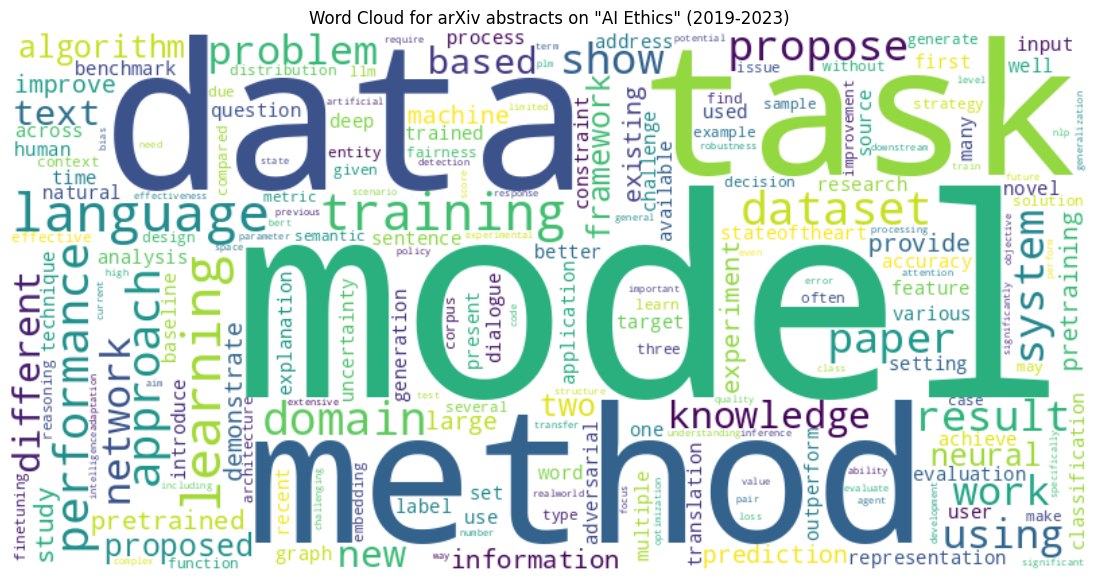

In [ ]:
from wordcloud import WordCloud

# Convert the list of words to a single string
text = ' '.join(map(str, words_without_stopwords))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, collocations=False).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 7))
plt.title('Word Cloud for arXiv abstracts on "AI Ethics" (2019-2023)')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

After stopwords

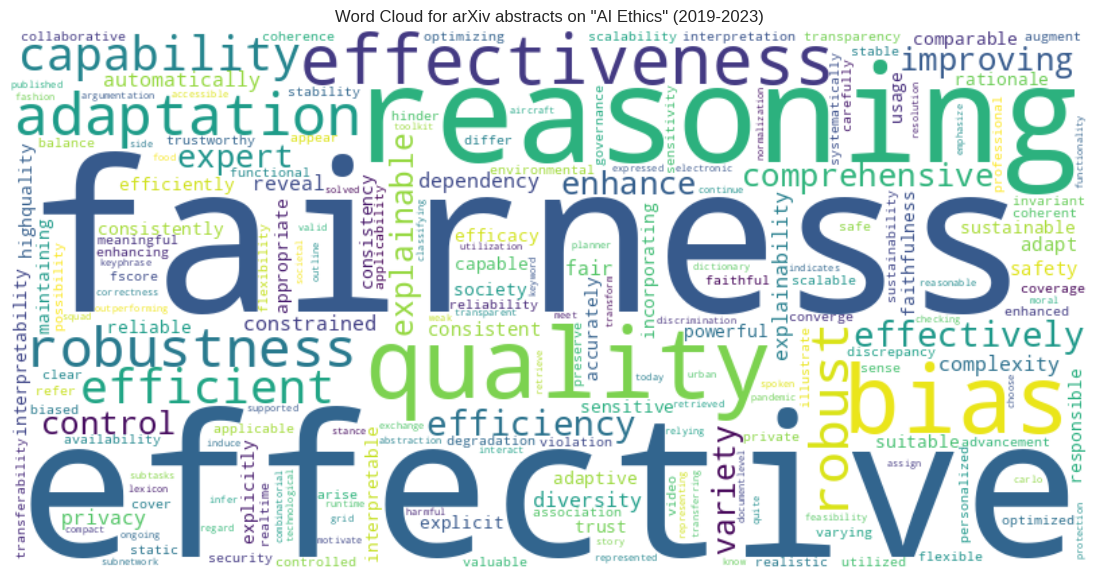

In [ ]:
from wordcloud import WordCloud

# Convert the list of words to a single string
text = ' '.join(map(str, words_without_stopwords))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, collocations=False).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 7))
plt.title('Word Cloud for arXiv abstracts on "AI Ethics" (2019-2023)')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

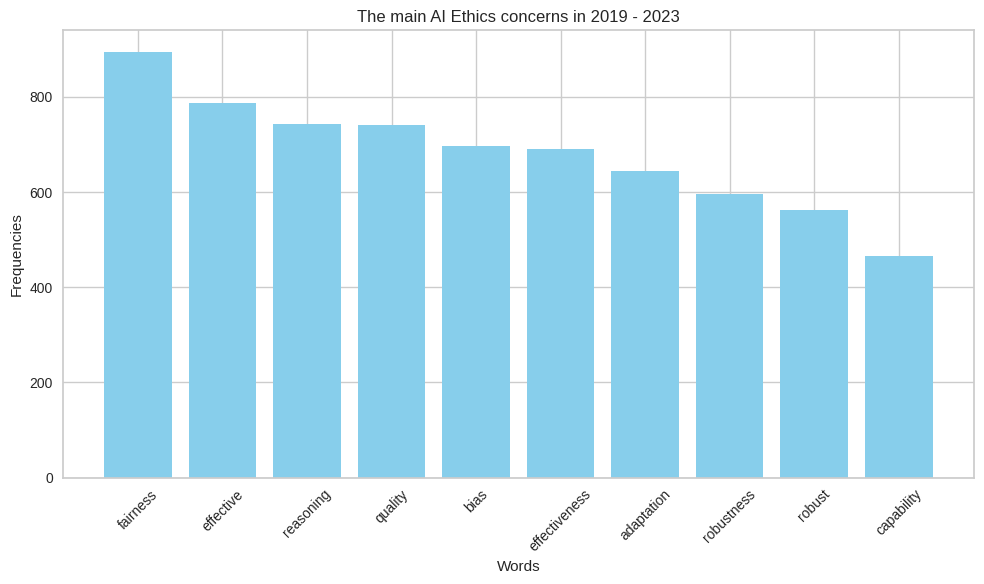

In [ ]:
import matplotlib.pyplot as plt

# Assuming sorted_word_freq is a list of tuples containing word-frequency pairs
top_10 = sorted_word_freq[:10]  # Get the top 10 most frequent word-frequency pairs

# Extract top words and frequencies
top_words = [item[0] for item in top_10]
frequencies = [item[1] for item in top_10]

# Plot bar chart for top 10 words
plt.figure(figsize=(10, 6))
plt.bar(top_words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('The main AI Ethics concerns in 2019 - 2023')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# select articles on ethics AI in 2023
ethics23 = df[df['update_date'].dt.year==2023]

# select articles on ethics AI in 2022

ethics22 = df[df['update_date'].dt.year==2022]

# select articles on ethics AI in 2021

ethics21 = df[df['update_date'].dt.year==2021]

# select articles on ethics AI in 2020

ethics20 = df[df['update_date'].dt.year==2020]

# select articles on ethics AI in 2019

ethics19 = df[df['update_date'].dt.year==2019]

# make a list of data for three years to compare
ethics_by_year = {'Number of arXiv articles in "AI Ethics" (2019)':len(ethics19), 'Number of arXiv articles in "AI Ethics" (2020)':len(ethics20), 'Number of arXiv articles in "AI Ethics" (2021)':len(ethics21), 'Number of arXiv articles in "AI Ethics" (2022)':len(ethics22), 'Number of arXiv articles in "AI Ethics" (2023)':len(ethics23)}

ethics_by_year

{'Number of arXiv articles in "AI Ethics" (2019)': 454,
 'Number of arXiv articles in "AI Ethics" (2020)': 772,
 'Number of arXiv articles in "AI Ethics" (2021)': 1343,
 'Number of arXiv articles in "AI Ethics" (2022)': 1581,
 'Number of arXiv articles in "AI Ethics" (2023)': 2339}

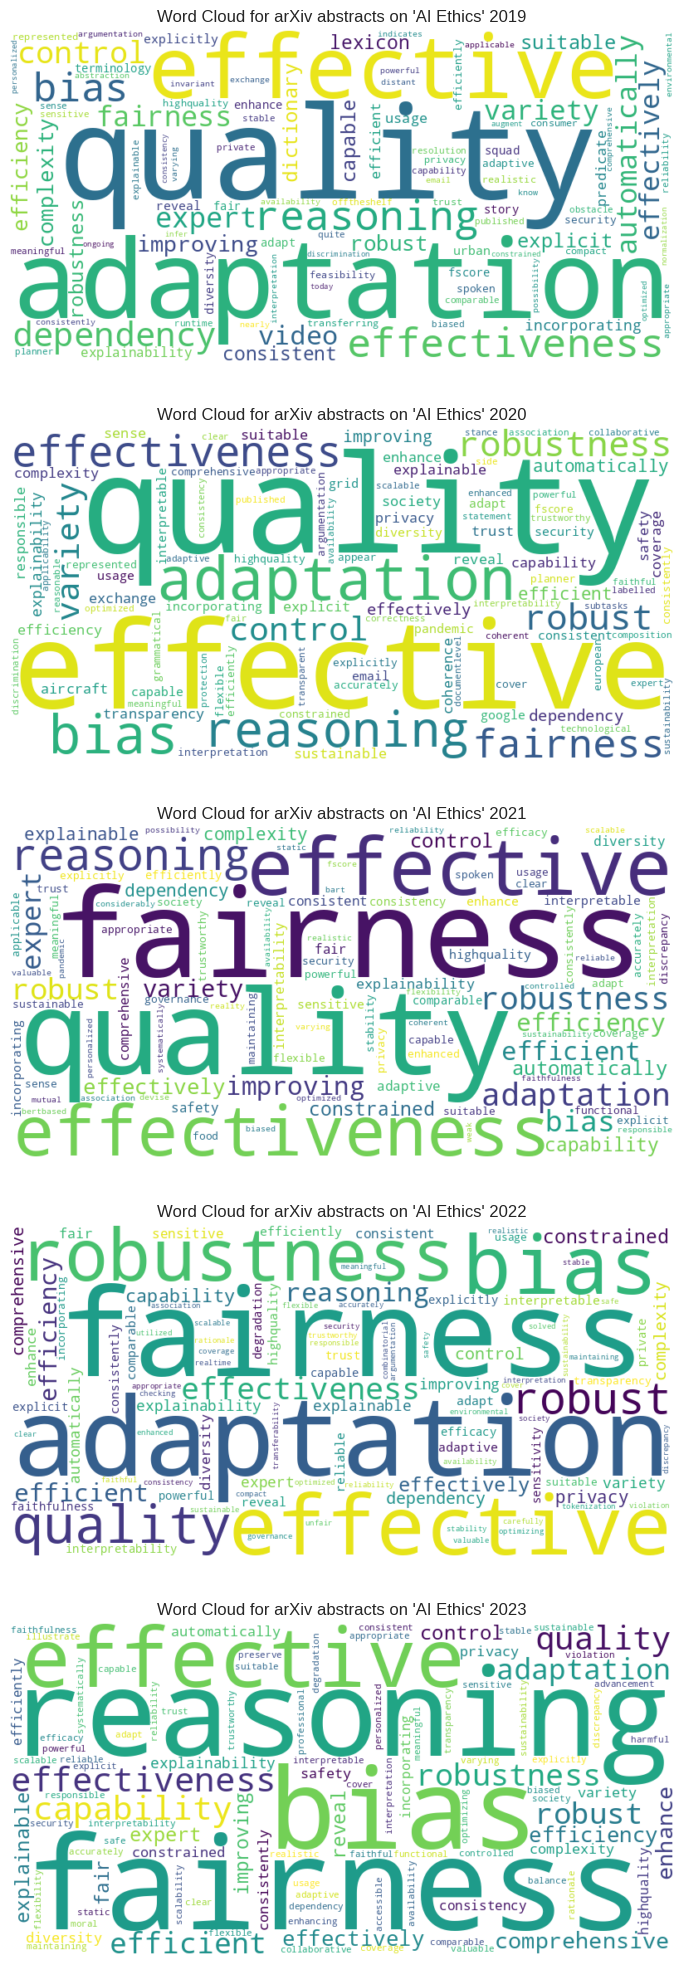

In [ ]:
from wordcloud import WordCloud
# add data in a variable text_ethics19
text_ethics19 = ' '.join(ethics19['abstract_nonstop'].tolist())

# add data in a variable text_ethics20
text_ethics20 = ' '.join(ethics20['abstract_nonstop'].tolist())

# add data in a variable text_ethics21
text_ethics21 = ' '.join(ethics21['abstract_nonstop'].tolist())

# add data in a variable text_ethics22
text_ethics22 = ' '.join(ethics22['abstract_nonstop'].tolist())

# add data in a variable text_ethics23
text_ethics23 = ' '.join(ethics23['abstract_nonstop'].tolist())

# Sample text data
texts_abs = [text_ethics19, text_ethics20, text_ethics21, text_ethics22, text_ethics23]

# Create subplots
nums_plots = len(texts_abs)
fig, axes = plt.subplots(nums_plots, 1, figsize=(30, 25))

# Generate word clouds for each text
for i in range(nums_plots):
    wordcloud_side_abs = WordCloud(width=800, height=400, background_color='white', max_words=100, stopwords=stopword, collocations=False).generate(texts_abs[i])

    # Plot word cloud on subplot
    axes[i].imshow(wordcloud_side_abs, interpolation='bilinear')
    axes[i].set_title(f"Word Cloud for arXiv abstracts on 'AI Ethics' {i+2019}")

    # Remove axis ticks and labels
    axes[i].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

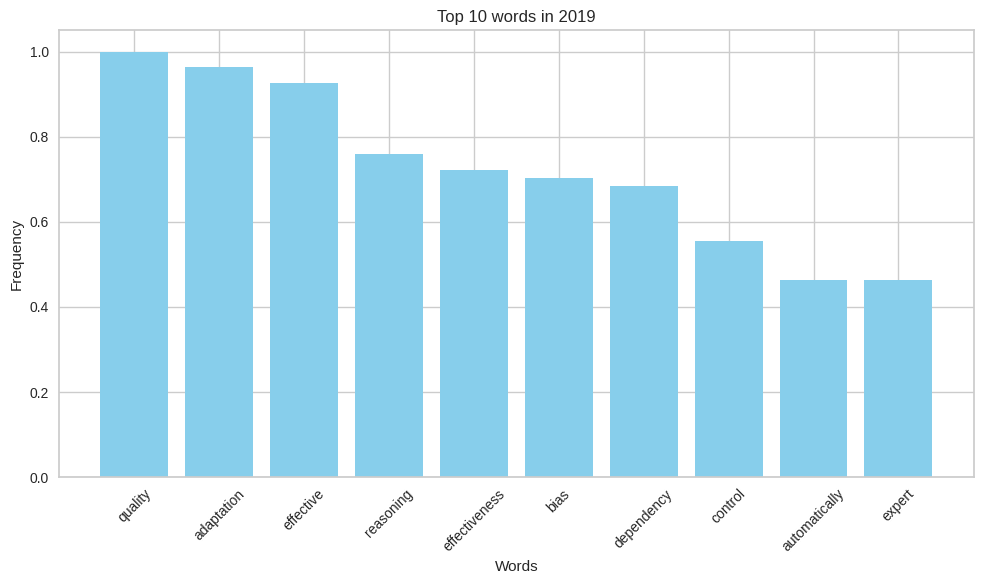

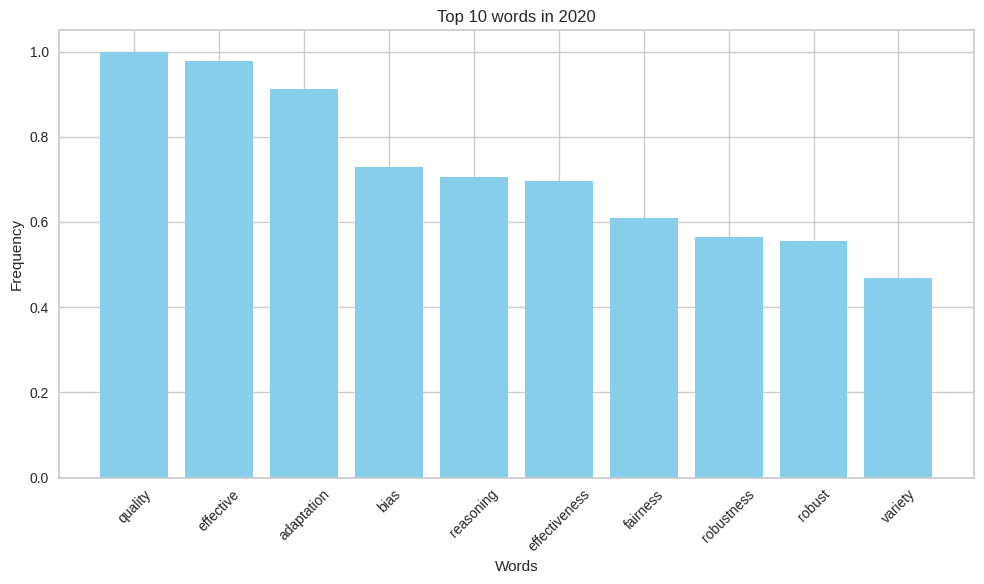

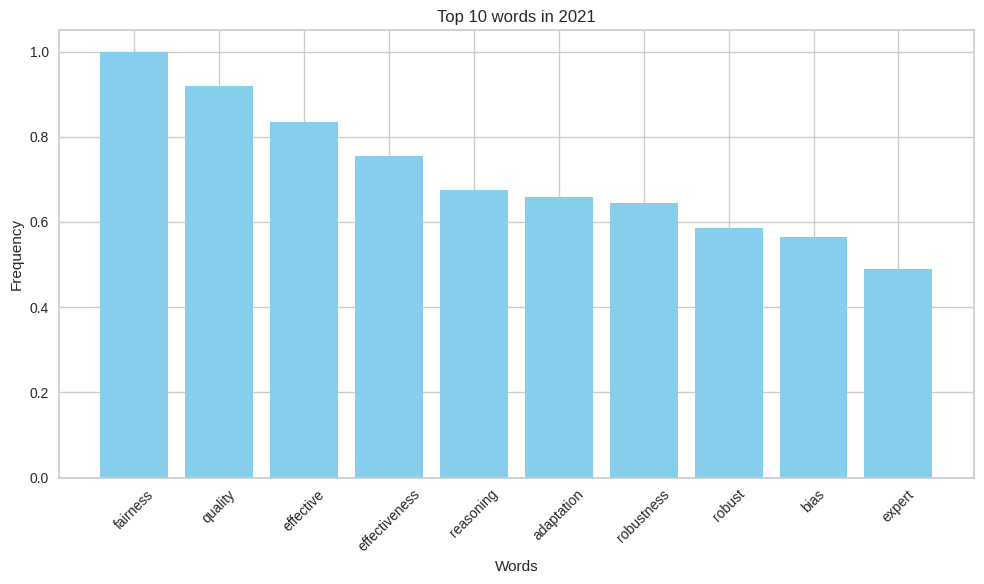

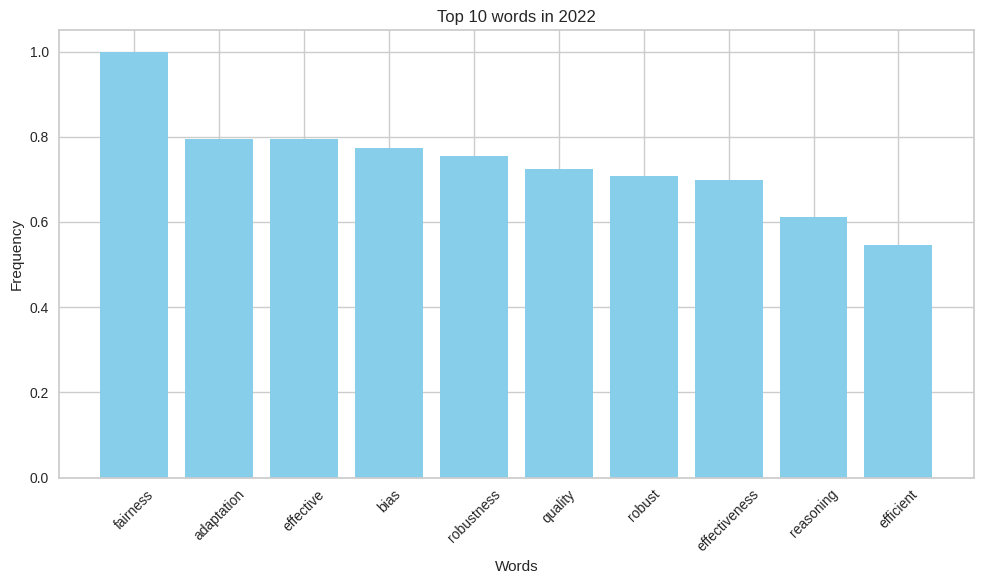

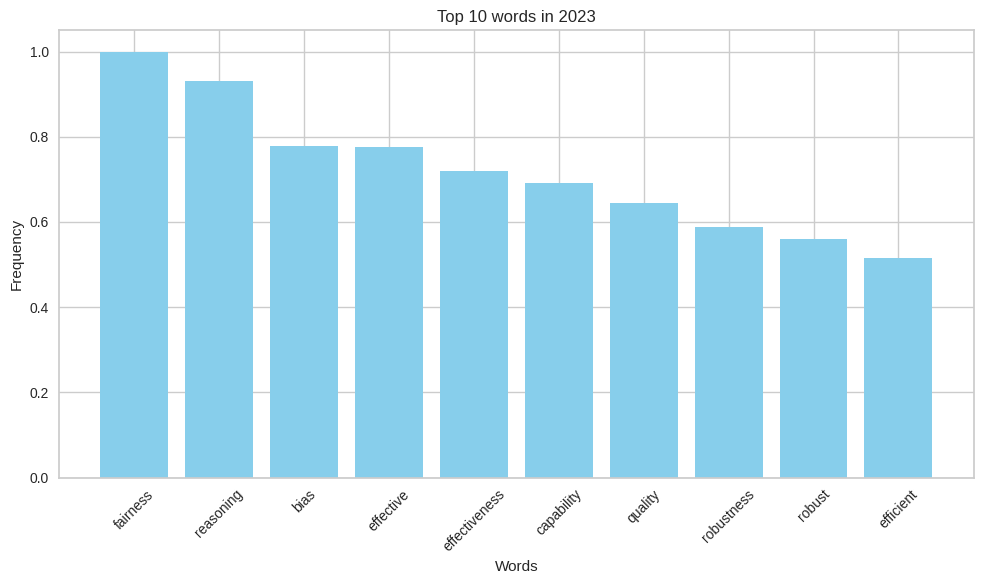

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# Assuming you have already defined 'texts_abs' and 'nums_plots'

# Generate word clouds for each text
wordclouds = []
for i in range(nums_plots):
    wordcloud_side_abs = WordCloud(width=800, height=400, background_color='white', max_words=100, collocations=False).generate(texts_abs[i])
    wordclouds.append(wordcloud_side_abs)

# Get the top 10 most frequent word-frequency pairs for each word cloud
top_10_words_freqs = []
for i, wordcloud in enumerate(wordclouds):
    # Convert word cloud to frequency dictionary
    word_freq = dict(wordcloud.words_)
    # Sort the frequency dictionary by frequency in descending order
    sorted_word_freq = Counter(word_freq).most_common()
    # Get the top 10 most frequent word-frequency pairs
    top_10_words_freqs.append(sorted_word_freq[:10])

# Organize the data by year (assuming texts_abs contain data per year)
yearly_top_10 = {}
for i, top_10 in enumerate(top_10_words_freqs):
    year = i + 19  # Assuming the starting year is 2019
    yearly_top_10[year] = top_10

# Plot bar chart for each year
for year, top_10 in yearly_top_10.items():
    words, frequencies = zip(*top_10)
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')
    plt.title(f'Top 10 words in 20{year}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#Match with AI Governance Framwork

In [ ]:
# Suppose 'word_list' is the list of words you want to search for
word_list = ["accountable", "transparent", "ai expert", "availability", "availability and quality of training data", "awareness of misuse", "caution", "competence", "data agency",
             "democratic participation", "diversity", "diversity inclusion", "effectiveness", "equity", "explainable & interpretable", "fair - with harmful bias manage", "fairness",
            "human agency and oversight", "human rights", "maintainability", "privacy", "privacy - enhanced", "privacy and data governance", "protection of privacy and intimacy",
             "respect for autonomy", "responsibility", "robustness", "safe", "safety", "secure & resiliant", "security", "societal and environmental well-being", "solidarity",
             "sustainable development", "technical robustness and safety", "transparency", "transparency and explainability", "valid & reliable", "well-being"]

# Initialize a dictionary to count occurrences of each word
word_count = {word: 0 for word in word_list}

# Iterate over each word in the list
for word in word_list:
    # Count occurrences of the word in the abstract column
    word_count[word] = df['abstract'].str.count(word).sum()

# Sort the word counts dictionary by count in descending order
sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

# Print the sorted word count
for word, count in sorted_word_count:
    print(f"{word}: {count}")

fairness: 960
effectiveness: 694
robustness: 597
safe: 432
privacy: 278
safety: 261
diversity: 257
availability: 120
transparency: 115
security: 112
transparent: 64
responsibility: 40
competence: 30
equity: 24
well-being: 22
sustainable development: 18
accountable: 16
caution: 14
solidarity: 5
transparency and explainability: 5
human rights: 4
maintainability: 3
ai expert: 0
availability and quality of training data: 0
awareness of misuse: 0
data agency: 0
democratic participation: 0
diversity inclusion: 0
explainable & interpretable: 0
fair - with harmful bias manage: 0
human agency and oversight: 0
privacy - enhanced: 0
privacy and data governance: 0
protection of privacy and intimacy: 0
respect for autonomy: 0
secure & resiliant: 0
societal and environmental well-being: 0
technical robustness and safety: 0
valid & reliable: 0


In [ ]:
# Define groups of related words
word_groups = {
    "Accountability": ["accountability", "accountable & transparent", "responsibility"],
    "AI expert" : ["ai expert"],
    "Availability" : ["availability", "availability and quality of training data"],
    "Awareness of misuse": ["awareness of misuse"],
    "Caution" : ["caution"],
    "Competence" : ["competence"],
    "Data agency": ["data agency"],
    "Democratic participation" : ["democratic participation"],
    "Diversity" : ["diversity","diversity inclusion"],
    "Effectiveness": ["effectiveness"],
    "Equity": ["equity"],
    "Explainability" : ["explainable & interpretable", "transparency and explainability"],
    "Fairness" : ["fair - with harmful bias manage", "fairness"],
    "Human agency and oversight": ["human agency and oversight"],
    "Human Rights": ["human rights"],
    "Maintainability": ["maintainability"],
    "Privacy" : ["privacy", "privacy - enhanced", "privacy and data governance", "protection of privacy and intimacy"],
    "Respect for autonomy" : ["respect for autonomy"],
    "Robustness" : ["robustness", "technical robustness and safety"],
    "Safety" : ["safe", "safety", "technical robustness and safety"],
    "Security" : ["secure & resiliant", "security"],
    "Well-being" : ["societal and environmental well-being", "well-being"],
    "Solidarity" : ["solidarity"],
    "Sustainable development" : ["sustainable development"],
    "Transparency" : ["transparency", "transparency and explainability", "accountable & transparent"],
    "Valid & Reliable" : ["valid & reliable"]
}

# Initialize a dictionary to count occurrences of each word group
word_count = {group: 0 for group in word_groups}

# Iterate over each group
for group, words in word_groups.items():
    # Count occurrences of words in the group
    group_count = sum(df['abstract'].str.count(word).sum() for word in words)
    word_count[group] = group_count

# Sort the word group counts dictionary by count in descending order
sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

# Print the sorted word group count
for group, count in sorted_word_count:
    print(f"{group}: {count}")

Fairness: 960
Effectiveness: 694
Safety: 693
Robustness: 597
Privacy: 278
Diversity: 257
Availability: 120
Transparency: 120
Security: 112
Accountability: 68
Competence: 30
Equity: 24
Well-being: 22
Sustainable development: 18
Caution: 14
Explainability: 5
Solidarity: 5
Human Rights: 4
Maintainability: 3
AI expert: 0
Awareness of misuse: 0
Data agency: 0
Democratic participation: 0
Human agency and oversight: 0
Respect for autonomy: 0
Valid & Reliable: 0


<ipython-input-52-61c3924bb7a3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="husl")


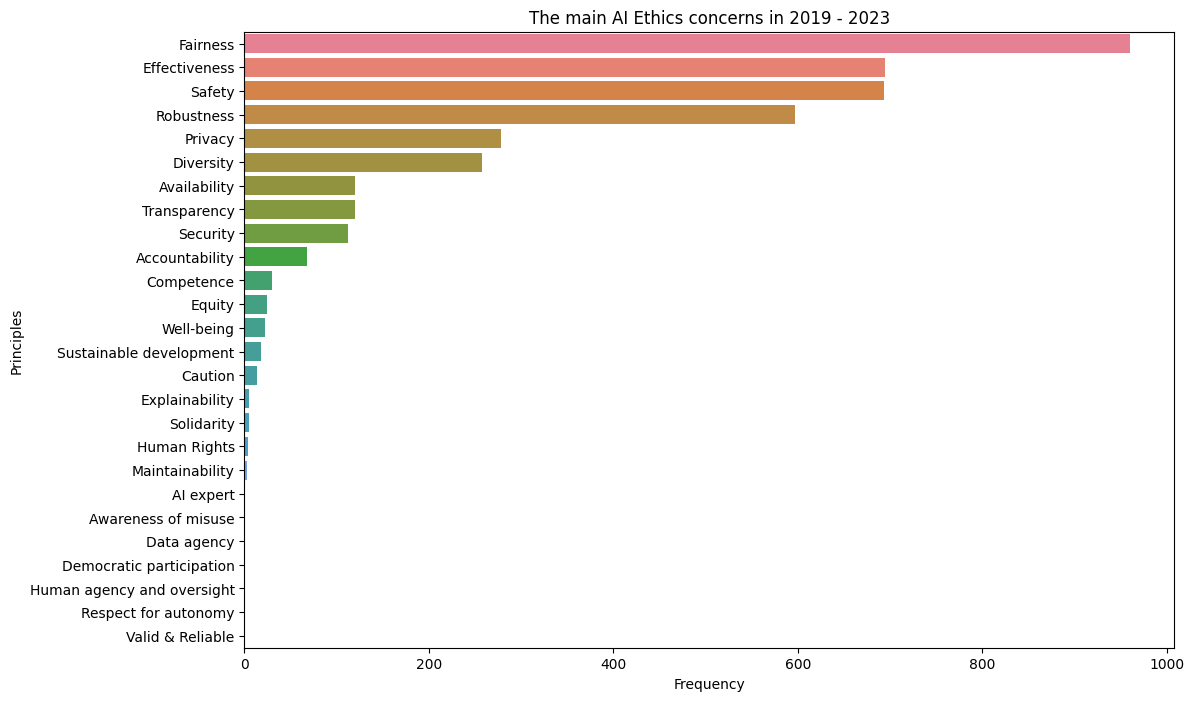

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert sorted_word_count dictionary into separate lists for words and counts
words = [word for word, count in sorted_word_count]
counts = [count for word, count in sorted_word_count]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=words, palette="husl")
plt.xlabel('Frequency')
plt.ylabel('Principles')
plt.title('The main AI Ethics concerns in 2019 - 2023')
plt.show()

<ipython-input-53-7657883be584>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="husl")


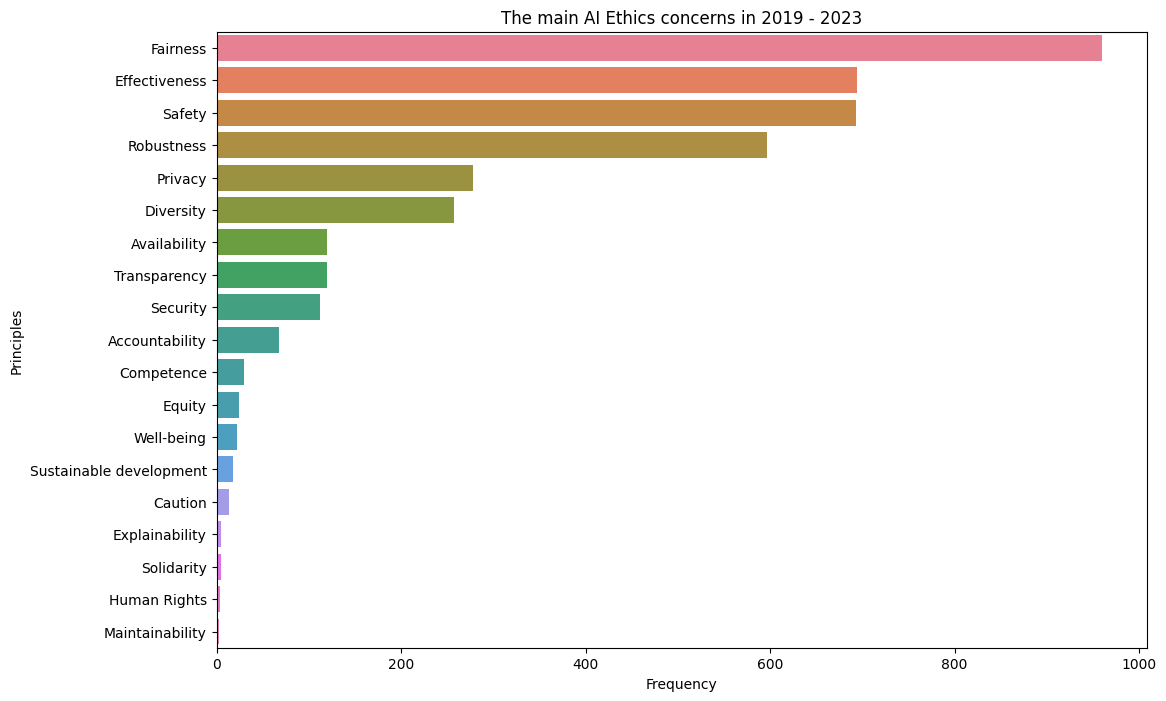

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out words with zero count
non_zero_counts = [(word, count) for word, count in sorted_word_count if count != 0]

# Convert non-zero counts dictionary into separate lists for words and counts
words = [word for word, count in non_zero_counts]
counts = [count for word, count in non_zero_counts]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=words, palette="husl")
plt.xlabel('Frequency')
plt.ylabel('Principles')
plt.title('The main AI Ethics concerns in 2019 - 2023')
plt.show()


<ipython-input-54-daa98e1c71fb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="husl")


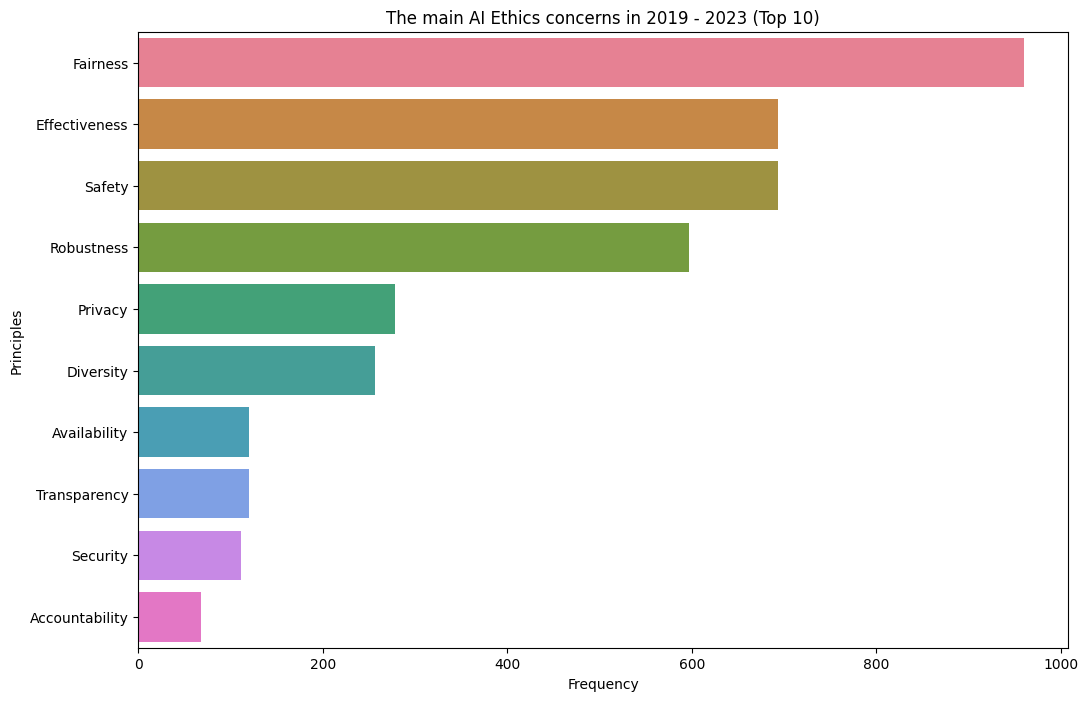

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert sorted_word_count dictionary into separate lists for words and counts
words = [word for word, count in sorted_word_count[:10]]  # Slice to include only the top 10 words
counts = [count for word, count in sorted_word_count[:10]]  # Slice to include only the top 10 counts

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=words, palette="husl")
plt.xlabel('Frequency')
plt.ylabel('Principles')
plt.title('The main AI Ethics concerns in 2019 - 2023 (Top 10)')
plt.show()

In [ ]:
# select articles on ethics AI in 2023
ethics23 = df[df['update_date'].dt.year==2023]

# select articles on ethics AI in 2022

ethics22 = df[df['update_date'].dt.year==2022]

# select articles on ethics AI in 2021

ethics21 = df[df['update_date'].dt.year==2021]

# select articles on ethics AI in 2020

ethics20 = df[df['update_date'].dt.year==2020]

# select articles on ethics AI in 2019

ethics19 = df[df['update_date'].dt.year==2019]

# make a list of data for three years to compare
ethics_by_year = {'Number of arXiv articles in "AI Ethics" (2019)':len(ethics19), 'Number of arXiv articles in "AI Ethics" (2020)':len(ethics20), 'Number of arXiv articles in "AI Ethics" (2021)':len(ethics21), 'Number of arXiv articles in "AI Ethics" (2022)':len(ethics22), 'Number of arXiv articles in "AI Ethics" (2023)':len(ethics23)}

ethics_by_year

{'Number of arXiv articles in "AI Ethics" (2019)': 454,
 'Number of arXiv articles in "AI Ethics" (2020)': 772,
 'Number of arXiv articles in "AI Ethics" (2021)': 1343,
 'Number of arXiv articles in "AI Ethics" (2022)': 1581,
 'Number of arXiv articles in "AI Ethics" (2023)': 2339}

In [ ]:
word_groups = {
    "Accountability": ["accountability", "accountable & transparent", "responsibility"],
    "AI expert" : ["ai expert"],
    "Availability" : ["availability", "availability and quality of training data"],
    "Awareness of misuse": ["awareness of misuse"],
    "Caution" : ["caution"],
    "Competence" : ["competence"],
    "Data agency": ["data agency"],
    "Democratic participation" : ["democratic participation"],
    "Diversity" : ["diversity","diversity inclusion"],
    "Effectiveness": ["effectiveness"],
    "Equity": ["equity"],
    "Explainability" : ["explainable & interpretable", "transparency and explainability"],
    "Fairness" : ["fair - with harmful bias manage", "fairness"],
    "Human agency and oversight": ["human agency and oversight"],
    "Human Rights": ["human rights"],
    "Maintainability": ["maintainability"],
    "Privacy" : ["privacy", "privacy - enhanced", "privacy and data governance", "protection of privacy and intimacy"],
    "Respect for autonomy" : ["respect for autonomy"],
    "Robustness" : ["robustness", "technical robustness and safety"],
    "Safety" : ["safe", "safety", "technical robustness and safety"],
    "Security" : ["secure & resiliant", "security"],
    "Well-being" : ["societal and environmental well-being", "well-being"],
    "Solidarity" : ["solidarity"],
    "Sustainable development" : ["sustainable development"],
    "Transparency" : ["transparency", "transparency and explainability", "accountable & transparent"],
    "Valid & Reliable" : ["valid & reliable"]
}

In [ ]:
def count_word_occurrences(df, word_groups):
    # Initialize a dictionary to count occurrences of each word
    word_count = {group: 0 for group in word_groups}

    # Iterate over each group
    for group, words in word_groups.items():
        # Count occurrences of words in the group
        group_count = sum(df['abstract'].str.count(word).sum() for word in words)
        word_count[group] = group_count

    # Sort the word group counts dictionary by count in descending order
    sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

    # Print the sorted word group count
    for group, count in sorted_word_count:
        print(f"{group}: {count}")

# Apply the function to each DataFrame
for year, df_year in {'2019': ethics19, '2020': ethics20, '2021': ethics21, '2022': ethics22, '2023': ethics23}.items():
    print(f"Word count for AI Ethics in {year}:")
    count_word_occurrences(df_year, word_groups)
    print()  # Add a newline for better readability between years


Word count for AI Ethics in 2019:
Effectiveness: 39
Fairness: 28
Robustness: 14
Diversity: 11
Safety: 9
Privacy: 8
Security: 8
Availability: 7
Transparency: 4
Accountability: 2
Competence: 2
Solidarity: 2
Equity: 1
AI expert: 0
Awareness of misuse: 0
Caution: 0
Data agency: 0
Democratic participation: 0
Explainability: 0
Human agency and oversight: 0
Human Rights: 0
Maintainability: 0
Respect for autonomy: 0
Well-being: 0
Sustainable development: 0
Valid & Reliable: 0

Word count for AI Ethics in 2020:
Effectiveness: 64
Fairness: 59
Safety: 58
Robustness: 54
Diversity: 20
Privacy: 20
Security: 20
Transparency: 20
Availability: 12
Well-being: 9
Accountability: 8
Sustainable development: 3
Competence: 2
Equity: 1
Human Rights: 1
AI expert: 0
Awareness of misuse: 0
Caution: 0
Data agency: 0
Democratic participation: 0
Explainability: 0
Human agency and oversight: 0
Maintainability: 0
Respect for autonomy: 0
Solidarity: 0
Valid & Reliable: 0

Word count for AI Ethics in 2021:
Fairness: 208

Calculating word count for AI Ethics in 2019...
Calculating word count for AI Ethics in 2020...
Calculating word count for AI Ethics in 2021...
Calculating word count for AI Ethics in 2022...
Calculating word count for AI Ethics in 2023...


<ipython-input-61-05ce6748370b>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="husl")


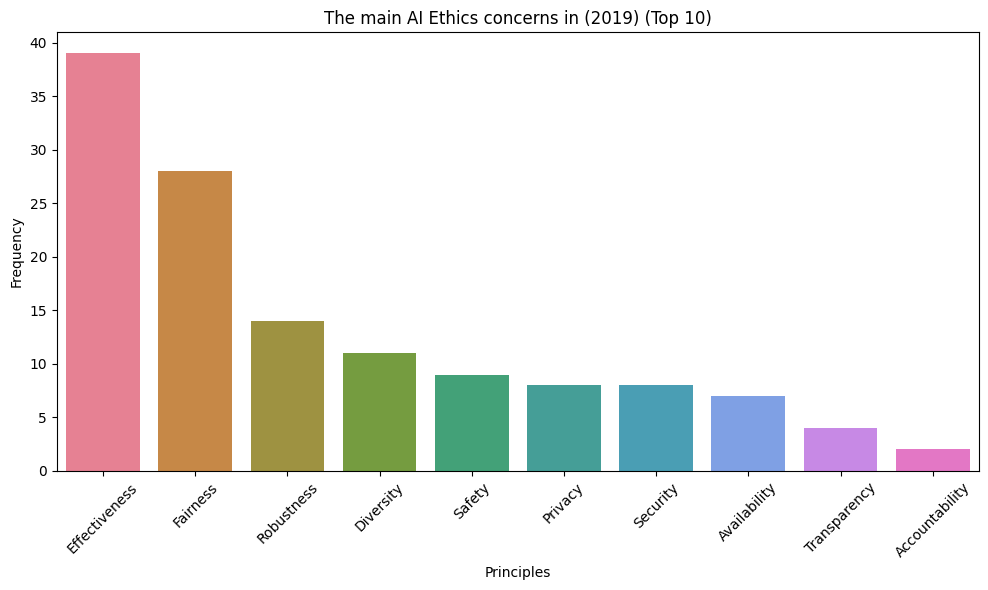

<ipython-input-61-05ce6748370b>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="husl")


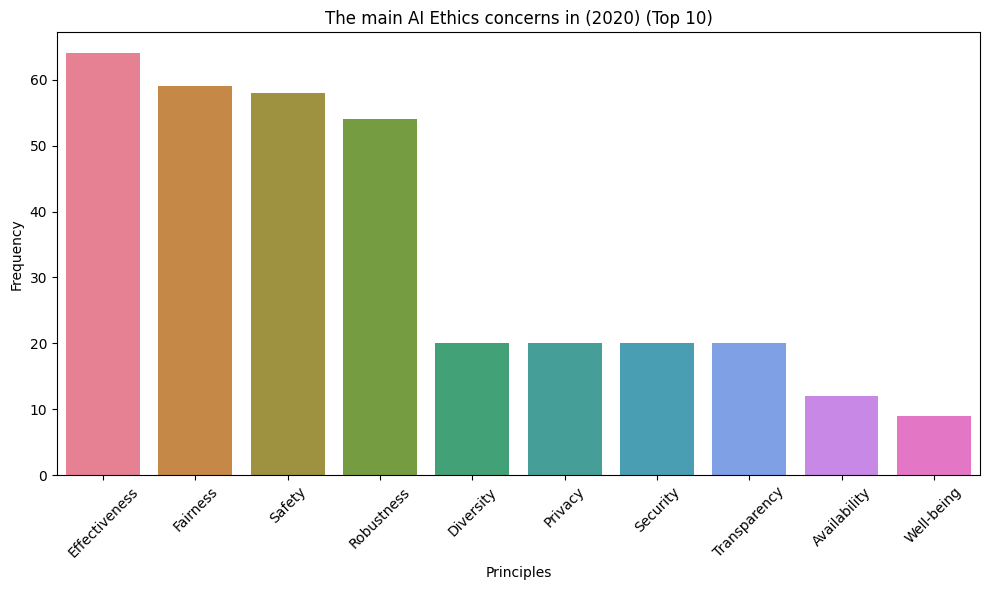

<ipython-input-61-05ce6748370b>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="husl")


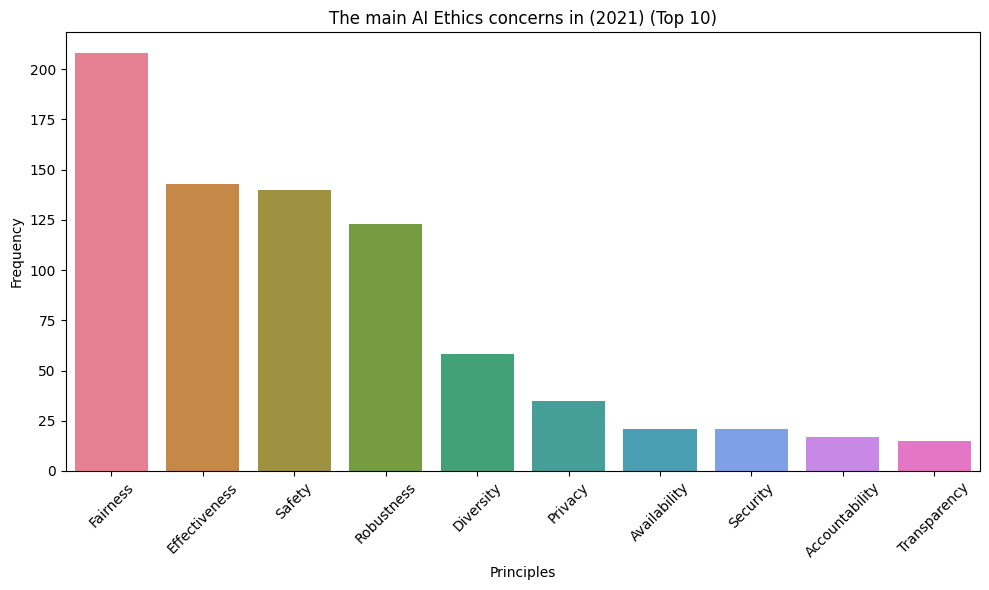

<ipython-input-61-05ce6748370b>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="husl")


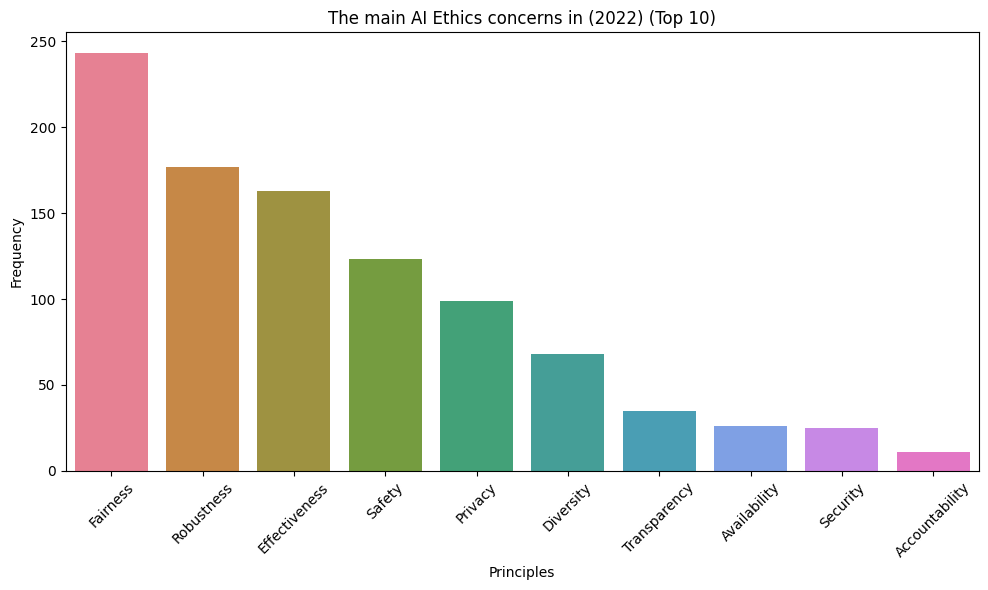

<ipython-input-61-05ce6748370b>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="husl")


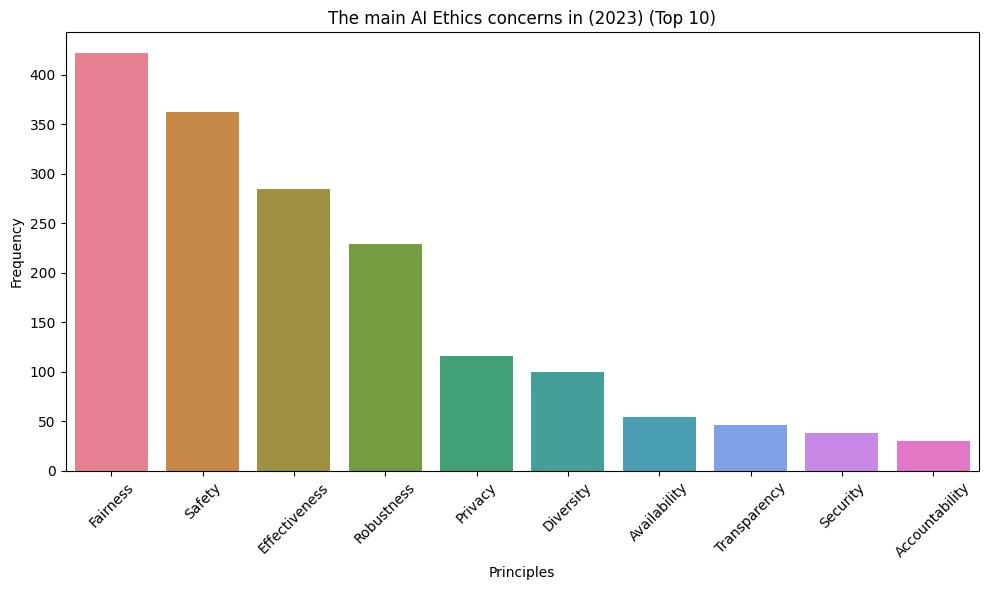

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def count_word_occurrences(df, word_groups):
    # Initialize a dictionary to count occurrences of each word
    word_count = {group: 0 for group in word_groups}

    # Iterate over each group
    for group, words in word_groups.items():
        # Count occurrences of words in the group
        group_count = sum(df['abstract'].str.count(word).sum() for word in words)
        word_count[group] = group_count

    # Sort the word group counts dictionary by count in descending order
    sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

    return sorted_word_count

# Initialize a dictionary to store word counts for each year
yearly_word_counts = {}

# Apply the function to each DataFrame
for year, df_year in {'2019': ethics19, '2020': ethics20, '2021': ethics21, '2022': ethics22, '2023': ethics23}.items():
    print(f"Calculating word count for AI Ethics in {year}...")
    word_counts = count_word_occurrences(df_year, word_groups)
    yearly_word_counts[year] = word_counts

# Plot bar chart for each year
for year, word_counts in yearly_word_counts.items():
    words, counts = zip(*word_counts[:10])  # Get the top 5 words and their counts
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(counts), palette="husl")
    plt.title(f'The main AI Ethics concerns in ({year}) (Top 10)')
    plt.xlabel('Principles')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
selected_columns = df[['update_date', 'title', 'abstract', 'abstract_nonstop_list',	'abstract_nonstop']]
selected_columns

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0      [efficient, complexity, efficiency, scalability]   
1                                    [sense, expressed]   
2               [weak, dealing, complexity, complexity]   
3                  [taxonomy, represented, terminology]   
4                                         [appropriate]   
...                                                 ...   
6484              [adaptation, effectiveness, efficacy]   
6485                 [devise, effective, sophisticated]   
6486  [combinatorial, maintaining, effectiveness, ef...   
6487  [stance, stance, incorporating, enhance, trans...   
6488                      [enhanced, drawing, efficacy]   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484                  adaptation effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

In [ ]:
#selected_columns.to_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv', header=True, index=False)

# Word2Vec

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned.head()

update_date                                              title  \
0  2022-02-07  Training linear ranking SVMs in linearithmic t...   
1  2019-07-11  Recognizability of Individual Creative Style W...   
2  2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3  2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4  2021-07-01  Learning Bayesian Networks: A Unification for ...   

                                            abstract  \
0    We introduce an efficient method for trainin...   
1    It is hypothesized that creativity arises fr...   
2    In real-life temporal scenarios, uncertainty...   
3    With the increased use of ontologies in sema...   
4    We examine Bayesian methods for learning Bay...   

                               abstract_nonstop_list  \
0  ['efficient', 'complexity', 'efficiency', 'sca...   
1                             ['sense', 'expressed']   
2    ['weak', 'dealing', 'complexity', 'complexity']   
3         ['taxonomy', 'represented', 'terminology']   
4                                    ['appropriate']   

                              abstract_nonstop  
0  efficient complexity efficiency scalability  
1                              sense expressed  
2           weak dealing complexity complexity  
3             taxonomy represented terminology  
4                                  appropriate

In [ ]:
from gensim.models import Word2Vec

# Check for missing values and replace them with an empty string or some appropriate value
df_cleaned['abstract_nonstop'] = df_cleaned['abstract_nonstop'].fillna('')

# Tokenization (assuming text is already preprocessed and tokenized)
tokenized_abstracts = df_cleaned['abstract_nonstop'].apply(lambda x: x.split() if isinstance(x, str) else [])

# Embedding
word2vec_model = Word2Vec(sentences=tokenized_abstracts, vector_size=300, window=5, min_count=1, workers=4)

In [ ]:
# Function to calculate average word vector for each abstract
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.
    for word in words:
        if word in vocabulary:
            nwords = nwords + 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

# Calculate average word vectors for each abstract
word_vectors_array = np.array([average_word_vectors(words, word2vec_model, word2vec_model.wv.index_to_key, word2vec_model.vector_size) for words in tokenized_abstracts])

## K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

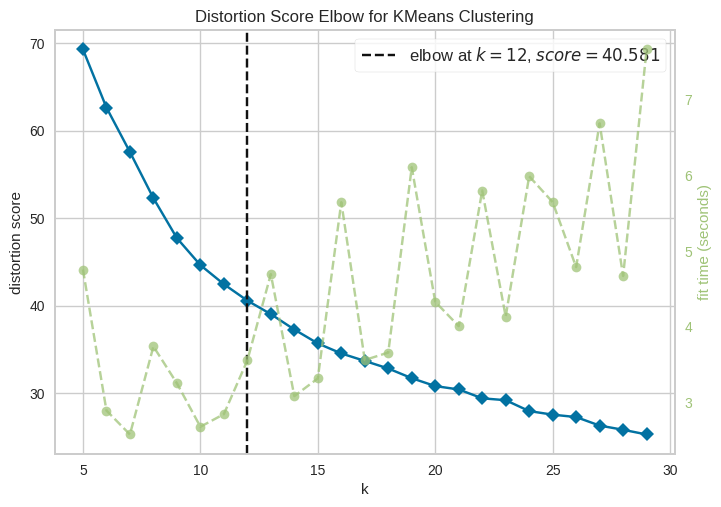

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=29, random_state=1), k=(5, 30))

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=1,  init='k-means++', max_iter=300), metric='distortion',  X = word_vectors_array, k=(5,30))

In [ ]:
from sklearn.cluster import KMeans
# Perform KMeans clustering
NUM_CLUSTERS =  12
kmeans = KMeans(n_clusters=NUM_CLUSTERS, init='k-means++', max_iter=300, random_state=1)
kmeans.fit(word_vectors_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=12, random_state=1)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(word_vectors_array, kmeans.labels_)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.19265667628471714


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(word_vectors_array, kmeans.labels_)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 1.109235879571306


In [ ]:
df_cleaned['cluster'] = kmeans.labels_
df_cleaned.sort_values(by='cluster')

update_date                                              title  \
3094  2022-07-18  Fine-Grained Population Mobility Data-Based Co...   
1833  2021-04-16  Syntactic Perturbations Reveal Representationa...   
1828  2021-05-06  Skilled and Mobile: Survey Evidence of AI Rese...   
2499  2021-09-16  Transformer-based Lexically Constrained Headli...   
496   2020-01-27  The other side of the Coin: Risks of the Libra...   
...          ...                                                ...   
617   2020-01-30  A New Arc-Routing Algorithm Applied to Winter ...   
2377  2021-08-30  Reinforcement Learning based Condition-oriente...   
5584  2023-07-28  Predictive Maintenance of Armoured Vehicles us...   
5832  2023-09-26  An Interpretable Systematic Review of Machine ...   
5354  2023-06-09                 Explainable Predictive Maintenance   

                                               abstract  \
3094    Predicting the number of infections in the a...   
1833    While vector-based language representations ...   
1828    Countries, companies, and universities are i...   
2499    This paper explores a variant of automatic h...   
496     Libra was presented as a cryptocurrency on J...   
...                                                 ...   
617     This paper studies large scale instances of ...   
2377    Maintenance scheduling is a complex decision...   
5584    Armoured vehicles are specialized and comple...   
5832    This paper presents an interpretable review ...   
5354    Explainable Artificial Intelligence (XAI) fi...   

                                  abstract_nonstop_list  \
3094  ['resolution', 'mobility', 'mobility', 'depend...   
1833  ['clear', 'sensitivity', 'varying', 'sensitive...   
1828  ['international', 'professional', 'personal', ...   
2499  ['headline', 'headline', 'headline', 'headline...   
496   ['clear', 'expressed', 'national', 'governance...   
...                                                 ...   
617                      ['maintenance', 'maintenance']   
2377  ['maintenance', 'maintenance', 'maintenance', ...   
5584  ['maintenance', 'maintenance', 'accurately', '...   
5832  ['interpretable', 'maintenance', 'aircraft', '...   
5354  ['explainable', 'sophisticated', 'expert', 'tr...   

                                       abstract_nonstop  cluster  
3094            resolution mobility mobility dependency        0  
1833  clear sensitivity varying sensitive sensitivit...        0  
1828     international professional personal governance        0  
2499  headline headline headline headline highqualit...        0  
496   clear expressed national governance associatio...        0  
...                                                 ...      ...  
617                             maintenance maintenance       11  
2377  maintenance maintenance maintenance adapt main...       11  
5584  maintenance maintenance accurately stability e...       11  
5832  interpretable maintenance aircraft utilized ai...       11  
5354  explainable sophisticated expert trust mainten...       11  

[6489 rows x 6 columns]

In [ ]:
from collections import Counter

Counter(kmeans.labels_)

Counter({8: 1808,
         0: 515,
         9: 2435,
         7: 268,
         1: 222,
         3: 604,
         10: 100,
         6: 272,
         4: 125,
         2: 49,
         11: 28,
         5: 63})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(kmeans.labels_):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-116-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-116-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-116-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-116-029a2783a871>:14: FutureWarning: The frame.append method is dep

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
governance
--------------------------------------------------------------------------------
Cluster #1:
not related
--------------------------------------------------------------------------------
Cluster #2:
fairness
--------------------------------------------------------------------------------
Cluster #3:
adaptation
--------------------------------------------------------------------------------
Cluster #4:
bias
--------------------------------------------------------------------------------
Cluster #5:
sustainable
--------------------------------------------------------------------------------
Cluster #6:
bias
--------------------------------------------------------------------------------
Cluster #7:
reasoning
--------------------------------------------------------------------------------
Cluster #8:
control
--------------------------------------------------------------------------------
Cluster #9:
quality
------------------------------------------------------------

In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['governance']), (1, ['not related']), (2, ['fairness']), (3, ['adaptation']), (4, ['bias']), (5, ['sustainable']), (6, ['bias']), (7, ['reasoning']), (8, ['control']), (9, ['quality']), (10, ['fairness']), (11, ['maintenance'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['sense', 'expressed'] ['taxonomy', 'represent...      [governance]
1       1  [] [] [] [] [] [] [] [] [] [] [] [] [] [] [] [...     [not related]
2       2  ['fairness', 'fairness', 'fairness', 'fairness...        [fairness]
3       3  ['transferable', 'adaptation', 'adaptation', '...      [adaptation]
4       4  ['fairness', 'relying', 'fairness', 'devise', ...            [bias]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
3094  2022-07-18  Fine-Grained Population Mobility Data-Based Co...   
1833  2021-04-16  Syntactic Perturbations Reveal Representationa...   
1828  2021-05-06  Skilled and Mobile: Survey Evidence of AI Rese...   
2499  2021-09-16  Transformer-based Lexically Constrained Headli...   
496   2020-01-27  The other side of the Coin: Risks of the Libra...   

                                               abstract  cluster  
3094    Predicting the number of infections in the a...        0  
1833    While vector-based language representations ...        0  
1828    Countries, companies, and universities are i...        0  
2499    This paper explores a variant of automatic h...        0  
496     Libra was presented as a cryptocurrency on J...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_km_w2v = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_km_w2v.head()

update_date                                              title  \
0  2022-07-18  Fine-Grained Population Mobility Data-Based Co...   
1  2021-04-16  Syntactic Perturbations Reveal Representationa...   
2  2021-05-06  Skilled and Mobile: Survey Evidence of AI Rese...   
3  2021-09-16  Transformer-based Lexically Constrained Headli...   
4  2020-01-27  The other side of the Coin: Risks of the Libra...   

                                            abstract cluster abstracts_related  
0    Predicting the number of infections in the a...       0      [governance]  
1    While vector-based language representations ...       0      [governance]  
2    Countries, companies, and universities are i...       0      [governance]  
3    This paper explores a variant of automatic h...       0      [governance]  
4    Libra was presented as a cryptocurrency on J...       0      [governance]

In [ ]:
# Save the DataFrame to a CSV file
#result_km_w2v.to_csv('drive/MyDrive/Colab Notebooks/results/result_kmeans_word2vec.csv', index=False)

## Hierarchical Agglomerative Clustering

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484  ['adaptation', 'ability', 'effectiveness', 'ef...   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484          adaptation ability effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

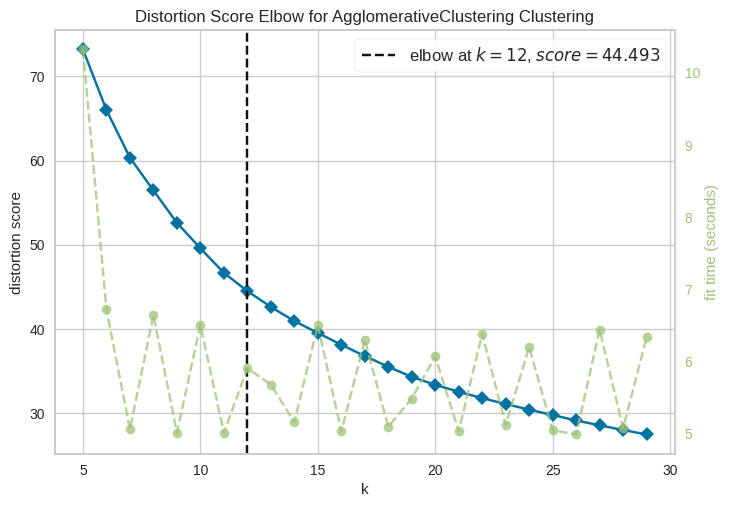

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=29), k=(5, 30))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(AgglomerativeClustering(linkage='ward'), metric='distortion',  X = word_vectors_array, k=(5,30))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

NUM_CLUSTERS = 12

agg_clustering = AgglomerativeClustering(n_clusters=NUM_CLUSTERS, linkage='ward')
cluster_labels = agg_clustering.fit_predict(word_vectors_array)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(word_vectors_array, cluster_labels)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.1736555234967174


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(word_vectors_array, cluster_labels)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 1.206029211692954


In [ ]:
df_cleaned['cluster'] = cluster_labels
df_cleaned.sort_values(by='cluster').head()

update_date                                              title  \
3195  2022-08-30  QSDsan: An Integrated Platform for Quantitativ...   
3662  2022-06-20                      The ITU Faroese Pairs Dataset   
470   2020-01-01  Improved Word Sense Disambiguation Using Pre-T...   
3666  2022-06-22   Argumentative Text Generation in Economic Domain   
1104  2020-10-08  Galileo at SemEval-2020 Task 12: Multi-lingual...   

                                               abstract  \
3195    Sustainable sanitation and resource recovery...   
3662    This article documents a dataset of sentence...   
470     Contextualized word representations are able...   
3666    The development of large and super-large lan...   
1104    This paper describes Galileo's performance i...   

                                  abstract_nonstop_list  \
3195  ['sustainable', 'environmental', 'sustainable'...   
3662                                          ['cover']   
470                 ['effective', 'sense', 'published']   
3666  ['meeting', 'argumentation', 'annotate', 'argu...   
1104      ['subtasks', 'subtask', 'subtask', 'subtask']   

                                       abstract_nonstop  cluster  
3195  sustainable environmental sustainable illustra...        0  
3662                                              cover        0  
470                           effective sense published        0  
3666       meeting argumentation annotate argumentation        0  
1104                   subtasks subtask subtask subtask        0

In [ ]:
from collections import Counter

Counter(cluster_labels)

Counter({9: 1465,
         0: 504,
         10: 2423,
         11: 123,
         6: 451,
         7: 222,
         2: 491,
         1: 74,
         4: 120,
         5: 418,
         3: 168,
         8: 30})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(cluster_labels):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-130-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-130-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-130-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-130-dab1332a148f>:14: FutureWarning: The frame.append method is dep

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
sustainable
--------------------------------------------------------------------------------
Cluster #1:
maintenance
--------------------------------------------------------------------------------
Cluster #2:
adaptation
--------------------------------------------------------------------------------
Cluster #3:
bias
--------------------------------------------------------------------------------
Cluster #4:
fairness
--------------------------------------------------------------------------------
Cluster #5:
bias
--------------------------------------------------------------------------------
Cluster #6:
reasoning
--------------------------------------------------------------------------------
Cluster #7:
not related
--------------------------------------------------------------------------------
Cluster #8:
fairness
--------------------------------------------------------------------------------
Cluster #9:
control
----------------------------------------------------------

In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['sustainable']), (1, ['maintenance']), (2, ['adaptation']), (3, ['bias']), (4, ['fairness']), (5, ['bias']), (6, ['reasoning']), (7, ['not related']), (8, ['fairness']), (9, ['control']), (10, ['quality']), (11, ['reasoning'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['sense', 'expressed'] ['taxonomy', 'represent...     [sustainable]
1       1  ['aircraft', 'arise', 'aircraft', 'efficiency'...     [maintenance]
2       2  ['transferable', 'adaptation', 'adaptation', '...      [adaptation]
3       3  ['fairness', 'relying', 'fairness', 'devise', ...            [bias]
4       4  ['fair', 'fairness', 'discrimination', 'discri...        [fairness]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
3195  2022-08-30  QSDsan: An Integrated Platform for Quantitativ...   
3662  2022-06-20                      The ITU Faroese Pairs Dataset   
470   2020-01-01  Improved Word Sense Disambiguation Using Pre-T...   
3666  2022-06-22   Argumentative Text Generation in Economic Domain   
1104  2020-10-08  Galileo at SemEval-2020 Task 12: Multi-lingual...   

                                               abstract  cluster  
3195    Sustainable sanitation and resource recovery...        0  
3662    This article documents a dataset of sentence...        0  
470     Contextualized word representations are able...        0  
3666    The development of large and super-large lan...        0  
1104    This paper describes Galileo's performance i...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_agg_w2v = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_agg_w2v.head()

update_date                                              title  \
0  2022-08-30  QSDsan: An Integrated Platform for Quantitativ...   
1  2022-06-20                      The ITU Faroese Pairs Dataset   
2  2020-01-01  Improved Word Sense Disambiguation Using Pre-T...   
3  2022-06-22   Argumentative Text Generation in Economic Domain   
4  2020-10-08  Galileo at SemEval-2020 Task 12: Multi-lingual...   

                                            abstract cluster abstracts_related  
0    Sustainable sanitation and resource recovery...       0     [sustainable]  
1    This article documents a dataset of sentence...       0     [sustainable]  
2    Contextualized word representations are able...       0     [sustainable]  
3    The development of large and super-large lan...       0     [sustainable]  
4    This paper describes Galileo's performance i...       0     [sustainable]

In [ ]:
# Save the DataFrame to a CSV file
#result_agg_w2v.to_csv('drive/MyDrive/Colab Notebooks/results/result_agglomerative_word2vec.csv', index=False)

## K-Medoids Clustering

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484  ['adaptation', 'ability', 'effectiveness', 'ef...   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484          adaptation ability effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

In [ ]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.5 MB/s eta 0:00:00


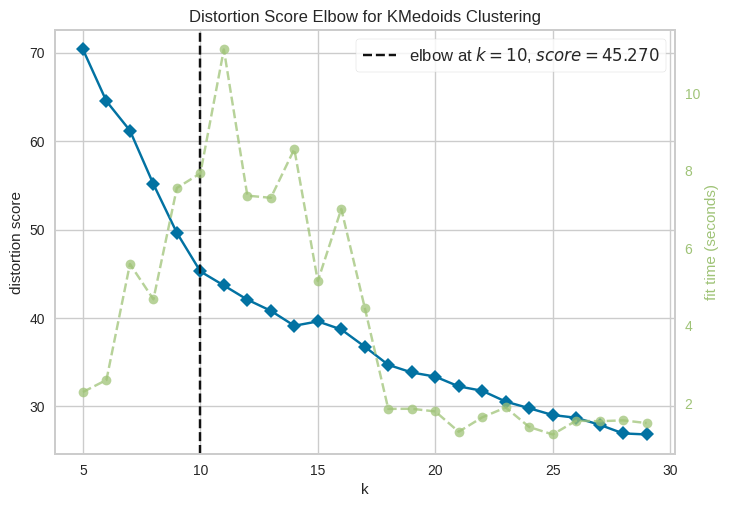

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMedoids(init='k-medoids++', n_clusters=29,
                                    random_state=1),
                 k=(5, 30))

In [ ]:
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(KMedoids(random_state=1, init = 'k-medoids++', max_iter=300), metric='distortion',  X = word_vectors_array, k=(5,30))

In [ ]:
from sklearn_extra.cluster import KMedoids

NUM_CLUSTERS = 10
kmedoids = KMedoids(n_clusters=NUM_CLUSTERS, random_state=1, max_iter=300, init = 'k-medoids++')
kmedoids.fit(word_vectors_array)

KMedoids(init='k-medoids++', n_clusters=10, random_state=1)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(word_vectors_array, kmedoids.labels_)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.20179883703826376


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(word_vectors_array, kmedoids.labels_)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 1.0354167447079645


In [ ]:
df_cleaned['cluster'] = kmedoids.labels_
df_cleaned.sort_values(by='cluster')

update_date                                              title  \
3064  2022-02-08  AI-based artistic representation of emotions f...   
6249  2023-11-16  Social Bias Probing: Fairness Benchmarking for...   
2251  2023-04-27  FairBalance: How to Achieve Equalized Odds Wit...   
1223  2020-10-26  Improving Robustness by Augmenting Training Se...   
3821  2022-08-08  ACE: Adaptive Constraint-aware Early Stopping ...   
...          ...                                                ...   
553   2019-11-20  A Model-View-ViewModel (MVVM) Application Fram...   
1625  2021-02-15  Interpretable Predictive Maintenance for Hard ...   
617   2020-01-30  A New Arc-Routing Algorithm Applied to Winter ...   
3166  2022-03-04  Monitoring Diversity of AI Conferences: Lesson...   
1102  2020-10-08  Deep learning models for predictive maintenanc...   

                                               abstract  \
3064    While Artificial Intelligence (AI) technolog...   
6249    Large language models have been shown to enc...   
2251    This research seeks to benefit the software ...   
1223    Existing NLP datasets contain various biases...   
3821    Deploying machine learning models requires h...   
...                                                 ...   
553     Around 466 million people worldwide (over 5%...   
1625    Existing machine learning approaches for dat...   
617     This paper studies large scale instances of ...   
3166    DivinAI is an open and collaborative initiat...   
1102    Given the growing amount of industrial data ...   

                                  abstract_nonstop_list  \
3064  ['interact', 'express', 'complexity', 'fairness']   
6249  ['variety', 'bias', 'bias', 'bias', 'associati...   
2251  ['society', 'effective', 'fairness', 'fairness...   
1223  ['bias', 'bias', 'robustness', 'robustness', '...   
3821  ['quality', 'adaptive', 'fairness', 'robustness']   
...                                                 ...   
553   ['flexibility', 'maintenance', 'functionality'...   
1625  ['maintenance', 'understood', 'ability', 'inte...   
617                      ['maintenance', 'maintenance']   
3166  ['collaborative', 'european', 'diversity', 'ba...   
1102  ['maintenance', 'maintenance', 'suitable', 'ma...   

                                       abstract_nonstop  cluster  
3064               interact express complexity fairness        0  
6249  variety bias bias bias association constrained...        0  
2251  society effective fairness fairness attracted ...        0  
1223  bias bias robustness robustness bias biased bi...        0  
3821               quality adaptive fairness robustness        0  
...                                                 ...      ...  
553    flexibility maintenance functionality accurately        9  
1625  maintenance understood ability interpretable m...        9  
617                             maintenance maintenance        9  
3166  collaborative european diversity balance maint...        9  
1102  maintenance maintenance suitable maintenance meet        9  

[6489 rows x 6 columns]

In [ ]:
from collections import Counter

Counter(kmedoids.labels_)

Counter({1: 2636,
         7: 985,
         5: 1756,
         4: 292,
         2: 222,
         9: 52,
         6: 87,
         8: 271,
         0: 123,
         3: 65})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(kmedoids.labels_):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-145-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-145-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-145-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-145-fa8c0dc2d201>:14: FutureWarning: The frame.append method is dep

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
bias
--------------------------------------------------------------------------------
Cluster #1:
effective
--------------------------------------------------------------------------------
Cluster #2:
not related
--------------------------------------------------------------------------------
Cluster #3:
fairness
--------------------------------------------------------------------------------
Cluster #4:
reasoning
--------------------------------------------------------------------------------
Cluster #5:
adaptation
--------------------------------------------------------------------------------
Cluster #6:
fairness
--------------------------------------------------------------------------------
Cluster #7:
sustainable
--------------------------------------------------------------------------------
Cluster #8:
bias
--------------------------------------------------------------------------------
Cluster #9:
maintenance
--------------------------------------------------------

In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['bias']), (1, ['effective']), (2, ['not related']), (3, ['fairness']), (4, ['reasoning']), (5, ['adaptation']), (6, ['fairness']), (7, ['sustainable']), (8, ['bias']), (9, ['maintenance'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['fairness', 'relying', 'fairness', 'devise', ...            [bias]
1       1  ['efficient', 'complexity', 'efficiency', 'sca...       [effective]
2       2  [] [] [] [] [] [] [] [] [] [] [] [] [] [] [] [...     [not related]
3       3  ['sensitive', 'fair', 'fairness'] ['fairness',...        [fairness]
4       4  ['realistic', 'reasoning'] ['reasoning', 'reas...       [reasoning]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
3064  2022-02-08  AI-based artistic representation of emotions f...   
6249  2023-11-16  Social Bias Probing: Fairness Benchmarking for...   
2251  2023-04-27  FairBalance: How to Achieve Equalized Odds Wit...   
1223  2020-10-26  Improving Robustness by Augmenting Training Se...   
3821  2022-08-08  ACE: Adaptive Constraint-aware Early Stopping ...   

                                               abstract  cluster  
3064    While Artificial Intelligence (AI) technolog...        0  
6249    Large language models have been shown to enc...        0  
2251    This research seeks to benefit the software ...        0  
1223    Existing NLP datasets contain various biases...        0  
3821    Deploying machine learning models requires h...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_kmd_w2v = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_kmd_w2v.head()

update_date                                              title  \
0  2022-02-08  AI-based artistic representation of emotions f...   
1  2023-11-16  Social Bias Probing: Fairness Benchmarking for...   
2  2023-04-27  FairBalance: How to Achieve Equalized Odds Wit...   
3  2020-10-26  Improving Robustness by Augmenting Training Se...   
4  2022-08-08  ACE: Adaptive Constraint-aware Early Stopping ...   

                                            abstract cluster abstracts_related  
0    While Artificial Intelligence (AI) technolog...       0            [bias]  
1    Large language models have been shown to enc...       0            [bias]  
2    This research seeks to benefit the software ...       0            [bias]  
3    Existing NLP datasets contain various biases...       0            [bias]  
4    Deploying machine learning models requires h...       0            [bias]

In [ ]:
# Save the DataFrame to a CSV file
#result_kmd_w2v.to_csv('drive/MyDrive/Colab Notebooks/results/result_kmedoids_word2vec.csv', index=False)

# Voyage AI (voyage-lite-02-instruct)

In [ ]:
!pip install -U voyageai

In [ ]:
import voyageai

# This will automatically use the environment variable VOYAGE_API_KEY.
vo = voyageai.Client(api_key="pa-25k4jG_LuNkDiCJ4J-w6x4g0fqshNR9rQrBK2IUGrVA")

texts = df_cleaned['abstract_nonstop']
texts.head()

0    efficient complexity efficiency scalability
1                                sense expressed
2             weak dealing complexity complexity
3               taxonomy represented terminology
4                                    appropriate
Name: abstract_nonstop, dtype: object

In [ ]:
# Convert the content to a list of strings
texts = [str(doc) for doc in df_cleaned['abstract_nonstop']]

# Define batch size
batch_size = 32

# Split texts into batches
text_batches = [texts[i:i+batch_size] for i in range(0, len(texts), batch_size)]

# Initialize a list to store embeddings
all_embeddings = []

# Embed the documents batch by batch
for batch in text_batches:
    # Embed the documents in the current batch
    result = vo.embed(batch, model="voyage-lite-02-instruct", input_type="document")
    # Append the embeddings to the list of all embeddings
    all_embeddings.extend(result.embeddings)

print(all_embeddings)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Convert the embeddings to a pandas DataFrame
#embedded = pd.DataFrame(all_embeddings)

# Save the DataFrame to a CSV file
#embedded.to_csv('drive/MyDrive/Colab Notebooks/voyage_embeddings.csv', index=False)

## K-Means Clustering

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484  ['adaptation', 'ability', 'effectiveness', 'ef...   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484          adaptation ability effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

In [ ]:
voyage_embeddings = pd.read_csv('drive/MyDrive/Colab Notebooks/voyage_embeddings.csv')
voyage_embeddings.head()

0         1         2         3         4         5         6  \
0  0.028662 -0.013062 -0.041308 -0.023958 -0.014405  0.004501  0.013942   
1  0.034264 -0.006738 -0.039211 -0.040266 -0.018910  0.011308  0.019483   
2  0.029233 -0.010256 -0.039611 -0.018207 -0.017168 -0.004510  0.005527   
3  0.041037  0.011414 -0.030026 -0.036458 -0.025674  0.009223  0.032280   
4  0.035277  0.004043 -0.025070 -0.032700 -0.019422  0.021681  0.012178   

          7         8         9  ...      1014      1015      1016      1017  \
0  0.016166 -0.011913 -0.040946  ... -0.067868  0.007846  0.000895  0.031123   
1  0.041184 -0.010914 -0.033781  ... -0.058848 -0.007399  0.017537  0.029150   
2  0.023992 -0.019719 -0.033427  ... -0.062053 -0.004786  0.015319  0.025766   
3  0.037024 -0.008951 -0.040951  ... -0.072507 -0.005830  0.003997  0.046537   
4  0.023062 -0.021576 -0.045140  ... -0.053829 -0.004099  0.015360  0.035398   

       1018      1019      1020      1021      1022      1023  
0 -0.044237  0.037956 -0.031871  0.012512  0.030852  0.010471  
1 -0.034415  0.031607 -0.020489 -0.003770  0.014212 -0.008279  
2 -0.041380  0.040765 -0.029748  0.008820  0.030546  0.005263  
3 -0.036726  0.042703 -0.012024 -0.007757  0.016384  0.015457  
4 -0.044800  0.037673 -0.021589 -0.002222  0.009512  0.004531  

[5 rows x 1024 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

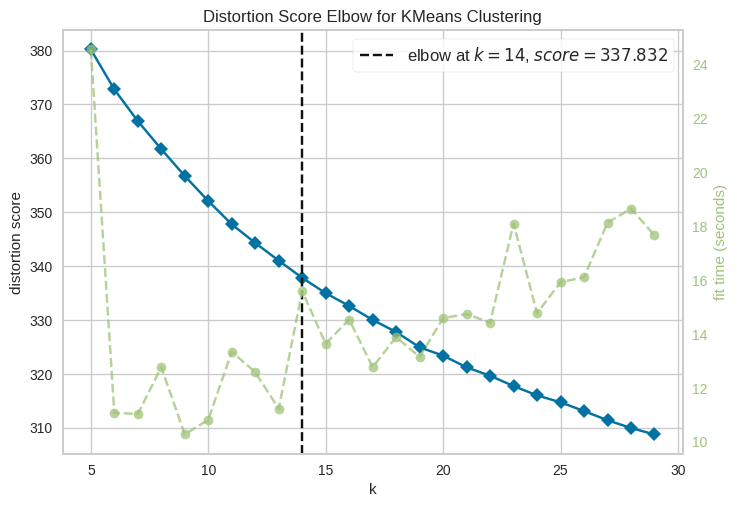

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=29, random_state=1), k=(5, 30))

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=1,  init='k-means++', max_iter=300), metric='distortion',  X = voyage_embeddings, k=(5,30))

In [ ]:
from sklearn.cluster import KMeans
# Perform KMeans clustering
NUM_CLUSTERS =  14
kmeans = KMeans(n_clusters=NUM_CLUSTERS, init= 'k-means++', max_iter=300, random_state=1)
kmeans.fit(voyage_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=14, random_state=1)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(voyage_embeddings, kmeans.labels_)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.06594965350254643


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(voyage_embeddings, kmeans.labels_)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 3.1916558134263835


In [ ]:
df_cleaned['cluster'] = kmeans.labels_
df_cleaned.sort_values(by='cluster')

update_date                                              title  \
2455  2021-09-13  Style Pooling: Automatic Text Style Obfuscatio...   
3433  2022-05-06  Equity and Fairness of Bayesian Knowledge Tracing   
1293  2021-03-09  Minimax Group Fairness: Algorithms and Experim...   
5506  2023-08-22  Towards Fair Graph Neural Networks via Graph C...   
358   2019-07-19  Global AI Ethics: A Review of the Social Impac...   
...          ...                                                ...   
777   2021-10-06  Enriched Pre-trained Transformers for Joint Sl...   
775   2020-11-24  Neural Natural Language Inference Models Parti...   
5968  2023-10-16  xDial-Eval: A Multilingual Open-Domain Dialogu...   
785   2020-06-04     GoEmotions: A Dataset of Fine-Grained Emotions   
5111  2023-05-23  Towards Dialogue Systems with Agency in Human-...   

                                               abstract  \
2455    Text style can reveal sensitive attributes o...   
3433    We consider the equity and fairness of curri...   
1293    We consider a recently introduced framework ...   
5506    Graph neural networks have shown great abili...   
358     The ethical implications and social impacts ...   
...                                                 ...   
777     Detecting the user's intent and finding the ...   
775     We address whether neural models for Natural...   
5968    Recent advancements in reference-free learne...   
785     Understanding emotion expressed in language ...   
5111    Agency, the capacity to proactively shape ev...   

                                  abstract_nonstop_list  \
2455  ['reveal', 'sensitive', 'privacy', 'violation'...   
3433  ['fairness', 'effective', 'improving', 'fairne...   
1293  ['fairness', 'fairness', 'fairness', 'fairness...   
5506  ['ability', 'bias', 'fair', 'fair', 'fairness'...   
358   ['biased', 'inequality', 'indicates', 'inequal...   
...                                                 ...   
777                           ['stronger', 'bertbased']   
775       ['systematically', 'bertbased', 'consistent']   
5968  ['advancement', 'availability', 'highquality',...   
785   ['expressed', 'harmful', 'advancement', 'large...   
5111  ['interact', 'desirable', 'controlled', 'expre...   

                                       abstract_nonstop  cluster  
2455  reveal sensitive privacy violation bias reveal...        0  
3433              fairness effective improving fairness        0  
1293  fairness fairness fairness fairness fairness v...        0  
5506  ability bias fair fair fairness bias fairness ...        0  
358   biased inequality indicates inequality deeper ...        0  
...                                                 ...      ...  
777                                  stronger bertbased       13  
775                 systematically bertbased consistent       13  
5968  advancement availability highquality commercia...       13  
785   expressed harmful advancement largest quality ...       13  
5111  interact desirable controlled expressed collab...       13  

[6489 rows x 6 columns]

In [ ]:
from collections import Counter

Counter(kmeans.labels_)

Counter({9: 767,
         5: 1087,
         3: 293,
         10: 386,
         6: 418,
         8: 709,
         4: 222,
         1: 379,
         7: 408,
         13: 372,
         12: 447,
         0: 253,
         11: 383,
         2: 365})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(kmeans.labels_):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-160-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-160-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-160-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-160-029a2783a871>:14: FutureWarning: The frame.append method is dep

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
fairness
--------------------------------------------------------------------------------
Cluster #1:
adaptation
--------------------------------------------------------------------------------
Cluster #2:
bias
--------------------------------------------------------------------------------
Cluster #3:
reasoning
--------------------------------------------------------------------------------
Cluster #4:
not related
--------------------------------------------------------------------------------
Cluster #5:
dependency
--------------------------------------------------------------------------------
Cluster #6:
ability
--------------------------------------------------------------------------------
Cluster #7:
quality
--------------------------------------------------------------------------------
Cluster #8:
effective
--------------------------------------------------------------------------------
Cluster #9:
complexity
--------------------------------------------------------

In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['fairness']), (1, ['adaptation']), (2, ['bias']), (3, ['reasoning']), (4, ['not related']), (5, ['dependency']), (6, ['ability']), (7, ['quality']), (8, ['effective']), (9, ['complexity']), (10, ['explainability']), (11, ['robustness']), (12, ['privacy']), (13, ['expert'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['fair', 'fairness', 'discrimination', 'discri...        [fairness]
1       1  ['personalized', 'adaptation', 'personalized',...      [adaptation]
2       2  ['normalization', 'quite', 'effective', 'impro...            [bias]
3       3  ['realistic', 'reasoning'] ['belief', 'belief'...       [reasoning]
4       4  [] [] [] [] [] [] [] [] [] [] [] [] [] [] [] [...     [not related]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
2455  2021-09-13  Style Pooling: Automatic Text Style Obfuscatio...   
3433  2022-05-06  Equity and Fairness of Bayesian Knowledge Tracing   
1293  2021-03-09  Minimax Group Fairness: Algorithms and Experim...   
5506  2023-08-22  Towards Fair Graph Neural Networks via Graph C...   
358   2019-07-19  Global AI Ethics: A Review of the Social Impac...   

                                               abstract  cluster  
2455    Text style can reveal sensitive attributes o...        0  
3433    We consider the equity and fairness of curri...        0  
1293    We consider a recently introduced framework ...        0  
5506    Graph neural networks have shown great abili...        0  
358     The ethical implications and social impacts ...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_km_vo = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_km_vo.head()

update_date                                              title  \
0  2021-09-13  Style Pooling: Automatic Text Style Obfuscatio...   
1  2022-05-06  Equity and Fairness of Bayesian Knowledge Tracing   
2  2021-03-09  Minimax Group Fairness: Algorithms and Experim...   
3  2023-08-22  Towards Fair Graph Neural Networks via Graph C...   
4  2019-07-19  Global AI Ethics: A Review of the Social Impac...   

                                            abstract cluster abstracts_related  
0    Text style can reveal sensitive attributes o...       0        [fairness]  
1    We consider the equity and fairness of curri...       0        [fairness]  
2    We consider a recently introduced framework ...       0        [fairness]  
3    Graph neural networks have shown great abili...       0        [fairness]  
4    The ethical implications and social impacts ...       0        [fairness]

In [ ]:
# Save the DataFrame to a CSV file
#result_km_vo.to_csv('drive/MyDrive/Colab Notebooks/results/result_kmeans_voyageai.csv', index=False)

https://github.com/Apress/text-analytics-w-python-2e/blob/master/Ch07%20-%20Text%20Similarity%20and%20Clustering/Ch07c%20-%20Document%20Clustering.ipynb




---



## Hierarchical Agglomerative Clustering

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484  ['adaptation', 'ability', 'effectiveness', 'ef...   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484          adaptation ability effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

In [ ]:
voyage_embeddings = pd.read_csv('drive/MyDrive/Colab Notebooks/voyage_embeddings.csv')
voyage_embeddings.head()

0         1         2         3         4         5         6  \
0  0.028662 -0.013062 -0.041308 -0.023958 -0.014405  0.004501  0.013942   
1  0.034264 -0.006738 -0.039211 -0.040266 -0.018910  0.011308  0.019483   
2  0.029233 -0.010256 -0.039611 -0.018207 -0.017168 -0.004510  0.005527   
3  0.041037  0.011414 -0.030026 -0.036458 -0.025674  0.009223  0.032280   
4  0.035277  0.004043 -0.025070 -0.032700 -0.019422  0.021681  0.012178   

          7         8         9  ...      1014      1015      1016      1017  \
0  0.016166 -0.011913 -0.040946  ... -0.067868  0.007846  0.000895  0.031123   
1  0.041184 -0.010914 -0.033781  ... -0.058848 -0.007399  0.017537  0.029150   
2  0.023992 -0.019719 -0.033427  ... -0.062053 -0.004786  0.015319  0.025766   
3  0.037024 -0.008951 -0.040951  ... -0.072507 -0.005830  0.003997  0.046537   
4  0.023062 -0.021576 -0.045140  ... -0.053829 -0.004099  0.015360  0.035398   

       1018      1019      1020      1021      1022      1023  
0 -0.044237  0.037956 -0.031871  0.012512  0.030852  0.010471  
1 -0.034415  0.031607 -0.020489 -0.003770  0.014212 -0.008279  
2 -0.041380  0.040765 -0.029748  0.008820  0.030546  0.005263  
3 -0.036726  0.042703 -0.012024 -0.007757  0.016384  0.015457  
4 -0.044800  0.037673 -0.021589 -0.002222  0.009512  0.004531  

[5 rows x 1024 columns]

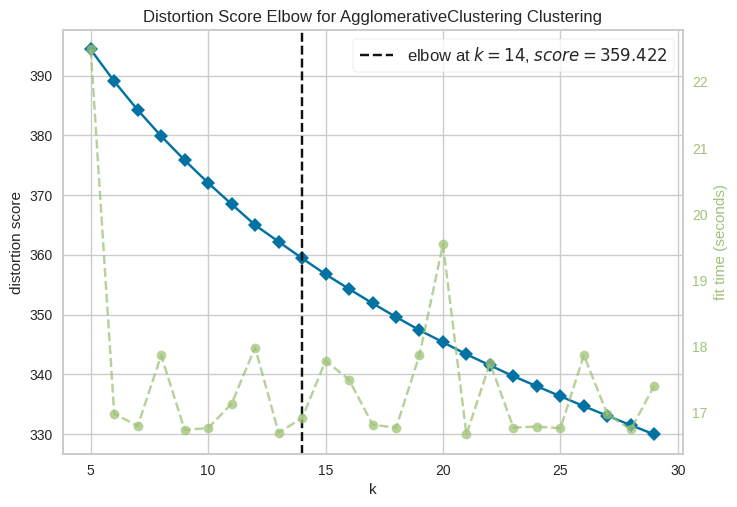

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=29), k=(5, 30))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(AgglomerativeClustering(linkage='ward'), metric='distortion',  X = voyage_embeddings, k=(5,30))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

NUM_CLUSTERS = 14

agg_clustering = AgglomerativeClustering(n_clusters=NUM_CLUSTERS, linkage='ward')
cluster_labels = agg_clustering.fit_predict(voyage_embeddings)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(voyage_embeddings, cluster_labels)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.023064275976947542


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(voyage_embeddings, cluster_labels)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 3.8890975435653323


In [ ]:
df_cleaned['cluster'] = cluster_labels
df_cleaned.sort_values(by='cluster').head()

update_date                                              title  \
3634  2022-06-15  Explainable Mixed Data Representation and Loss...   
2553  2021-12-13  Symbols as a Lingua Franca for Bridging Human-...   
5174  2023-10-12  UniChart: A Universal Vision-language Pretrain...   
5170  2023-05-25  GRILL: Grounded Vision-language Pre-training v...   
5168  2023-11-02  Faithful and Efficient Explanations for Neural...   

                                               abstract  \
3634    Developing Machine Learning (ML) algorithms ...   
2553    Despite the surprising power of many modern ...   
5174    Charts are very popular for analyzing data, ...   
5170    Generalization to unseen tasks is an importa...   
5168    A recent trend in explainable AI research ha...   

                                  abstract_nonstop_list  \
3634  ['applicable', 'interpretable', 'interpretable...   
2553  ['ability', 'interact', 'consensus', 'abstract...   
5174  ['reasoning', 'explicitly', 'variety', 'reason...   
5170  ['ability', 'reasoning', 'fashion', 'consisten...   
5168  ['explainable', 'correlate', 'complexity', 'ef...   

                                       abstract_nonstop  cluster  
3634  applicable interpretable interpretable interpr...        0  
2553  ability interact consensus abstraction reasoni...        0  
5174   reasoning explicitly variety reasoning reasoning        0  
5170             ability reasoning fashion consistently        0  
5168  explainable correlate complexity effective con...        0

In [ ]:
from collections import Counter

Counter(cluster_labels)

Counter({9: 549,
         1: 1718,
         5: 604,
         3: 275,
         0: 517,
         10: 538,
         7: 222,
         4: 483,
         11: 264,
         12: 242,
         13: 225,
         8: 232,
         2: 452,
         6: 168})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(cluster_labels):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-175-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-175-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-175-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-175-dab1332a148f>:14: FutureWarning: The frame.append method is dep

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
reasoning
--------------------------------------------------------------------------------
Cluster #1:
effective
--------------------------------------------------------------------------------
Cluster #2:
privacy
--------------------------------------------------------------------------------
Cluster #3:
quality
--------------------------------------------------------------------------------
Cluster #4:
expert
--------------------------------------------------------------------------------
Cluster #5:
effective
--------------------------------------------------------------------------------
Cluster #6:
bias
--------------------------------------------------------------------------------
Cluster #7:
not related
--------------------------------------------------------------------------------
Cluster #8:
robustness
--------------------------------------------------------------------------------
Cluster #9:
control
--------------------------------------------------------------

In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['reasoning']), (1, ['effective']), (2, ['privacy']), (3, ['quality']), (4, ['expert']), (5, ['effective']), (6, ['bias']), (7, ['not related']), (8, ['robustness']), (9, ['control']), (10, ['sustainable']), (11, ['adaptation']), (12, ['ability']), (13, ['fairness'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['realistic', 'reasoning'] ['belief', 'belief'...       [reasoning]
1       1  ['sense', 'expressed'] ['taxonomy', 'represent...       [effective]
2       2  ['incorporating', 'expert', 'surface', 'person...         [privacy]
3       3  ['efficient', 'variety', 'applicable', 'access...         [quality]
4       4  ['personalized', 'adaptation', 'personalized',...          [expert]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
3634  2022-06-15  Explainable Mixed Data Representation and Loss...   
2553  2021-12-13  Symbols as a Lingua Franca for Bridging Human-...   
5174  2023-10-12  UniChart: A Universal Vision-language Pretrain...   
5170  2023-05-25  GRILL: Grounded Vision-language Pre-training v...   
5168  2023-11-02  Faithful and Efficient Explanations for Neural...   

                                               abstract  cluster  
3634    Developing Machine Learning (ML) algorithms ...        0  
2553    Despite the surprising power of many modern ...        0  
5174    Charts are very popular for analyzing data, ...        0  
5170    Generalization to unseen tasks is an importa...        0  
5168    A recent trend in explainable AI research ha...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_agg_vo = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_agg_vo.head()

update_date                                              title  \
0  2022-06-15  Explainable Mixed Data Representation and Loss...   
1  2021-12-13  Symbols as a Lingua Franca for Bridging Human-...   
2  2023-10-12  UniChart: A Universal Vision-language Pretrain...   
3  2023-05-25  GRILL: Grounded Vision-language Pre-training v...   
4  2023-11-02  Faithful and Efficient Explanations for Neural...   

                                            abstract cluster abstracts_related  
0    Developing Machine Learning (ML) algorithms ...       0       [reasoning]  
1    Despite the surprising power of many modern ...       0       [reasoning]  
2    Charts are very popular for analyzing data, ...       0       [reasoning]  
3    Generalization to unseen tasks is an importa...       0       [reasoning]  
4    A recent trend in explainable AI research ha...       0       [reasoning]

In [ ]:
# Save the DataFrame to a CSV file
#result_agg_vo.to_csv('drive/MyDrive/Colab Notebooks/results/result_agglomerative_voyageai.csv', index=False)



---



## K-Medoids Clustering

https://www.researchgate.net/publication/328273633_Comparative_Study_of_Document_Clustering_Algorithms

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484  ['adaptation', 'ability', 'effectiveness', 'ef...   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484          adaptation ability effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

In [ ]:
voyage_embeddings = pd.read_csv('drive/MyDrive/Colab Notebooks/voyage_embeddings.csv')
voyage_embeddings.head()

0         1         2         3         4         5         6  \
0  0.028662 -0.013062 -0.041308 -0.023958 -0.014405  0.004501  0.013942   
1  0.034264 -0.006738 -0.039211 -0.040266 -0.018910  0.011308  0.019483   
2  0.029233 -0.010256 -0.039611 -0.018207 -0.017168 -0.004510  0.005527   
3  0.041037  0.011414 -0.030026 -0.036458 -0.025674  0.009223  0.032280   
4  0.035277  0.004043 -0.025070 -0.032700 -0.019422  0.021681  0.012178   

          7         8         9  ...      1014      1015      1016      1017  \
0  0.016166 -0.011913 -0.040946  ... -0.067868  0.007846  0.000895  0.031123   
1  0.041184 -0.010914 -0.033781  ... -0.058848 -0.007399  0.017537  0.029150   
2  0.023992 -0.019719 -0.033427  ... -0.062053 -0.004786  0.015319  0.025766   
3  0.037024 -0.008951 -0.040951  ... -0.072507 -0.005830  0.003997  0.046537   
4  0.023062 -0.021576 -0.045140  ... -0.053829 -0.004099  0.015360  0.035398   

       1018      1019      1020      1021      1022      1023  
0 -0.044237  0.037956 -0.031871  0.012512  0.030852  0.010471  
1 -0.034415  0.031607 -0.020489 -0.003770  0.014212 -0.008279  
2 -0.041380  0.040765 -0.029748  0.008820  0.030546  0.005263  
3 -0.036726  0.042703 -0.012024 -0.007757  0.016384  0.015457  
4 -0.044800  0.037673 -0.021589 -0.002222  0.009512  0.004531  

[5 rows x 1024 columns]

In [ ]:
!pip install scikit-learn-extra

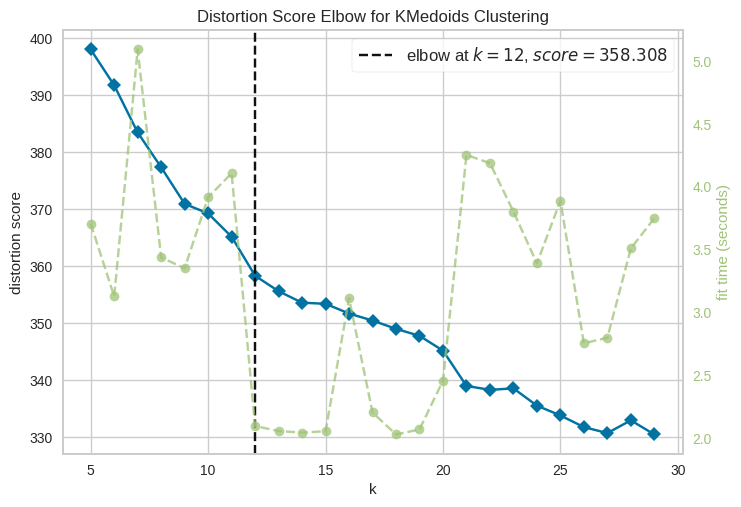

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMedoids(init='k-medoids++', n_clusters=29,
                                    random_state=1),
                 k=(5, 30))

In [ ]:
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(KMedoids(random_state=1, init = 'k-medoids++', max_iter=300), metric='distortion',  X = voyage_embeddings, k=(5,30))

In [ ]:
from sklearn_extra.cluster import KMedoids

NUM_CLUSTERS = 12
kmedoids = KMedoids(n_clusters=NUM_CLUSTERS, random_state=1, max_iter=300, init = 'k-medoids++')
kmedoids.fit(voyage_embeddings)

KMedoids(init='k-medoids++', n_clusters=12, random_state=1)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(voyage_embeddings, kmedoids.labels_)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.05777032591961398


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(voyage_embeddings, kmedoids.labels_)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 4.181854695072605


In [ ]:
df_cleaned['cluster'] = kmedoids.labels_
df_cleaned.sort_values(by='cluster')

update_date                                              title  \
4631  2023-03-27  An Operational Perspective to Fairness Interve...   
3072  2022-02-11  TamilEmo: Finegrained Emotion Detection Datase...   
3068  2022-02-10  FMP: Toward Fair Graph Message Passing against...   
3067  2022-02-09  Group Fairness Is Not Derivable From Justice: ...   
3064  2022-02-08  AI-based artistic representation of emotions f...   
...          ...                                                ...   
5408  2023-06-21  FutureTOD: Teaching Future Knowledge to Pre-tr...   
4762  2023-03-06  Implicit Stochastic Gradient Descent for Train...   
4764  2023-03-06  Sparsity May Cry: Let Us Fail (Current) Sparse...   
4767  2023-03-07  Improved Robustness Against Adaptive Attacks W...   
3451  2022-05-10  A Survey on AI Sustainability: Emerging Trends...   

                                               abstract  \
4631    As AI-based decision systems proliferate, th...   
3072    Emotional Analysis from textual input has be...   
3068    Despite recent advances in achieving fair re...   
3067    We argue that an imperfect criminal law proc...   
3064    While Artificial Intelligence (AI) technolog...   
...                                                 ...   
5408    Pre-trained language models based on general...   
4762    Physics-informed neural networks (PINNs) hav...   
4764    Sparse Neural Networks (SNNs) have received ...   
4767    Neural network ensembles have been studied e...   
3451    Artificial Intelligence (AI) is a fast-growi...   

                                  abstract_nonstop_list  \
4631  ['sensitive', 'fairness', 'sensitive', 'fairne...   
3072  ['emotional', 'labelled', 'largest', 'labelled...   
3068  ['fair', 'bias', 'bias', 'induced', 'bias', 'f...   
3067  ['fairness', 'fairness', 'fairness', 'fairness...   
3064  ['interact', 'express', 'complexity', 'fairness']   
...                                                 ...   
5408      ['effectiveness', 'robustness', 'capability']   
4762  ['effectively', 'improving', 'stability', 'ran...   
4764  ['consistently', 'complexity', 'scalability', ...   
4767  ['robustness', 'adaptive', 'robustness', 'dive...   
3451  ['consumer', 'date', 'robustness', 'environmen...   

                                       abstract_nonstop  cluster  
4631  sensitive fairness sensitive fairness robust e...        0  
3072         emotional labelled largest labelled fscore        0  
3068  fair bias bias induced bias fairness effective...        0  
3067          fairness fairness fairness fairness valid        0  
3064               interact express complexity fairness        0  
...                                                 ...      ...  
5408                effectiveness robustness capability       11  
4762  effectively improving stability randomly effec...       11  
4764  consistently complexity scalability robustness...       11  
4767  robustness adaptive robustness diversity compr...       11  
3451  consumer date robustness environmental societa...       11  

[6489 rows x 6 columns]

In [ ]:
from collections import Counter

Counter(kmedoids.labels_)

Counter({8: 1029,
         9: 799,
         3: 608,
         6: 907,
         11: 642,
         4: 228,
         1: 525,
         7: 488,
         0: 374,
         10: 477,
         2: 294,
         5: 118})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(kmedoids.labels_):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-190-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-190-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-190-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-190-fa8c0dc2d201>:14: FutureWarning: The frame.append method is dep

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
fairness
--------------------------------------------------------------------------------
Cluster #1:
adaptation
--------------------------------------------------------------------------------
Cluster #2:
bias
--------------------------------------------------------------------------------
Cluster #3:
reasoning
--------------------------------------------------------------------------------
Cluster #4:
mobility
--------------------------------------------------------------------------------
Cluster #5:
usage
--------------------------------------------------------------------------------
Cluster #6:
improving
--------------------------------------------------------------------------------
Cluster #7:
quality
--------------------------------------------------------------------------------
Cluster #8:
effective
--------------------------------------------------------------------------------
Cluster #9:
dependency
--------------------------------------------------------------

In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['fairness']), (1, ['adaptation']), (2, ['bias']), (3, ['reasoning']), (4, ['mobility']), (5, ['usage']), (6, ['improving']), (7, ['quality']), (8, ['effective']), (9, ['dependency']), (10, ['explainability']), (11, ['robustness'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['fair', 'fairness', 'discrimination', 'discri...        [fairness]
1       1  ['personalized', 'adaptation', 'personalized',...      [adaptation]
2       2  ['incorporating', 'meaningful', 'coherent', 'c...            [bias]
3       3  ['realistic', 'reasoning'] ['belief', 'belief'...       [reasoning]
4       4  [] [] [] [] [] [] [] [] [] [] [] [] [] [] [] [...        [mobility]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
4631  2023-03-27  An Operational Perspective to Fairness Interve...   
3072  2022-02-11  TamilEmo: Finegrained Emotion Detection Datase...   
3068  2022-02-10  FMP: Toward Fair Graph Message Passing against...   
3067  2022-02-09  Group Fairness Is Not Derivable From Justice: ...   
3064  2022-02-08  AI-based artistic representation of emotions f...   

                                               abstract  cluster  
4631    As AI-based decision systems proliferate, th...        0  
3072    Emotional Analysis from textual input has be...        0  
3068    Despite recent advances in achieving fair re...        0  
3067    We argue that an imperfect criminal law proc...        0  
3064    While Artificial Intelligence (AI) technolog...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_kmd_vo = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_kmd_vo.head()

update_date                                              title  \
0  2023-03-27  An Operational Perspective to Fairness Interve...   
1  2022-02-11  TamilEmo: Finegrained Emotion Detection Datase...   
2  2022-02-10  FMP: Toward Fair Graph Message Passing against...   
3  2022-02-09  Group Fairness Is Not Derivable From Justice: ...   
4  2022-02-08  AI-based artistic representation of emotions f...   

                                            abstract cluster abstracts_related  
0    As AI-based decision systems proliferate, th...       0        [fairness]  
1    Emotional Analysis from textual input has be...       0        [fairness]  
2    Despite recent advances in achieving fair re...       0        [fairness]  
3    We argue that an imperfect criminal law proc...       0        [fairness]  
4    While Artificial Intelligence (AI) technolog...       0        [fairness]

In [ ]:
# Save the DataFrame to a CSV file
#result_kmd_vo.to_csv('drive/MyDrive/Colab Notebooks/results/result_kmedoids_voyageai.csv', index=False)

# TF-IDF

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484  ['adaptation', 'ability', 'effectiveness', 'ef...   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484          adaptation ability effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np

# Handle NaN values by replacing them with empty strings
df_cleaned['abstract_nonstop'].fillna('', inplace=True)

# Convert text to a matrix of token counts
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(df_cleaned['abstract_nonstop'])

# Then, apply TF-IDF transformation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Convert X_train_tfidf from matrix to array
tfidf_array = X_train_tfidf.toarray()

## K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

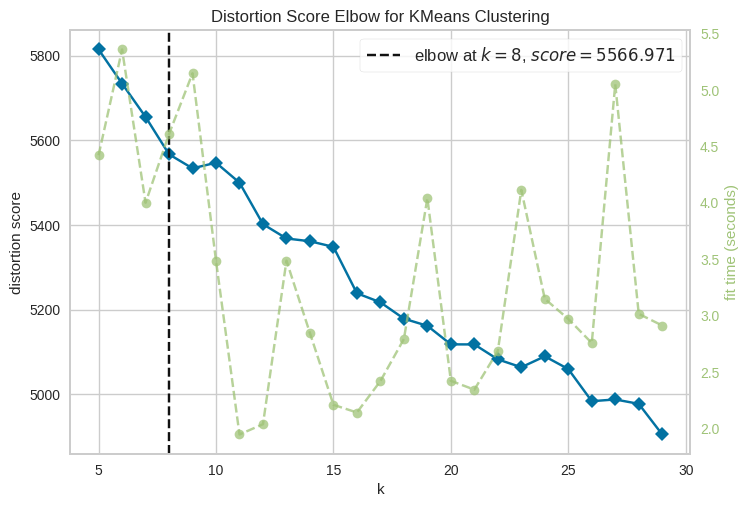

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=29, random_state=1), k=(5, 30))

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=1,  init='k-means++', max_iter=300), metric='distortion',  X = tfidf_array, k=(5,30))

In [ ]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
NUM_CLUSTERS =  8
kmeans = KMeans(n_clusters=NUM_CLUSTERS, init='k-means++', max_iter=300, random_state=1)
kmeans.fit(tfidf_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=1)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(tfidf_array, kmeans.labels_)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.049405797134928674


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Now, calculate the Davies-Bouldin score
dbs = davies_bouldin_score(tfidf_array, kmeans.labels_)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 3.5275295738093986


In [ ]:
df_cleaned['cluster'] = kmeans.labels_
df_cleaned.sort_values(by='cluster')

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
3870  2022-08-22  Ginex: SSD-enabled Billion-scale Graph Neural ...   
3869  2022-08-22  A Review of Uncertainty for Deep Reinforcement...   
3868  2022-08-19  "Melatonin": A Case Study on AI-induced Musica...   
3866  2022-08-19  Explainable Reinforcement Learning on Financia...   
...          ...                                                ...   
4719  2023-05-30  A Novel Noise Injection-based Training Scheme ...   
2018  2021-05-31  Training Classifiers that are Universally Robu...   
4727  2023-07-04  Feature Partition Aggregation: A Fast Certifie...   
4656  2023-02-14  Robustness Implies Fairness in Causal Algorith...   
4537  2023-04-10  Counteracts: Testing Stereotypical Representat...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
3870    Recently, Graph Neural Networks (GNNs) have ...   
3869    Uncertainty is ubiquitous in games, both in ...   
3868    Although the use of AI tools in music compos...   
3866    Explainable Artificial Intelligence (XAI) re...   
...                                                 ...   
4719    Noise injection-based method has been shown ...   
2018    For classification tasks, deep neural networ...   
4727    Sparse or $\ell_0$ adversarial attacks arbit...   
4656    Algorithmic recourse aims to disclose the in...   
4537    Recently, language models have demonstrated ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
3870  ['powerful', 'effectively', 'scalability', 'mo...   
3869                                        ['variety']   
3868                                    ['composition']   
3866  ['explainable', 'transparency', 'trust', 'sens...   
...                                                 ...   
4719  ['robustness', 'robustness', 'efficiency', 'ro...   
2018                ['robust', 'sensitive', 'reliable']   
4727  ['robustness', 'stronger', 'robustness', 'robu...   
4656  ['effective', 'robust', 'fair', 'fairness', 'r...   
4537                         ['robustness', 'interact']   

                                       abstract_nonstop  cluster  
0           efficient complexity efficiency scalability        0  
3870          powerful effectively scalability movement        0  
3869                                            variety        0  
3868                                        composition        0  
3866  explainable transparency trust sensitive socie...        0  
...                                                 ...      ...  
4719  robustness robustness efficiency robustness ro...        7  
2018                          robust sensitive reliable        7  
4727  robustness stronger robustness robustness robu...        7  
4656  effective robust fair fairness robustness robu...        7  
4537                                robustness interact        7  

[6489 rows x 6 columns]

In [ ]:
from collections import Counter

Counter(kmeans.labels_)

Counter({0: 4348, 4: 231, 6: 394, 3: 403, 5: 349, 2: 255, 1: 207, 7: 302})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(kmeans.labels_):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-206-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-206-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-206-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-206-029a2783a871>:14: FutureWarning: The frame.append method is dep

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
bias
--------------------------------------------------------------------------------
Cluster #1:
fairness
--------------------------------------------------------------------------------
Cluster #2:
adaptation
--------------------------------------------------------------------------------
Cluster #3:
effectiveness
--------------------------------------------------------------------------------
Cluster #4:
reasoning
--------------------------------------------------------------------------------
Cluster #5:
quality
--------------------------------------------------------------------------------
Cluster #6:
effective
--------------------------------------------------------------------------------
Cluster #7:
robustness
--------------------------------------------------------------------------------


In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['bias']), (1, ['fairness']), (2, ['adaptation']), (3, ['effectiveness']), (4, ['reasoning']), (5, ['quality']), (6, ['effective']), (7, ['robustness'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['efficient', 'complexity', 'efficiency', 'sca...            [bias]
1       1  ['fair', 'fairness', 'discrimination', 'discri...        [fairness]
2       2  ['transferable', 'adaptation', 'adaptation', '...      [adaptation]
3       3  ['arise', 'illustrate', 'effectiveness'] ['sol...   [effectiveness]
4       4  ['realistic', 'reasoning'] ['reasoning', 'reas...       [reasoning]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
3870  2022-08-22  Ginex: SSD-enabled Billion-scale Graph Neural ...   
3869  2022-08-22  A Review of Uncertainty for Deep Reinforcement...   
3868  2022-08-19  "Melatonin": A Case Study on AI-induced Musica...   
3866  2022-08-19  Explainable Reinforcement Learning on Financia...   

                                               abstract  cluster  
0       We introduce an efficient method for trainin...        0  
3870    Recently, Graph Neural Networks (GNNs) have ...        0  
3869    Uncertainty is ubiquitous in games, both in ...        0  
3868    Although the use of AI tools in music compos...        0  
3866    Explainable Artificial Intelligence (XAI) re...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_km_tfidf = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_km_tfidf.head()

update_date                                              title  \
0  2022-02-07  Training linear ranking SVMs in linearithmic t...   
1  2022-08-22  Ginex: SSD-enabled Billion-scale Graph Neural ...   
2  2022-08-22  A Review of Uncertainty for Deep Reinforcement...   
3  2022-08-19  "Melatonin": A Case Study on AI-induced Musica...   
4  2022-08-19  Explainable Reinforcement Learning on Financia...   

                                            abstract cluster abstracts_related  
0    We introduce an efficient method for trainin...       0            [bias]  
1    Recently, Graph Neural Networks (GNNs) have ...       0            [bias]  
2    Uncertainty is ubiquitous in games, both in ...       0            [bias]  
3    Although the use of AI tools in music compos...       0            [bias]  
4    Explainable Artificial Intelligence (XAI) re...       0            [bias]

In [ ]:
# Save the DataFrame to a CSV file
#result_km_tfidf.to_csv('drive/MyDrive/Colab Notebooks/results/result_kmeans_tfidf.csv', index=False)

## Hierarchical Agglomerative Clustering

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484  ['adaptation', 'ability', 'effectiveness', 'ef...   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484          adaptation ability effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

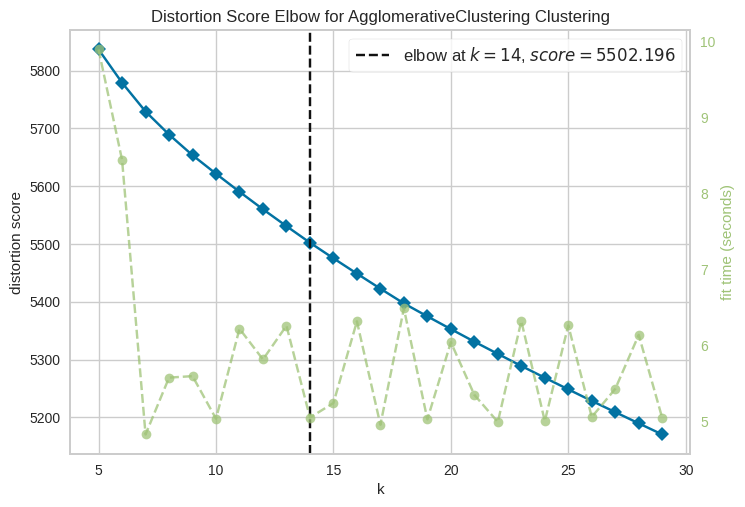

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=29), k=(5, 30))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(AgglomerativeClustering(linkage='ward'), metric='distortion',  X = tfidf_array, k=(5,30))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

NUM_CLUSTERS = 14

agg_clustering = AgglomerativeClustering(n_clusters=NUM_CLUSTERS, linkage='ward')
cluster_labels = agg_clustering.fit_predict(tfidf_array)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(tfidf_array, cluster_labels)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.01977365066097296


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(tfidf_array, cluster_labels)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 2.5331782490043944


In [ ]:
df_cleaned['cluster'] = cluster_labels
df_cleaned.sort_values(by='cluster').head()

update_date                                              title  \
4636  2023-08-22  Efficient Gradient Approximation Method for Co...   
1250  2021-06-15  Multitask Training with Text Data for End-to-E...   
4528  2023-01-09  Does compressing activations help model parall...   
2397  2021-09-02  Discovering Representation Sprachbund For Mult...   
4091  2023-07-18  A policy gradient approach for Finite Horizon ...   

                                               abstract  \
4636    Bilevel optimization has been developed for ...   
1250    We propose a multitask training method for a...   
4528    Large-scale Transformer models are known for...   
2397    Multilingual pre-trained models have demonst...   
4091    The infinite horizon setting is widely adopt...   

                                  abstract_nonstop_list  \
4636          ['constrained', 'inequality', 'efficacy']   
1250                                  ['effectiveness']   
4528                                  ['effectiveness']   
2397                                  ['effectiveness']   
4091  ['control', 'constrained', 'constrained', 'con...   

                                 abstract_nonstop  cluster  
4636              constrained inequality efficacy        0  
1250                                effectiveness        0  
4528                                effectiveness        0  
2397                                effectiveness        0  
4091  control constrained constrained constrained        0

In [ ]:
from collections import Counter

Counter(cluster_labels)

Counter({2: 5077,
         7: 113,
         6: 93,
         5: 153,
         0: 92,
         9: 196,
         4: 172,
         1: 128,
         11: 54,
         13: 60,
         8: 66,
         10: 61,
         3: 120,
         12: 104})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(cluster_labels):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-220-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-220-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-220-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-220-dab1332a148f>:14: FutureWarning: The frame.append method is dep

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
constrained
--------------------------------------------------------------------------------
Cluster #1:
efficient
--------------------------------------------------------------------------------
Cluster #2:
effective
--------------------------------------------------------------------------------
Cluster #3:
explainability
--------------------------------------------------------------------------------
Cluster #4:
robustness
--------------------------------------------------------------------------------
Cluster #5:
adaptation
--------------------------------------------------------------------------------
Cluster #6:
quality
--------------------------------------------------------------------------------
Cluster #7:
reasoning
--------------------------------------------------------------------------------
Cluster #8:
dependency
--------------------------------------------------------------------------------
Cluster #9:
fairness
--------------------------------------------

In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['constrained']), (1, ['efficient']), (2, ['effective']), (3, ['explainability']), (4, ['robustness']), (5, ['adaptation']), (6, ['quality']), (7, ['reasoning']), (8, ['dependency']), (9, ['fairness']), (10, ['expert']), (11, ['ability']), (12, ['bias']), (13, ['diversity'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['optimized', 'secondly', 'constrained', 'cons...     [constrained]
1       1  ['effective'] ['effective'] ['effective'] ['ef...       [efficient]
2       2  ['efficient', 'complexity', 'efficiency', 'sca...       [effective]
3       3  ['taxonomy', 'explainability', 'explainability...  [explainability]
4       4  ['robustness', 'improving', 'effectiveness'] [...      [robustness]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
4636  2023-08-22  Efficient Gradient Approximation Method for Co...   
1250  2021-06-15  Multitask Training with Text Data for End-to-E...   
4528  2023-01-09  Does compressing activations help model parall...   
2397  2021-09-02  Discovering Representation Sprachbund For Mult...   
4091  2023-07-18  A policy gradient approach for Finite Horizon ...   

                                               abstract  cluster  
4636    Bilevel optimization has been developed for ...        0  
1250    We propose a multitask training method for a...        0  
4528    Large-scale Transformer models are known for...        0  
2397    Multilingual pre-trained models have demonst...        0  
4091    The infinite horizon setting is widely adopt...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_agg_tfidf = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_agg_tfidf.head()

update_date                                              title  \
0  2023-08-22  Efficient Gradient Approximation Method for Co...   
1  2021-06-15  Multitask Training with Text Data for End-to-E...   
2  2023-01-09  Does compressing activations help model parall...   
3  2021-09-02  Discovering Representation Sprachbund For Mult...   
4  2023-07-18  A policy gradient approach for Finite Horizon ...   

                                            abstract cluster abstracts_related  
0    Bilevel optimization has been developed for ...       0     [constrained]  
1    We propose a multitask training method for a...       0     [constrained]  
2    Large-scale Transformer models are known for...       0     [constrained]  
3    Multilingual pre-trained models have demonst...       0     [constrained]  
4    The infinite horizon setting is widely adopt...       0     [constrained]

In [ ]:
# Save the DataFrame to a CSV file
#result_agg_tfidf.to_csv('drive/MyDrive/Colab Notebooks/results/result_agglomerative_tfidf.csv', index=False)

## K-Medoids Clustering

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484  ['adaptation', 'ability', 'effectiveness', 'ef...   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484          adaptation ability effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

In [ ]:
!pip install scikit-learn-extra

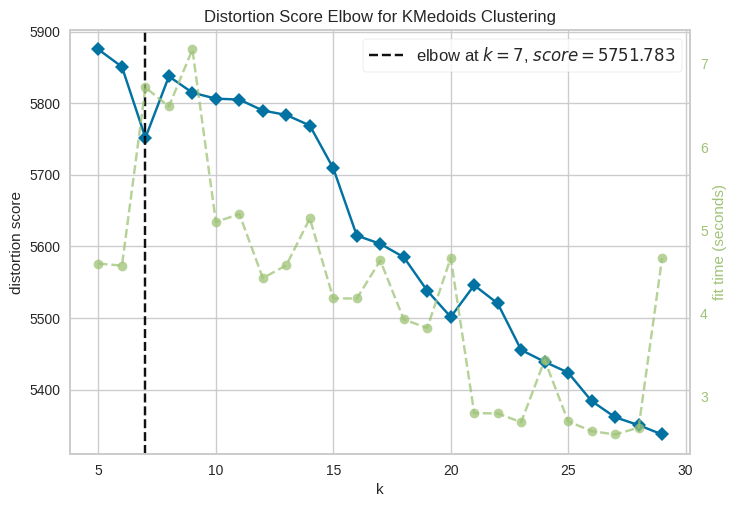

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMedoids(init='k-medoids++', n_clusters=29,
                                    random_state=1),
                 k=(5, 30))

In [ ]:
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(KMedoids(random_state=1, init = 'k-medoids++', max_iter=300), metric='distortion', X = tfidf_array, k=(5,30))

In [ ]:
from sklearn_extra.cluster import KMedoids

NUM_CLUSTERS = 7
kmedoids = KMedoids(n_clusters=NUM_CLUSTERS, random_state=1, max_iter=300, init = 'k-medoids++')
kmedoids.fit(tfidf_array)

KMedoids(init='k-medoids++', n_clusters=7, random_state=1)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(tfidf_array, kmedoids.labels_)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.023411409040633793


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Now, calculate the Davies-Bouldin score
dbs = davies_bouldin_score(tfidf_array, kmedoids.labels_)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 2.203412997151241


In [ ]:
df_cleaned['cluster'] = kmedoids.labels_
df_cleaned.sort_values(by='cluster')

update_date                                              title  \
4766  2023-03-07  Achieving Counterfactual Fairness for Anomaly ...   
4388  2023-05-23                   Fairness in Multi-Agent Planning   
2314  2022-03-10          Fair Decision-Making for Food Inspections   
6279  2023-11-20  Causal Fairness-Guided Dataset Reweighting usi...   
4889  2023-07-18  Last-Layer Fairness Fine-tuning is Simple and ...   
...          ...                                                ...   
2247  2021-07-19          When does loss-based prioritization fail?   
2246  2021-07-16    Algorithmic Concept-based Explainable Reasoning   
2245  2021-11-15  Only Train Once: A One-Shot Neural Network Tra...   
2256  2021-08-10  CausalBERT: Injecting Causal Knowledge Into Pr...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
4766    Ensuring fairness in anomaly detection model...   
4388    In cooperative Multi-Agent Planning (MAP), a...   
2314    Data and algorithms are essential and comple...   
6279    The importance of achieving fairness in mach...   
4889    As machine learning has been deployed ubiqui...   
...                                                 ...   
2247    Not all examples are created equal, but stan...   
2246    Recent research on graph neural network (GNN...   
2245    Structured pruning is a commonly used techni...   
2256    Recent work has shown success in incorporati...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
4766  ['fairness', 'fair', 'fairness', 'fairness', '...   
4388   ['fair', 'fairness', 'fair', 'fairness', 'fair']   
2314  ['food', 'violation', 'fairness', 'violation',...   
6279  ['fairness', 'fairness', 'fairness', 'fairness...   
4889  ['fairness', 'fairness', 'fair', 'sensitive', ...   
...                                                 ...   
2247                                                 []   
2246  ['combinatorial', 'explainability', 'capable',...   
2245           ['comparable', 'effectiveness', 'squad']   
2256  ['incorporating', 'today', 'effectively', 'eff...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  cluster  
4766  fairness fair fairness fairness fairness fair ...        0  
4388                   fair fairness fair fairness fair        0  
2314  food violation fairness violation desirable fa...        0  
6279  fairness fairness fairness fairness bias incor...        0  
4889  fairness fairness fair sensitive fairness fair...        0  
...                                                 ...      ...  
2247                                                NaN        6  
2246  combinatorial explainability capable accuratel...        6  
2245                     comparable effectiveness squad        6  
2256  incorporating today effectively effectiveness ...        6  
6488                          enhanced drawing efficacy        6  

[6489 rows x 6 columns]

In [ ]:
from collections import Counter

Counter(kmedoids.labels_)

Counter({6: 5770, 1: 181, 0: 166, 3: 73, 5: 86, 2: 117, 4: 96})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(kmedoids.labels_):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-234-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-234-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-234-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-234-fa8c0dc2d201>:14: FutureWarning: The frame.append method is dep

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
fairness
--------------------------------------------------------------------------------
Cluster #1:
adaptation
--------------------------------------------------------------------------------
Cluster #2:
bias
--------------------------------------------------------------------------------
Cluster #3:
efficiency
--------------------------------------------------------------------------------
Cluster #4:
robust
--------------------------------------------------------------------------------
Cluster #5:
ability
--------------------------------------------------------------------------------
Cluster #6:
reasoning
--------------------------------------------------------------------------------


In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['fairness']), (1, ['adaptation']), (2, ['bias']), (3, ['efficiency']), (4, ['robust']), (5, ['ability']), (6, ['reasoning'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['fair', 'fairness', 'discrimination', 'discri...        [fairness]
1       1  ['transferable', 'adaptation', 'adaptation', '...      [adaptation]
2       2  ['inductive', 'bias', 'bias'] ['bias', 'reliab...            [bias]
3       3  ['outline', 'efficiency'] ['efficiency', 'stro...      [efficiency]
4       4  ['robust', 'transferable', 'robust'] ['quality...          [robust]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
4766  2023-03-07  Achieving Counterfactual Fairness for Anomaly ...   
4388  2023-05-23                   Fairness in Multi-Agent Planning   
2314  2022-03-10          Fair Decision-Making for Food Inspections   
6279  2023-11-20  Causal Fairness-Guided Dataset Reweighting usi...   
4889  2023-07-18  Last-Layer Fairness Fine-tuning is Simple and ...   

                                               abstract  cluster  
4766    Ensuring fairness in anomaly detection model...        0  
4388    In cooperative Multi-Agent Planning (MAP), a...        0  
2314    Data and algorithms are essential and comple...        0  
6279    The importance of achieving fairness in mach...        0  
4889    As machine learning has been deployed ubiqui...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_kmd_tfidf = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_kmd_tfidf.head()

update_date                                              title  \
0  2023-03-07  Achieving Counterfactual Fairness for Anomaly ...   
1  2023-05-23                   Fairness in Multi-Agent Planning   
2  2022-03-10          Fair Decision-Making for Food Inspections   
3  2023-11-20  Causal Fairness-Guided Dataset Reweighting usi...   
4  2023-07-18  Last-Layer Fairness Fine-tuning is Simple and ...   

                                            abstract cluster abstracts_related  
0    Ensuring fairness in anomaly detection model...       0        [fairness]  
1    In cooperative Multi-Agent Planning (MAP), a...       0        [fairness]  
2    Data and algorithms are essential and comple...       0        [fairness]  
3    The importance of achieving fairness in mach...       0        [fairness]  
4    As machine learning has been deployed ubiqui...       0        [fairness]

In [ ]:
# Save the DataFrame to a CSV file
#result_kmd_tfidf.to_csv('drive/MyDrive/Colab Notebooks/results/result_kmedoid_tfidf.csv', index=False)

# Doc2Vec

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484  ['adaptation', 'ability', 'effectiveness', 'ef...   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484          adaptation ability effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

In [ ]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

# Check for missing values and replace them with an empty string or some appropriate value
df_cleaned['abstract_nonstop'] = df_cleaned['abstract_nonstop'].fillna('')

# Tokenization (assuming text is already preprocessed and tokenized)
tokenized_abstracts = df_cleaned['abstract_nonstop'].apply(lambda x: x.split() if isinstance(x, str) else [])

# Create TaggedDocument for Doc2Vec
tagged_data = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(tokenized_abstracts)]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(tagged_data, vector_size=300, window=5, min_count=1, workers=4)

# Get the document vectors
doc_vectors = [doc2vec_model.dv[i] for i in range(len(tagged_data))]

# Convert doc_vectors to a 2D numpy array
doc_vectors_array = np.array(doc_vectors)

## K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

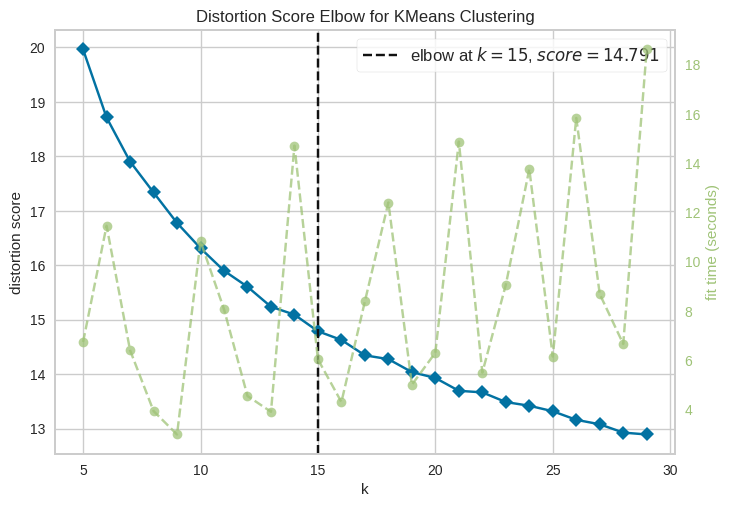

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=29, random_state=1), k=(5, 30))

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=1,  init='k-means++', max_iter=300), metric='distortion',  X = doc_vectors_array, k=(5,30))

In [ ]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
NUM_CLUSTERS =  15
kmeans = KMeans(n_clusters=NUM_CLUSTERS, init='k-means++', max_iter=300, random_state=1)
kmeans.fit(doc_vectors_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=15, random_state=1)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(doc_vectors_array, kmeans.labels_)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.091265686


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Now, calculate the Davies-Bouldin score
dbs = davies_bouldin_score(doc_vectors_array, kmeans.labels_)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 1.737663138701185


In [ ]:
df_cleaned['cluster'] = kmeans.labels_
df_cleaned.sort_values(by='cluster')

update_date                                              title  \
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   
2669  2022-03-22  Morphosyntactic Tagging with Pre-trained Langu...   
2664  2021-10-14  Improving Graph-based Sentence Ordering with I...   
2663  2022-06-20  Dropout Prediction Uncertainty Estimation Usin...   
2660  2022-05-20  LiST: Lite Prompted Self-training Makes Parame...   
...          ...                                                ...   
968   2020-08-19                Runtime-Safety-Guided Policy Repair   
2596  2021-10-29  Online Robust Reinforcement Learning with Mode...   
5691  2023-08-22  GBM-based Bregman Proximal Algorithms for Cons...   
2577  2021-09-28  Parallel Refinements for Lexically Constrained...   
1033  2021-05-18  Profile Consistency Identification for Open-do...   

                                               abstract  \
6488    Pre-trained conversation models (PCMs) have ...   
2669    We present state-of-the-art results on morph...   
2664    Dominant sentence ordering models can be cla...   
2663    Dropout has been commonly used to quantify p...   
2660    We present a new method LiST is short for Li...   
...                                                 ...   
968     We study the problem of policy repair for le...   
2596    Robust reinforcement learning (RL) is to fin...   
5691    As the complexity of learning tasks surges, ...   
2577    Lexically constrained text generation aims t...   
1033    Maintaining a consistent attribute profile i...   

                                  abstract_nonstop_list  \
6488                ['enhanced', 'drawing', 'efficacy']   
2669         ['variety', 'consistently', 'highquality']   
2664                         ['adapt', 'effectiveness']   
2663                          ['variety', 'comparable']   
2660      ['effectively', 'efficient', 'comprehensive']   
...                                                 ...   
968   ['control', 'control', 'safety', 'safety', 'ab...   
2596  ['robust', 'robust', 'robust', 'robust', 'fash...   
5691  ['complexity', 'constrained', 'fairness', 'ada...   
2577  ['constrained', 'control', 'incorporating', 'c...   
1033  ['maintaining', 'consistent', 'improving', 'co...   

                                       abstract_nonstop  cluster  
6488                          enhanced drawing efficacy        0  
2669                   variety consistently highquality        0  
2664                                adapt effectiveness        0  
2663                                 variety comparable        0  
2660                effectively efficient comprehensive        0  
...                                                 ...      ...  
968   control control safety safety ability control ...       14  
2596  robust robust robust robust fashion robust rob...       14  
5691  complexity constrained fairness adapt constrai...       14  
2577  constrained control incorporating complexity c...       14  
1033  maintaining consistent improving consistency c...       14  

[6489 rows x 6 columns]

In [ ]:
from collections import Counter

Counter(kmeans.labels_)

Counter({9: 790,
         0: 1106,
         8: 1086,
         1: 732,
         5: 889,
         2: 428,
         3: 633,
         7: 27,
         4: 165,
         6: 283,
         11: 88,
         13: 40,
         10: 70,
         14: 151,
         12: 1})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(kmeans.labels_):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-344-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-344-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-344-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-344-029a2783a871>:14: FutureWarning: The frame.append method is dep

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
effective
--------------------------------------------------------------------------------
Cluster #1:
effective
--------------------------------------------------------------------------------
Cluster #2:
fairness
--------------------------------------------------------------------------------
Cluster #3:
reasoning
--------------------------------------------------------------------------------
Cluster #4:
fairness
--------------------------------------------------------------------------------
Cluster #5:
effective
--------------------------------------------------------------------------------
Cluster #6:
headline
--------------------------------------------------------------------------------
Cluster #7:
maintenance
--------------------------------------------------------------------------------
Cluster #8:
effectiveness
--------------------------------------------------------------------------------
Cluster #9:
effective
------------------------------------------------

In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['effective']), (1, ['effective']), (2, ['fairness']), (3, ['reasoning']), (4, ['fairness']), (5, ['effective']), (6, ['headline']), (7, ['maintenance']), (8, ['effectiveness']), (9, ['effective']), (10, ['reasoning']), (11, ['fairness']), (12, ['maintenance']), (13, ['sustainable']), (14, ['reasoning'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['weak', 'dealing', 'complexity', 'complexity'...       [effective]
1       1  ['appear', 'flexible', 'explicit', 'satisfacti...       [effective]
2       2  ['composition', 'weak', 'composition', 'satisf...        [fairness]
3       3  [] ['consistency', 'sense', 'consistent', 'qua...       [reasoning]
4       4  ['fair', 'fairness', 'discrimination', 'discri...        [fairness]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   
2669  2022-03-22  Morphosyntactic Tagging with Pre-trained Langu...   
2664  2021-10-14  Improving Graph-based Sentence Ordering with I...   
2663  2022-06-20  Dropout Prediction Uncertainty Estimation Usin...   
2660  2022-05-20  LiST: Lite Prompted Self-training Makes Parame...   

                                               abstract  cluster  
6488    Pre-trained conversation models (PCMs) have ...        0  
2669    We present state-of-the-art results on morph...        0  
2664    Dominant sentence ordering models can be cla...        0  
2663    Dropout has been commonly used to quantify p...        0  
2660    We present a new method LiST is short for Li...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_km_d2v = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_km_d2v.head()

update_date                                              title  \
0  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   
1  2022-03-22  Morphosyntactic Tagging with Pre-trained Langu...   
2  2021-10-14  Improving Graph-based Sentence Ordering with I...   
3  2022-06-20  Dropout Prediction Uncertainty Estimation Usin...   
4  2022-05-20  LiST: Lite Prompted Self-training Makes Parame...   

                                            abstract cluster abstracts_related  
0    Pre-trained conversation models (PCMs) have ...       0       [effective]  
1    We present state-of-the-art results on morph...       0       [effective]  
2    Dominant sentence ordering models can be cla...       0       [effective]  
3    Dropout has been commonly used to quantify p...       0       [effective]  
4    We present a new method LiST is short for Li...       0       [effective]

In [ ]:
# Save the DataFrame to a CSV file
#result_km_d2v.to_csv('drive/MyDrive/Colab Notebooks/results/result_kmeans_d2v.csv', index=False)

## Hierarchical Agglomerative Clustering

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484  ['adaptation', 'ability', 'effectiveness', 'ef...   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484          adaptation ability effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

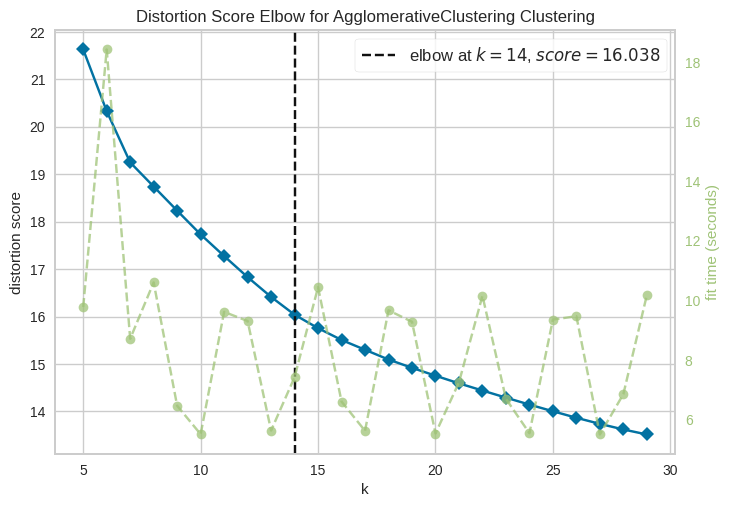

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=29), k=(5, 30))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(AgglomerativeClustering(linkage='ward'), metric='distortion',  X = doc_vectors_array, k=(5,30))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

NUM_CLUSTERS = 14

agg_clustering = AgglomerativeClustering(n_clusters=NUM_CLUSTERS, linkage='ward')
cluster_labels = agg_clustering.fit_predict(doc_vectors_array)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(doc_vectors_array, cluster_labels)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.1005765


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(doc_vectors_array, cluster_labels)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 1.7492734756968331


In [ ]:
df_cleaned['cluster'] = cluster_labels
df_cleaned.sort_values(by='cluster').head()

update_date                                              title  \
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   
3256  2022-03-24  Can Prompt Probe Pretrained Language Models? U...   
939   2021-09-02                       Karl Marx and the Blockchain   
937   2020-07-27  IDS at SemEval-2020 Task 10: Does Pre-trained ...   
3266  2022-03-29  On the Intrinsic and Extrinsic Fairness Evalua...   

                                               abstract  \
6488    Pre-trained conversation models (PCMs) have ...   
3256    Prompt-based probing has been widely used in...   
939     Blockchain is often presented as a technolog...   
937     We propose a novel method that enables us to...   
3266    Multiple metrics have been introduced to mea...   

                                  abstract_nonstop_list  \
6488                ['enhanced', 'drawing', 'efficacy']   
3256  ['ability', 'applicability', 'bias', 'biased',...   
939   ['technological', 'society', 'balance', 'today...   
937                ['relying', 'reasonable', 'capable']   
3266  ['fairness', 'fairness', 'fairness', 'bias', '...   

                                       abstract_nonstop  cluster  
6488                          enhanced drawing efficacy        0  
3256  ability applicability bias biased valuable rel...        0  
939           technological society balance today sense        0  
937                          relying reasonable capable        0  
3266          fairness fairness fairness bias correlate        0

In [ ]:
from collections import Counter

Counter(cluster_labels)

Counter({11: 768,
         0: 1002,
         9: 1229,
         3: 1258,
         12: 488,
         2: 924,
         5: 62,
         6: 208,
         1: 15,
         13: 27,
         8: 239,
         10: 65,
         4: 154,
         7: 50})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(cluster_labels):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-358-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-358-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-358-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-358-dab1332a148f>:14: FutureWarning: The frame.append method is dep

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
effective
--------------------------------------------------------------------------------
Cluster #1:
maintenance
--------------------------------------------------------------------------------
Cluster #2:
reasoning
--------------------------------------------------------------------------------
Cluster #3:
effective
--------------------------------------------------------------------------------
Cluster #4:
fairness
--------------------------------------------------------------------------------
Cluster #5:
sustainable
--------------------------------------------------------------------------------
Cluster #6:
reasoning
--------------------------------------------------------------------------------
Cluster #7:
faithfulness
--------------------------------------------------------------------------------
Cluster #8:
meeting
--------------------------------------------------------------------------------
Cluster #9:
effective
-----------------------------------------------

In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['effective']), (1, ['maintenance']), (2, ['reasoning']), (3, ['effective']), (4, ['fairness']), (5, ['sustainable']), (6, ['reasoning']), (7, ['faithfulness']), (8, ['meeting']), (9, ['effective']), (10, ['fairness']), (11, ['effective']), (12, ['effectiveness']), (13, ['fairness'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['weak', 'dealing', 'complexity', 'complexity'...       [effective]
1       1  ['aircraft', 'arise', 'aircraft', 'efficiency'...     [maintenance]
2       2  [] ['consistently', 'dictionary', 'explicit', ...       [reasoning]
3       3  ['appear', 'flexible', 'explicit', 'satisfacti...       [effective]
4       4  ['relying', 'inductive', 'bias', 'automaticall...        [fairness]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   
3256  2022-03-24  Can Prompt Probe Pretrained Language Models? U...   
939   2021-09-02                       Karl Marx and the Blockchain   
937   2020-07-27  IDS at SemEval-2020 Task 10: Does Pre-trained ...   
3266  2022-03-29  On the Intrinsic and Extrinsic Fairness Evalua...   

                                               abstract  cluster  
6488    Pre-trained conversation models (PCMs) have ...        0  
3256    Prompt-based probing has been widely used in...        0  
939     Blockchain is often presented as a technolog...        0  
937     We propose a novel method that enables us to...        0  
3266    Multiple metrics have been introduced to mea...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_agg_d2v = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_agg_d2v.head()

update_date                                              title  \
0  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   
1  2022-03-24  Can Prompt Probe Pretrained Language Models? U...   
2  2021-09-02                       Karl Marx and the Blockchain   
3  2020-07-27  IDS at SemEval-2020 Task 10: Does Pre-trained ...   
4  2022-03-29  On the Intrinsic and Extrinsic Fairness Evalua...   

                                            abstract cluster abstracts_related  
0    Pre-trained conversation models (PCMs) have ...       0       [effective]  
1    Prompt-based probing has been widely used in...       0       [effective]  
2    Blockchain is often presented as a technolog...       0       [effective]  
3    We propose a novel method that enables us to...       0       [effective]  
4    Multiple metrics have been introduced to mea...       0       [effective]

In [ ]:
# Save the DataFrame to a CSV file
#result_agg_d2v.to_csv('drive/MyDrive/Colab Notebooks/results/result_agglomerative_d2v.csv', index=False)

## K-Medoids Clustering

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484  ['adaptation', 'ability', 'effectiveness', 'ef...   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484          adaptation ability effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

In [ ]:
!pip install scikit-learn-extra

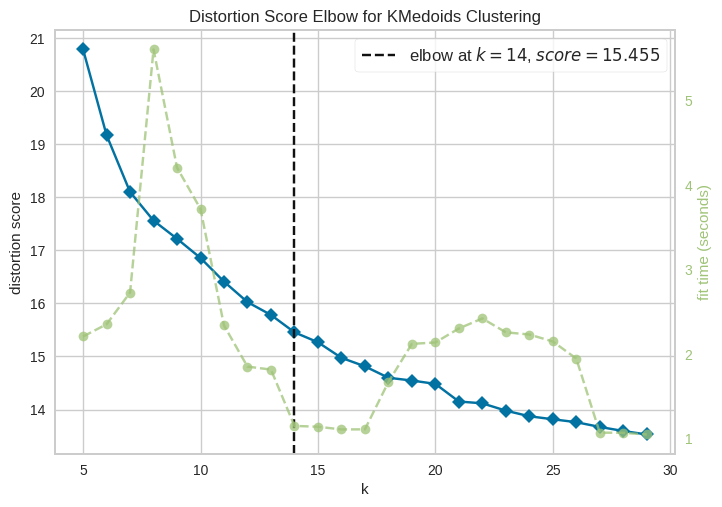

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMedoids(init='k-medoids++', n_clusters=29,
                                    random_state=1),
                 k=(5, 30))

In [ ]:
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(KMedoids(random_state=1, init = 'k-medoids++', max_iter=300), metric='distortion',  X = doc_vectors_array, k=(5,30))

In [ ]:
from sklearn_extra.cluster import KMedoids

NUM_CLUSTERS = 14
kmedoids = KMedoids(n_clusters=NUM_CLUSTERS, random_state=1, max_iter=300, init = 'k-medoids++')
kmedoids.fit(doc_vectors_array)

KMedoids(init='k-medoids++', n_clusters=14, random_state=1)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(doc_vectors_array, kmedoids.labels_)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.09678423


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(doc_vectors_array, kmedoids.labels_)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 1.910761044977204


In [ ]:
df_cleaned['cluster'] = kmedoids.labels_
df_cleaned.sort_values(by='cluster')

update_date                                              title  \
5962  2023-10-16  When Machine Learning Models Leak: An Explorat...   
5157  2023-10-18  Ties Matter: Meta-Evaluating Modern Metrics wi...   
335   2020-12-08  Multi-Armed Bandits with Fairness Constraints ...   
5646  2023-08-10  Competitions in AI -- Robustly Ranking Solvers...   
1008  2020-09-15  A Detail Study of Security and Privacy issues ...   
...          ...                                                ...   
5579  2023-10-11  ForestMonkey: Toolkit for Reasoning with AI-ba...   
3669  2022-06-22  Modeling Transformative AI Risks (MTAIR) Proje...   
4110  2022-10-14  Assessing Out-of-Domain Language Model Perform...   
4315  2022-11-17  ED-FAITH: Evaluating Dialogue Summarization on...   
1998  2021-05-26  Dynamic Semantic Graph Construction and Reason...   

                                               abstract  \
5962    We investigate an attack on a machine learni...   
5157    Kendall's tau is frequently used to meta-eva...   
335     How should a robot that collaborates with mu...   
5646    Solver competitions play a prominent role in...   
1008    The Internet of Things, or IoT, refers to th...   
...                                                 ...   
5579    Artificial intelligence (AI) reasoning and e...   
3669    This report outlines work by the Modeling Tr...   
4110    While pretrained language models have exhibi...   
4315    Abstractive summarization models typically g...   
1998    Knowledge retrieval and reasoning are two ke...   

                                  abstract_nonstop_list  \
5962  ['infer', 'sensitive', 'infer', 'sensitive', '...   
5157                          ['automatically', 'fair']   
335   ['unfair', 'trust', 'fairness', 'know', 'fairn...   
5646  ['interpretation', 'sensitive', 'meaningful', ...   
1008  ['exchange', 'systematically', 'security', 'pr...   
...                                                 ...   
5579  ['reasoning', 'explainable', 'explainability',...   
3669  ['outline', 'earlier', 'expert', 'coherent', '...   
4110  ['capability', 'reasoning', 'fashion', 'reveal...   
4315  ['faithfulness', 'faithfulness', 'faithfulness...   
1998  ['reasoning', 'transparent', 'reasoning', 'val...   

                                       abstract_nonstop  cluster  
5962          infer sensitive infer sensitive published        0  
5157                                 automatically fair        0  
335   unfair trust fairness know fairness fairness f...        0  
5646  interpretation sensitive meaningful robust rev...        0  
1008  exchange systematically security privacy possi...        0  
...                                                 ...      ...  
5579  reasoning explainable explainability illustrat...       13  
3669  outline earlier expert coherent reasoning beli...       13  
4110     capability reasoning fashion reveal capability       13  
4315  faithfulness faithfulness faithfulness faithfu...       13  
1998  reasoning transparent reasoning valid explaina...       13  

[6489 rows x 6 columns]

In [ ]:
from collections import Counter

Counter(kmedoids.labels_)

Counter({6: 919,
         4: 943,
         3: 719,
         8: 1026,
         1: 961,
         13: 126,
         7: 464,
         5: 718,
         12: 95,
         0: 134,
         9: 134,
         11: 83,
         2: 143,
         10: 24})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(kmedoids.labels_):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-372-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-372-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-372-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-372-fa8c0dc2d201>:14: FutureWarning: The frame.append method is dep

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
fairness
--------------------------------------------------------------------------------
Cluster #1:
effective
--------------------------------------------------------------------------------
Cluster #2:
robustness
--------------------------------------------------------------------------------
Cluster #3:
effectiveness
--------------------------------------------------------------------------------
Cluster #4:
effective
--------------------------------------------------------------------------------
Cluster #5:
adaptation
--------------------------------------------------------------------------------
Cluster #6:
effective
--------------------------------------------------------------------------------
Cluster #7:
aircraft
--------------------------------------------------------------------------------
Cluster #8:
effective
--------------------------------------------------------------------------------
Cluster #9:
fairness
------------------------------------------------

In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['fairness']), (1, ['effective']), (2, ['robustness']), (3, ['effectiveness']), (4, ['effective']), (5, ['adaptation']), (6, ['effective']), (7, ['aircraft']), (8, ['effective']), (9, ['fairness']), (10, ['sustainability']), (11, ['fairness']), (12, ['reasoning']), (13, ['reasoning'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['fair', 'fairness', 'discrimination', 'discri...        [fairness]
1       1  ['appear', 'flexible', 'explicit', 'satisfacti...       [effective]
2       2  ['sensitive', 'nearly', 'adaptation', 'adaptat...      [robustness]
3       3  ['taxonomy', 'represented', 'terminology'] ['c...   [effectiveness]
4       4  ['weak', 'dealing', 'complexity', 'complexity'...       [effective]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
5962  2023-10-16  When Machine Learning Models Leak: An Explorat...   
5157  2023-10-18  Ties Matter: Meta-Evaluating Modern Metrics wi...   
335   2020-12-08  Multi-Armed Bandits with Fairness Constraints ...   
5646  2023-08-10  Competitions in AI -- Robustly Ranking Solvers...   
1008  2020-09-15  A Detail Study of Security and Privacy issues ...   

                                               abstract  cluster  
5962    We investigate an attack on a machine learni...        0  
5157    Kendall's tau is frequently used to meta-eva...        0  
335     How should a robot that collaborates with mu...        0  
5646    Solver competitions play a prominent role in...        0  
1008    The Internet of Things, or IoT, refers to th...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_kmd_d2v = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_kmd_d2v.head()

update_date                                              title  \
0  2023-10-16  When Machine Learning Models Leak: An Explorat...   
1  2023-10-18  Ties Matter: Meta-Evaluating Modern Metrics wi...   
2  2020-12-08  Multi-Armed Bandits with Fairness Constraints ...   
3  2023-08-10  Competitions in AI -- Robustly Ranking Solvers...   
4  2020-09-15  A Detail Study of Security and Privacy issues ...   

                                            abstract cluster abstracts_related  
0    We investigate an attack on a machine learni...       0        [fairness]  
1    Kendall's tau is frequently used to meta-eva...       0        [fairness]  
2    How should a robot that collaborates with mu...       0        [fairness]  
3    Solver competitions play a prominent role in...       0        [fairness]  
4    The Internet of Things, or IoT, refers to th...       0        [fairness]

In [ ]:
# Save the DataFrame to a CSV file
#result_kmd_d2v.to_csv('drive/MyDrive/Colab Notebooks/results/result_kmedoids_doc2vec.csv', index=False)

# Glove

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484  ['adaptation', 'ability', 'effectiveness', 'ef...   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484          adaptation ability effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

In [ ]:
# download glove and unzip it in Notebook.
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2024-02-27 05:43:04--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-02-27 05:43:04--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-02-27 05:43:04--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Check for missing values and replace them with an empty string or some appropriate value
df_cleaned['abstract_nonstop'] = df_cleaned['abstract_nonstop'].fillna('')

# tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_cleaned['abstract_nonstop'])

word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

291

In [ ]:
max(len(data) for data in df_cleaned['abstract_nonstop'])

276

In [ ]:
from keras.preprocessing.sequence import pad_sequences

# padding text data
sequences = tokenizer.texts_to_sequences(df_cleaned['abstract_nonstop'])
padded_seq = pad_sequences(sequences, maxlen=276, padding='post', truncating='post')

In [ ]:
# create embedding index
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [ ]:
# Function to create document embeddings
def create_document_embedding(doc_tokens):
    # Initialize an array to store word embeddings
    word_embeddings = []
    for word in doc_tokens:
        # Lookup the embedding for each word in the document
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            word_embeddings.append(embedding_vector)
    # Check if any embeddings were found
    if word_embeddings:
        # Average the word embeddings to get the document embedding
        document_embedding = np.mean(word_embeddings, axis=0)
    else:
        # If no embeddings found for any word in the document, return zeros
        document_embedding = np.zeros_like(next(iter(embedding_index.values())))
    return document_embedding

# Apply the function to create document embeddings for each document
document_embeddings = df_cleaned['abstract_nonstop'].apply(lambda x: create_document_embedding(x.split()))

# Convert document embeddings to a numpy array
document_embeddings_array = np.vstack(document_embeddings)

In [ ]:
print(document_embeddings_array.shape)

(6489, 100)


In [ ]:
# Convert the embeddings to a pandas DataFrame
#embedded = pd.DataFrame(document_embeddings_array)

# Save the DataFrame to a CSV file
#embedded.to_csv('drive/MyDrive/Colab Notebooks/glove_embeddings.csv', index=False)

In [ ]:
glove_embeddings = pd.read_csv('drive/MyDrive/Colab Notebooks/glove_embeddings.csv')
glove_embeddings.head()

0         1         2         3         4         5         6  \
0 -0.494740  0.064844  0.353020  0.550082  0.013947 -0.574200 -0.483100   
1 -0.000390  0.168842  0.392400  0.209906  0.004465  0.121282 -0.745460   
2 -0.228983  0.220308  0.490615  0.558180 -0.182432 -0.132465 -0.724085   
3 -0.063035  0.378037  0.440100 -0.250249  0.090277  0.002383  0.210321   
4 -0.054411 -0.018155 -0.105580  0.352050 -0.475700  0.116440 -0.547550   

          7         8         9  ...        90        91        92        93  \
0 -0.226647 -0.135718  0.804290  ...  0.055882 -0.087873 -0.274220 -0.054516   
1 -0.519880 -0.052886 -0.145114  ... -0.204722 -0.159614 -0.391849  0.206798   
2 -0.634315  0.128119  0.374602  ... -0.200917  0.197455 -0.337832  0.016525   
3 -0.418153 -0.284200  0.295617  ... -0.143591 -0.037450 -0.496230 -0.033787   
4  0.383640 -0.298680  0.297800  ... -0.277770 -0.058308  0.288410 -0.472330   

         94        95        96        97        98        99  
0  0.169662 -0.053945  0.075798 -0.811030  0.667715  0.429222  
1 -0.129137  0.344525 -0.335191 -1.096405  0.121148  0.623525  
2  0.384260  0.057205 -0.169904 -0.912878  0.594825  0.309293  
3  0.616863 -0.042360 -0.776347 -0.296245  0.150003  0.045129  
4  0.243350  0.354420 -0.172290 -0.555570  0.304300  0.560930  

[5 rows x 100 columns]

## K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

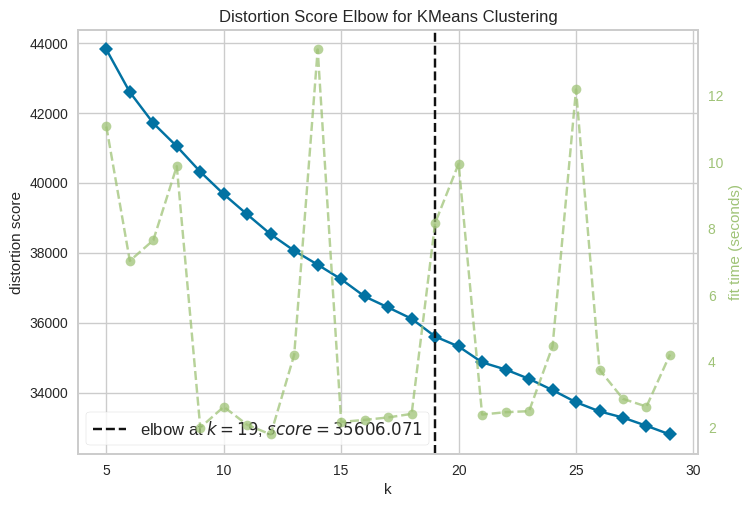

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=29, random_state=1), k=(5, 30))

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=1,  init='k-means++', max_iter=300), metric='distortion',  X = glove_embeddings, k=(5,30))

In [ ]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
NUM_CLUSTERS =  19
kmeans = KMeans(n_clusters=NUM_CLUSTERS, init='k-means++', max_iter=300, random_state=1)
kmeans.fit(glove_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=19, random_state=1)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(glove_embeddings, kmeans.labels_)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.08570700655829133


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Now, calculate the Davies-Bouldin score
dbs = davies_bouldin_score(glove_embeddings, kmeans.labels_)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 2.584389101128389


In [ ]:
df_cleaned['cluster'] = kmeans.labels_
df_cleaned.sort_values(by='cluster')

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
4347  2023-05-16  PipeFisher: Efficient Training of Large Langua...   
4359  2023-05-19  CIM: Constrained Intrinsic Motivation for Spar...   
4389  2023-03-22  Fine-Grained Selective Similarity Integration ...   
644   2020-09-23  Driving with Data in the Motor City: Mining an...   
...          ...                                                ...   
3950  2022-09-13  Bias Impact Analysis of AI in Consumer Mobile ...   
2268  2021-07-27  Context-aware Adversarial Training for Name Re...   
6338  2023-11-28  Domain Knowledge Injection in Bayesian Search ...   
5314  2023-06-16  I'm Afraid I Can't Do That: Predicting Prompt ...   
5864  2023-10-03  AfriSpeech-200: Pan-African Accented Speech Da...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
4347    Pipeline parallelism enables efficient train...   
4359    Intrinsic motivation is a promising explorat...   
4389    The discovery of drug-target interactions (D...   
644     The City of Detroit maintains an active flee...   
...                                                 ...   
3950    Today's large-scale algorithmic and automate...   
2268    In this work, we examine the ability of NER ...   
6338    In this paper we propose DKIBO, a Bayesian o...   
5314    Since the release of OpenAI's ChatGPT, gener...   
5864    Africa has a very low doctor-to-patient rati...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
4347  ['efficient', 'utilization', 'efficient', 'uti...   
4359  ['efficient', 'control', 'constrained', 'const...   
4389  ['efficient', 'availability', 'effective', 'fl...   
644   ['maintenance', 'variety', 'maintenance', 'mai...   
...                                                 ...   
3950  ['today', 'effectiveness', 'harmful', 'bias', ...   
2268  ['ability', 'carefully', 'bias', 'bias', 'outp...   
6338                ['belief', 'incorporating', 'bias']   
5314  ['attracted', 'usage', 'bias', 'induced', 'bia...   
5864                             ['commercial', 'bias']   

                                       abstract_nonstop  cluster  
0           efficient complexity efficiency scalability        0  
4347  efficient utilization efficient utilization im...        0  
4359  efficient control constrained constrained adap...        0  
4389  efficient availability effective flexible comp...        0  
644   maintenance variety maintenance maintenance ma...        0  
...                                                 ...      ...  
3950  today effectiveness harmful bias bias bias con...       18  
2268  ability carefully bias bias outperforming comp...       18  
6338                          belief incorporating bias       18  
5314  attracted usage bias induced bias harmful bias...       18  
5864                                    commercial bias       18  

[6489 rows x 6 columns]

In [ ]:
from collections import Counter

Counter(kmeans.labels_)

Counter({0: 236,
         12: 384,
         17: 719,
         8: 551,
         16: 247,
         1: 452,
         10: 204,
         15: 407,
         14: 329,
         3: 428,
         9: 306,
         11: 227,
         6: 197,
         5: 711,
         2: 374,
         13: 185,
         18: 176,
         4: 259,
         7: 97})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(kmeans.labels_):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-299-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-299-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-299-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-299-029a2783a871>:14: FutureWarning: The frame.append method is dep

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
efficient
--------------------------------------------------------------------------------
Cluster #1:
variety
--------------------------------------------------------------------------------
Cluster #2:
ability
--------------------------------------------------------------------------------
Cluster #3:
robustness
--------------------------------------------------------------------------------
Cluster #4:
expert
--------------------------------------------------------------------------------
Cluster #5:
diversity
--------------------------------------------------------------------------------
Cluster #6:
adaptation
--------------------------------------------------------------------------------
Cluster #7:
dependency
--------------------------------------------------------------------------------
Cluster #8:
explainable
--------------------------------------------------------------------------------
Cluster #9:
subtask
-------------------------------------------------------

In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['efficient']), (1, ['variety']), (2, ['ability']), (3, ['robustness']), (4, ['expert']), (5, ['diversity']), (6, ['adaptation']), (7, ['dependency']), (8, ['explainable']), (9, ['subtask']), (10, ['reasoning']), (11, ['quality']), (12, ['control']), (13, ['fairness']), (14, ['automatically']), (15, ['robust']), (16, ['effective']), (17, ['belief']), (18, ['bias'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['efficient', 'complexity', 'efficiency', 'sca...       [efficient]
1       1  ['efficient', 'variety', 'applicable', 'access...         [variety]
2       2  ['capable', 'coarsegrained', 'represented', 'c...         [ability]
3       3  ['arise', 'illustrate', 'effectiveness'] ['con...      [robustness]
4       4  ['privacy', 'sensitive', 'efficient', 'privacy...          [expert]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
4347  2023-05-16  PipeFisher: Efficient Training of Large Langua...   
4359  2023-05-19  CIM: Constrained Intrinsic Motivation for Spar...   
4389  2023-03-22  Fine-Grained Selective Similarity Integration ...   
644   2020-09-23  Driving with Data in the Motor City: Mining an...   

                                               abstract  cluster  
0       We introduce an efficient method for trainin...        0  
4347    Pipeline parallelism enables efficient train...        0  
4359    Intrinsic motivation is a promising explorat...        0  
4389    The discovery of drug-target interactions (D...        0  
644     The City of Detroit maintains an active flee...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_km_glove = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_km_glove.head()

update_date                                              title  \
0  2022-02-07  Training linear ranking SVMs in linearithmic t...   
1  2023-05-16  PipeFisher: Efficient Training of Large Langua...   
2  2023-05-19  CIM: Constrained Intrinsic Motivation for Spar...   
3  2023-03-22  Fine-Grained Selective Similarity Integration ...   
4  2020-09-23  Driving with Data in the Motor City: Mining an...   

                                            abstract cluster abstracts_related  
0    We introduce an efficient method for trainin...       0       [efficient]  
1    Pipeline parallelism enables efficient train...       0       [efficient]  
2    Intrinsic motivation is a promising explorat...       0       [efficient]  
3    The discovery of drug-target interactions (D...       0       [efficient]  
4    The City of Detroit maintains an active flee...       0       [efficient]

In [ ]:
# Save the DataFrame to a CSV file
#result_km_glove.to_csv('drive/MyDrive/Colab Notebooks/results/result_kmeans_glove.csv', index=False)

## Hierarchical Agglomerative Clustering

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484  ['adaptation', 'ability', 'effectiveness', 'ef...   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484          adaptation ability effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

In [ ]:
glove_embeddings = pd.read_csv('drive/MyDrive/Colab Notebooks/glove_embeddings.csv')
glove_embeddings.head()

0         1         2         3         4         5         6  \
0 -0.494740  0.064844  0.353020  0.550082  0.013947 -0.574200 -0.483100   
1 -0.000390  0.168842  0.392400  0.209906  0.004465  0.121282 -0.745460   
2 -0.228983  0.220308  0.490615  0.558180 -0.182432 -0.132465 -0.724085   
3 -0.063035  0.378037  0.440100 -0.250249  0.090277  0.002383  0.210321   
4 -0.054411 -0.018155 -0.105580  0.352050 -0.475700  0.116440 -0.547550   

          7         8         9  ...        90        91        92        93  \
0 -0.226647 -0.135718  0.804290  ...  0.055882 -0.087873 -0.274220 -0.054516   
1 -0.519880 -0.052886 -0.145114  ... -0.204722 -0.159614 -0.391849  0.206798   
2 -0.634315  0.128119  0.374602  ... -0.200917  0.197455 -0.337832  0.016525   
3 -0.418153 -0.284200  0.295617  ... -0.143591 -0.037450 -0.496230 -0.033787   
4  0.383640 -0.298680  0.297800  ... -0.277770 -0.058308  0.288410 -0.472330   

         94        95        96        97        98        99  
0  0.169662 -0.053945  0.075798 -0.811030  0.667715  0.429222  
1 -0.129137  0.344525 -0.335191 -1.096405  0.121148  0.623525  
2  0.384260  0.057205 -0.169904 -0.912878  0.594825  0.309293  
3  0.616863 -0.042360 -0.776347 -0.296245  0.150003  0.045129  
4  0.243350  0.354420 -0.172290 -0.555570  0.304300  0.560930  

[5 rows x 100 columns]

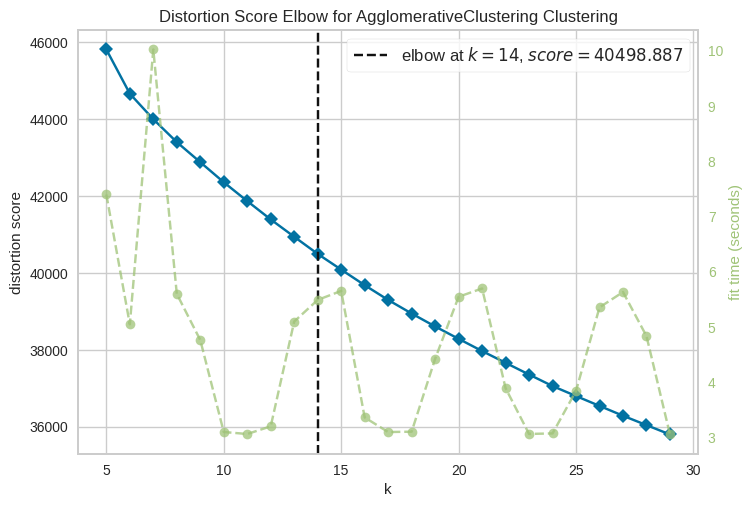

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=29), k=(5, 30))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(AgglomerativeClustering(linkage='ward'), metric='distortion',  X = glove_embeddings, k=(5,30))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

NUM_CLUSTERS = 14

agg_clustering = AgglomerativeClustering(n_clusters=NUM_CLUSTERS, linkage='ward')
cluster_labels = agg_clustering.fit_predict(glove_embeddings)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(glove_embeddings, cluster_labels)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.04066131849025482


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(glove_embeddings, cluster_labels)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 2.91121405659281


In [ ]:
df_cleaned['cluster'] = cluster_labels
df_cleaned.sort_values(by='cluster').head()

update_date                                              title  \
3244  2022-04-12  x-enVENT: A Corpus of Event Descriptions with ...   
4368  2022-11-29  Attack on Unfair ToS Clause Detection: A Case ...   
4369  2022-11-29  Automatically generating question-answer pairs...   
4376  2022-11-30  D\'ecouvrir de nouvelles classes dans des donn...   
1578  2021-02-02  Emotion and color in paintings: a novel tempor...   

                                               abstract  \
3244    Emotion classification is often formulated a...   
4368    Recent work has demonstrated that natural la...   
4369    This paper presents an evaluation of the qua...   
4376    In Novel Class Discovery (NCD), the goal is ...   
1578    As subjective artistic creations, artistic p...   

                                  abstract_nonstop_list  \
3244                            ['annotate', 'reveals']   
4368  ['consumer', 'protection', 'automatically', 'u...   
4369                       ['quality', 'automatically']   
4376                                     ['applicable']   
1578  ['expressed', 'expressed', 'emotional', 'assoc...   

                                       abstract_nonstop  cluster  
3244                                   annotate reveals        0  
4368  consumer protection automatically unfair consi...        0  
4369                              quality automatically        0  
4376                                         applicable        0  
1578          expressed expressed emotional association        0

In [ ]:
from collections import Counter

Counter(cluster_labels)

Counter({2: 1279,
         0: 1529,
         13: 309,
         8: 151,
         3: 454,
         4: 698,
         12: 128,
         9: 255,
         6: 282,
         11: 231,
         1: 481,
         10: 167,
         7: 204,
         5: 321})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(cluster_labels):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-315-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-315-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-315-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-315-dab1332a148f>:14: FutureWarning: The frame.append method is dep

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
effective
--------------------------------------------------------------------------------
Cluster #1:
ability
--------------------------------------------------------------------------------
Cluster #2:
robustness
--------------------------------------------------------------------------------
Cluster #3:
expert
--------------------------------------------------------------------------------
Cluster #4:
robust
--------------------------------------------------------------------------------
Cluster #5:
privacy
--------------------------------------------------------------------------------
Cluster #6:
quality
--------------------------------------------------------------------------------
Cluster #7:
fairness
--------------------------------------------------------------------------------
Cluster #8:
reasoning
--------------------------------------------------------------------------------
Cluster #9:
subtask
-----------------------------------------------------------------

In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['effective']), (1, ['ability']), (2, ['robustness']), (3, ['expert']), (4, ['robust']), (5, ['privacy']), (6, ['quality']), (7, ['fairness']), (8, ['reasoning']), (9, ['subtask']), (10, ['bias']), (11, ['adaptation']), (12, ['dependency']), (13, ['effective'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['sense', 'expressed'] ['efficient', 'variety'...       [effective]
1       1  ['capable', 'coarsegrained', 'represented', 'c...         [ability]
2       2  ['efficient', 'complexity', 'efficiency', 'sca...      [robustness]
3       3  ['sense', 'earlier', 'enhanced', 'earlier', 'f...          [expert]
4       4  ['efficiently', 'quite', 'coverage'] ['optimiz...          [robust]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
3244  2022-04-12  x-enVENT: A Corpus of Event Descriptions with ...   
4368  2022-11-29  Attack on Unfair ToS Clause Detection: A Case ...   
4369  2022-11-29  Automatically generating question-answer pairs...   
4376  2022-11-30  D\'ecouvrir de nouvelles classes dans des donn...   
1578  2021-02-02  Emotion and color in paintings: a novel tempor...   

                                               abstract  cluster  
3244    Emotion classification is often formulated a...        0  
4368    Recent work has demonstrated that natural la...        0  
4369    This paper presents an evaluation of the qua...        0  
4376    In Novel Class Discovery (NCD), the goal is ...        0  
1578    As subjective artistic creations, artistic p...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_agg_glove = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_agg_glove.head()

update_date                                              title  \
0  2022-04-12  x-enVENT: A Corpus of Event Descriptions with ...   
1  2022-11-29  Attack on Unfair ToS Clause Detection: A Case ...   
2  2022-11-29  Automatically generating question-answer pairs...   
3  2022-11-30  D\'ecouvrir de nouvelles classes dans des donn...   
4  2021-02-02  Emotion and color in paintings: a novel tempor...   

                                            abstract cluster abstracts_related  
0    Emotion classification is often formulated a...       0       [effective]  
1    Recent work has demonstrated that natural la...       0       [effective]  
2    This paper presents an evaluation of the qua...       0       [effective]  
3    In Novel Class Discovery (NCD), the goal is ...       0       [effective]  
4    As subjective artistic creations, artistic p...       0       [effective]

In [ ]:
# Save the DataFrame to a CSV file
#result_agg_glove.to_csv('drive/MyDrive/Colab Notebooks/results/result_agglomerative_glove.csv', index=False)

## K-Medoids Clustering

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484  ['adaptation', 'ability', 'effectiveness', 'ef...   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484          adaptation ability effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

In [ ]:
glove_embeddings = pd.read_csv('drive/MyDrive/Colab Notebooks/glove_embeddings.csv')
glove_embeddings.head()

0         1         2         3         4         5         6  \
0 -0.494740  0.064844  0.353020  0.550082  0.013947 -0.574200 -0.483100   
1 -0.000390  0.168842  0.392400  0.209906  0.004465  0.121282 -0.745460   
2 -0.228983  0.220308  0.490615  0.558180 -0.182432 -0.132465 -0.724085   
3 -0.063035  0.378037  0.440100 -0.250249  0.090277  0.002383  0.210321   
4 -0.054411 -0.018155 -0.105580  0.352050 -0.475700  0.116440 -0.547550   

          7         8         9  ...        90        91        92        93  \
0 -0.226647 -0.135718  0.804290  ...  0.055882 -0.087873 -0.274220 -0.054516   
1 -0.519880 -0.052886 -0.145114  ... -0.204722 -0.159614 -0.391849  0.206798   
2 -0.634315  0.128119  0.374602  ... -0.200917  0.197455 -0.337832  0.016525   
3 -0.418153 -0.284200  0.295617  ... -0.143591 -0.037450 -0.496230 -0.033787   
4  0.383640 -0.298680  0.297800  ... -0.277770 -0.058308  0.288410 -0.472330   

         94        95        96        97        98        99  
0  0.169662 -0.053945  0.075798 -0.811030  0.667715  0.429222  
1 -0.129137  0.344525 -0.335191 -1.096405  0.121148  0.623525  
2  0.384260  0.057205 -0.169904 -0.912878  0.594825  0.309293  
3  0.616863 -0.042360 -0.776347 -0.296245  0.150003  0.045129  
4  0.243350  0.354420 -0.172290 -0.555570  0.304300  0.560930  

[5 rows x 100 columns]

In [ ]:
!pip install scikit-learn-extra

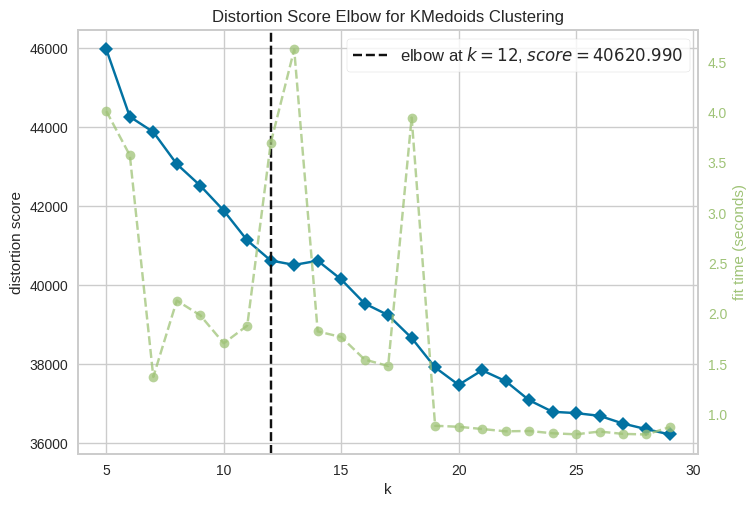

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMedoids(init='k-medoids++', n_clusters=29,
                                    random_state=1),
                 k=(5, 30))

In [ ]:
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(KMedoids(random_state=1, init = 'k-medoids++', max_iter=300), metric='distortion',  X = glove_embeddings, k=(5,30))

In [ ]:
from sklearn_extra.cluster import KMedoids

NUM_CLUSTERS = 12
kmedoids = KMedoids(n_clusters=NUM_CLUSTERS, random_state=1, max_iter=300, init = 'k-medoids++')
kmedoids.fit(glove_embeddings)

KMedoids(init='k-medoids++', n_clusters=12, random_state=1)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(glove_embeddings, kmedoids.labels_)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.06719137125244183


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(glove_embeddings, kmedoids.labels_)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 2.80948600187976


In [ ]:
df_cleaned['cluster'] = kmedoids.labels_
df_cleaned.sort_values(by='cluster')

update_date                                              title  \
3782  2022-07-27  Training Effective Neural Sentence Encoders fr...   
1374  2020-12-02  Obtain Employee Turnover Rate and Optimal Redu...   
4337  2023-02-24  Converge to the Truth: Factual Error Correctio...   
2393  2022-02-22  Using a one dimensional parabolic model of the...   
4643  2023-02-07  Leveraging AI to improve human planning in lar...   
...          ...                                                ...   
578   2019-12-10  Explaining Sequence-Level Knowledge Distillati...   
2441  2021-09-14  Low-Resource Dialogue Summarization with Domai...   
4286  2023-01-25  A comparison of several AI techniques for auth...   
2424  2021-09-08  Early ICU Mortality Prediction and Survival An...   
3244  2022-04-12  x-enVENT: A Corpus of Event Descriptions with ...   

                                               abstract  \
3782    Sentence embeddings are commonly used in tex...   
1374    Nowadays, human resource is an important par...   
4337    Given a possibly false claim sentence, how c...   
2393    A fundamental challenge in Deep Learning is ...   
4643    AI can not only outperform people in many pl...   
...                                                 ...   
578     Sequence-level knowledge distillation (SLKD)...   
2441    With the rapid increase in the volume of dia...   
4286    Determining the author of a text is a diffic...   
2424    Respiratory failure is the one of major caus...   
3244    Emotion classification is often formulated a...   

                               abstract_nonstop_list  \
3782                  ['effective', 'automatically']   
1374  ['highquality', 'automatically', 'efficiency']   
4337    ['automatically', 'carefully', 'concerning']   
2393  ['automatically', 'appropriate', 'applicable']   
4643                               ['automatically']   
...                                              ...   
578                                               []   
2441                                              []   
4286                                 ['classifying']   
2424                                              []   
3244                         ['annotate', 'reveals']   

                          abstract_nonstop  cluster  
3782               effective automatically        0  
1374  highquality automatically efficiency        0  
4337    automatically carefully concerning        0  
2393  automatically appropriate applicable        0  
4643                         automatically        0  
...                                    ...      ...  
578                                    NaN       11  
2441                                   NaN       11  
4286                           classifying       11  
2424                                   NaN       11  
3244                      annotate reveals       11  

[6489 rows x 6 columns]

In [ ]:
from collections import Counter

Counter(kmedoids.labels_)

Counter({4: 764,
         3: 713,
         10: 1266,
         1: 300,
         8: 366,
         7: 1790,
         2: 261,
         11: 373,
         9: 266,
         5: 302,
         0: 60,
         6: 28})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(kmedoids.labels_):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-329-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-329-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-329-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-329-fa8c0dc2d201>:14: FutureWarning: The frame.append method is dep

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
automatically
--------------------------------------------------------------------------------
Cluster #1:
quality
--------------------------------------------------------------------------------
Cluster #2:
robustness
--------------------------------------------------------------------------------
Cluster #3:
fairness
--------------------------------------------------------------------------------
Cluster #4:
explainable
--------------------------------------------------------------------------------
Cluster #5:
bias
--------------------------------------------------------------------------------
Cluster #6:
largest
--------------------------------------------------------------------------------
Cluster #7:
effective
--------------------------------------------------------------------------------
Cluster #8:
reasoning
--------------------------------------------------------------------------------
Cluster #9:
adaptation
-----------------------------------------------------

In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['automatically']), (1, ['quality']), (2, ['robustness']), (3, ['fairness']), (4, ['explainable']), (5, ['bias']), (6, ['largest']), (7, ['effective']), (8, ['reasoning']), (9, ['adaptation']), (10, ['expert']), (11, ['subtask'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['automatically', 'control', 'comparable'] ['a...   [automatically]
1       1  ['appropriate'] ['consistency', 'sense', 'cons...         [quality]
2       2  ['arise', 'illustrate', 'effectiveness'] ['val...      [robustness]
3       3  ['sense', 'expressed'] ['automatically', 'limi...        [fairness]
4       4  ['efficient', 'complexity', 'efficiency', 'sca...     [explainable]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
3782  2022-07-27  Training Effective Neural Sentence Encoders fr...   
1374  2020-12-02  Obtain Employee Turnover Rate and Optimal Redu...   
4337  2023-02-24  Converge to the Truth: Factual Error Correctio...   
2393  2022-02-22  Using a one dimensional parabolic model of the...   
4643  2023-02-07  Leveraging AI to improve human planning in lar...   

                                               abstract  cluster  
3782    Sentence embeddings are commonly used in tex...        0  
1374    Nowadays, human resource is an important par...        0  
4337    Given a possibly false claim sentence, how c...        0  
2393    A fundamental challenge in Deep Learning is ...        0  
4643    AI can not only outperform people in many pl...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_kmd_glove = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_kmd_glove.head()

update_date                                              title  \
0  2022-07-27  Training Effective Neural Sentence Encoders fr...   
1  2020-12-02  Obtain Employee Turnover Rate and Optimal Redu...   
2  2023-02-24  Converge to the Truth: Factual Error Correctio...   
3  2022-02-22  Using a one dimensional parabolic model of the...   
4  2023-02-07  Leveraging AI to improve human planning in lar...   

                                            abstract cluster abstracts_related  
0    Sentence embeddings are commonly used in tex...       0   [automatically]  
1    Nowadays, human resource is an important par...       0   [automatically]  
2    Given a possibly false claim sentence, how c...       0   [automatically]  
3    A fundamental challenge in Deep Learning is ...       0   [automatically]  
4    AI can not only outperform people in many pl...       0   [automatically]

In [ ]:
# Save the DataFrame to a CSV file
#result_kmd_glove.to_csv('drive/MyDrive/Colab Notebooks/results/result_kmedoids_glove.csv', index=False)

# fastText

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484        ['adaptation', 'effectiveness', 'efficacy']   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484                  adaptation effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

In [ ]:
from gensim.models import FastText

# Check for missing values and replace them with an empty string or some appropriate value
df_cleaned['abstract_nonstop'] = df_cleaned['abstract_nonstop'].fillna('')

# Tokenization (assuming text is already preprocessed and tokenized)
tokenized_abstracts = df_cleaned['abstract_nonstop'].apply(lambda x: x.split() if isinstance(x, str) else [])

# Embedding
fasttext_model = FastText(sentences=tokenized_abstracts, vector_size=300, window=5, min_count=1, workers=4)

In [ ]:
# Function to calculate average word vector for each abstract
def average_word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.
    for word in words:
        if word in model.wv.key_to_index:
            nwords = nwords + 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

# Calculate average word vectors for each abstract
fasttext_array = np.array([average_word_vectors(words, fasttext_model, fasttext_model.vector_size) for words in tokenized_abstracts])

## K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

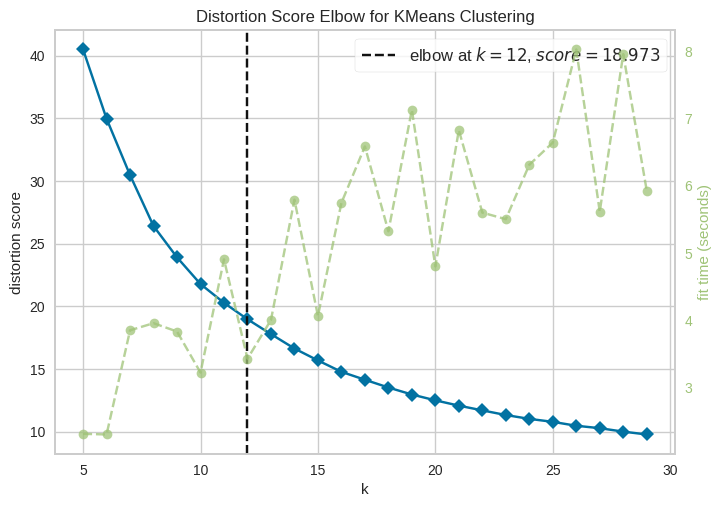

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=29, random_state=1), k=(5, 30))

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=1,  init='k-means++', max_iter=300), metric='distortion',  X = fasttext_array, k=(5,30))

In [ ]:
from sklearn.cluster import KMeans
# Perform KMeans clustering
NUM_CLUSTERS =  12
kmeans = KMeans(n_clusters=NUM_CLUSTERS, init='k-means++', max_iter=300, random_state=1)
kmeans.fit(fasttext_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=12, random_state=1)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(fasttext_array, kmeans.labels_)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.28474396048311873


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(fasttext_array, kmeans.labels_)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 0.8862814071311901


In [ ]:
df_cleaned['cluster'] = kmeans.labels_
df_cleaned.sort_values(by='cluster')

update_date                                              title  \
4715  2023-02-22  Label Information Enhanced Fraud Detection aga...   
1526  2021-01-18  A Ternary Bi-Directional LSTM Classification f...   
4615  2023-02-02  Multimodality Representation Learning: A Surve...   
4617  2023-09-25  Two for One: Diffusion Models and Force Fields...   
4618  2023-06-28       GFlowNets for AI-Driven Scientific Discovery   
...          ...                                                ...   
1535  2021-01-19  Analysis of key flavors of event-driven predic...   
6067  2023-10-25  Mid-Long Term Daily Electricity Consumption Fo...   
2036  2021-06-02  Analysis and classification of main risk facto...   
2956  2022-06-15  KIND: an Italian Multi-Domain Dataset for Name...   
2896  2021-12-23  Explanation Container in Case-Based Biomedical...   

                                               abstract  \
4715    Node classification is a substantial problem...   
1526    Functional near-infrared spectroscopy (fNIRS...   
4615    Multimodality Representation Learning, as a ...   
4617    Coarse-grained (CG) molecular dynamics enabl...   
4618    Tackling the most pressing problems for huma...   
...                                                 ...   
1535    This work explores two approaches to event-d...   
6067    Daily electricity consumption forecasting is...   
2036    In China, stroke is the first leading cause ...   
2956    In this paper we present KIND, an Italian da...   
2896    The National Center for Advancing Translatio...   

                                  abstract_nonstop_list  \
4715  ['enhance', 'utilization', 'proved', 'effectiv...   
1526                     ['functional', 'considerably']   
4615  ['variety', 'reasoning', 'retrieve', 'comprehe...   
4617      ['coarsegrained', 'resolution', 'accurately']   
4618  ['pandemic', 'efficient', 'efficient', 'valuab...   
...                                                 ...   
1535                                           ['date']   
6067                                           ['date']   
2036          ['national', 'national', 'interpretable']   
2956                                          ['cover']   
2896                                       ['national']   

                                       abstract_nonstop  cluster  
4715  enhance utilization proved effective enhanced ...        0  
1526                            functional considerably        0  
4615  variety reasoning retrieve comprehensive enhan...        0  
4617                coarsegrained resolution accurately        0  
4618              pandemic efficient efficient valuable        0  
...                                                 ...      ...  
1535                                               date       11  
6067                                               date       11  
2036                    national national interpretable       11  
2956                                              cover       11  
2896                                           national       11  

[6489 rows x 6 columns]

In [ ]:
from collections import Counter

Counter(kmeans.labels_)

Counter({4: 1859,
         5: 384,
         0: 1227,
         9: 1207,
         7: 336,
         1: 246,
         8: 586,
         10: 109,
         2: 302,
         3: 85,
         6: 107,
         11: 41})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(kmeans.labels_):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-71-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-71-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-71-029a2783a871>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-71-029a2783a871>:14: FutureWarning: The frame.append method is depreca

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
quality
--------------------------------------------------------------------------------
Cluster #1:
not related
--------------------------------------------------------------------------------
Cluster #2:
bias
--------------------------------------------------------------------------------
Cluster #3:
fairness
--------------------------------------------------------------------------------
Cluster #4:
effective
--------------------------------------------------------------------------------
Cluster #5:
sustainable
--------------------------------------------------------------------------------
Cluster #6:
bias
--------------------------------------------------------------------------------
Cluster #7:
robust
--------------------------------------------------------------------------------
Cluster #8:
explainability
--------------------------------------------------------------------------------
Cluster #9:
reasoning
----------------------------------------------------------

In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['quality']), (1, ['not related']), (2, ['bias']), (3, ['fairness']), (4, ['effective']), (5, ['sustainable']), (6, ['bias']), (7, ['robust']), (8, ['explainability']), (9, ['reasoning']), (10, ['fairness']), (11, ['food'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['appropriate'] ['sense', 'earlier', 'enhanced...         [quality]
1       1  [] [] [] [] [] [] [] [] [] [] [] [] [] [] [] [...     [not related]
2       2  ['today', 'video', 'bias', 'bias', 'biased', '...            [bias]
3       3  ['sensitive', 'fair', 'fairness'] ['fairness',...        [fairness]
4       4  ['efficient', 'complexity', 'efficiency', 'sca...       [effective]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
4715  2023-02-22  Label Information Enhanced Fraud Detection aga...   
1526  2021-01-18  A Ternary Bi-Directional LSTM Classification f...   
4615  2023-02-02  Multimodality Representation Learning: A Surve...   
4617  2023-09-25  Two for One: Diffusion Models and Force Fields...   
4618  2023-06-28       GFlowNets for AI-Driven Scientific Discovery   

                                               abstract  cluster  
4715    Node classification is a substantial problem...        0  
1526    Functional near-infrared spectroscopy (fNIRS...        0  
4615    Multimodality Representation Learning, as a ...        0  
4617    Coarse-grained (CG) molecular dynamics enabl...        0  
4618    Tackling the most pressing problems for huma...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_km_fasttext = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_km_fasttext.head()

update_date                                              title  \
0  2023-02-22  Label Information Enhanced Fraud Detection aga...   
1  2021-01-18  A Ternary Bi-Directional LSTM Classification f...   
2  2023-02-02  Multimodality Representation Learning: A Surve...   
3  2023-09-25  Two for One: Diffusion Models and Force Fields...   
4  2023-06-28       GFlowNets for AI-Driven Scientific Discovery   

                                            abstract cluster abstracts_related  
0    Node classification is a substantial problem...       0         [quality]  
1    Functional near-infrared spectroscopy (fNIRS...       0         [quality]  
2    Multimodality Representation Learning, as a ...       0         [quality]  
3    Coarse-grained (CG) molecular dynamics enabl...       0         [quality]  
4    Tackling the most pressing problems for huma...       0         [quality]

In [ ]:
# Save the DataFrame to a CSV file
#result_km_fasttext.to_csv('drive/MyDrive/Colab Notebooks/results/result_kmeans_fasttext.csv', index=False)

## Hierarchical Agglomerative Clustering

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484        ['adaptation', 'effectiveness', 'efficacy']   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484                  adaptation effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

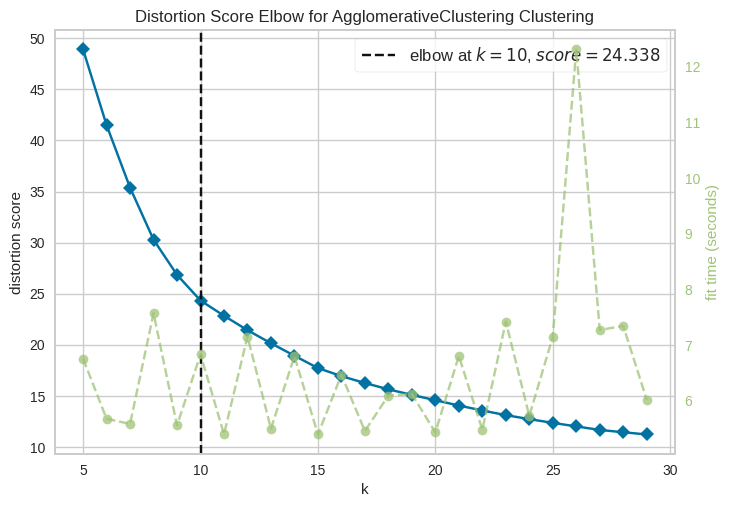

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=29), k=(5, 30))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(AgglomerativeClustering(linkage='ward'), metric='distortion',  X = fasttext_array, k=(5,30))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

NUM_CLUSTERS = 10

agg_clustering = AgglomerativeClustering(n_clusters=NUM_CLUSTERS, linkage='ward')
cluster_labels = agg_clustering.fit_predict(fasttext_array)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(fasttext_array, cluster_labels)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.2430185154726031


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(fasttext_array, cluster_labels)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 0.9755783521385432


In [ ]:
df_cleaned['cluster'] = cluster_labels
df_cleaned.sort_values(by='cluster').head()

update_date                                              title  \
840   2020-05-22  Stance Prediction and Claim Verification: An A...   
4979  2023-05-01  Enhancing Supply Chain Resilience: A Machine L...   
6254  2023-11-17  LEEETs-Dial: Linguistic Entrainment in End-to-...   
2015  2021-05-31  OTTers: One-turn Topic Transitions for Open-Do...   
3062  2022-02-08  Knowledge-Integrated Informed AI for National ...   

                                               abstract  \
840     This work explores the application of textua...   
4979    The COVID 19 pandemic and ongoing political ...   
6254    Linguistic entrainment, or alignment, repres...   
2015    Mixed initiative in open-domain dialogue req...   
3062    The state of artificial intelligence technol...   

                                  abstract_nonstop_list  \
840            ['stance', 'stance', 'stance', 'stance']   
4979  ['pandemic', 'ongoing', 'international', 'avai...   
6254                                    ['utilization']   
2015                                       ['coherent']   
3062  ['date', 'today', 'date', 'solely', 'national'...   

                                       abstract_nonstop  cluster  
840                         stance stance stance stance        0  
4979  pandemic ongoing international availability da...        0  
6254                                        utilization        0  
2015                                           coherent        0  
3062  date today date solely national security thoro...        0

In [ ]:
from collections import Counter

Counter(cluster_labels)

Counter({6: 1567,
         0: 220,
         3: 1679,
         9: 787,
         2: 660,
         1: 449,
         7: 246,
         4: 622,
         5: 154,
         8: 105})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(cluster_labels):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-90-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-90-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-90-dab1332a148f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-90-dab1332a148f>:14: FutureWarning: The frame.append method is depreca

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
food
--------------------------------------------------------------------------------
Cluster #1:
robustness
--------------------------------------------------------------------------------
Cluster #2:
reasoning
--------------------------------------------------------------------------------
Cluster #3:
adaptation
--------------------------------------------------------------------------------
Cluster #4:
explainability
--------------------------------------------------------------------------------
Cluster #5:
fairness
--------------------------------------------------------------------------------
Cluster #6:
quality
--------------------------------------------------------------------------------
Cluster #7:
not related
--------------------------------------------------------------------------------
Cluster #8:
bias
--------------------------------------------------------------------------------
Cluster #9:
efficient
-------------------------------------------------------

In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['food']), (1, ['robustness']), (2, ['reasoning']), (3, ['adaptation']), (4, ['explainability']), (5, ['fairness']), (6, ['quality']), (7, ['not related']), (8, ['bias']), (9, ['efficient'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['sense', 'expressed'] ['reality', 'efficient'...            [food]
1       1  ['arise', 'illustrate', 'effectiveness'] ['sol...      [robustness]
2       2  ['realistic', 'reasoning'] ['inductive', 'weak...       [reasoning]
3       3  ['weak', 'dealing', 'complexity', 'complexity'...      [adaptation]
4       4  ['suitable', 'comparable'] ['automatically', '...  [explainability]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
840   2020-05-22  Stance Prediction and Claim Verification: An A...   
4979  2023-05-01  Enhancing Supply Chain Resilience: A Machine L...   
6254  2023-11-17  LEEETs-Dial: Linguistic Entrainment in End-to-...   
2015  2021-05-31  OTTers: One-turn Topic Transitions for Open-Do...   
3062  2022-02-08  Knowledge-Integrated Informed AI for National ...   

                                               abstract  cluster  
840     This work explores the application of textua...        0  
4979    The COVID 19 pandemic and ongoing political ...        0  
6254    Linguistic entrainment, or alignment, repres...        0  
2015    Mixed initiative in open-domain dialogue req...        0  
3062    The state of artificial intelligence technol...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_agg_fasttext = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_agg_fasttext.head()

update_date                                              title  \
0  2020-05-22  Stance Prediction and Claim Verification: An A...   
1  2023-05-01  Enhancing Supply Chain Resilience: A Machine L...   
2  2023-11-17  LEEETs-Dial: Linguistic Entrainment in End-to-...   
3  2021-05-31  OTTers: One-turn Topic Transitions for Open-Do...   
4  2022-02-08  Knowledge-Integrated Informed AI for National ...   

                                            abstract cluster abstracts_related  
0    This work explores the application of textua...       0            [food]  
1    The COVID 19 pandemic and ongoing political ...       0            [food]  
2    Linguistic entrainment, or alignment, repres...       0            [food]  
3    Mixed initiative in open-domain dialogue req...       0            [food]  
4    The state of artificial intelligence technol...       0            [food]

In [ ]:
# Save the DataFrame to a CSV file
#result_agg_fasttext.to_csv('drive/MyDrive/Colab Notebooks/results/result_agglomerative_fasttext.csv', index=False)

## K-Medoids Clustering

In [ ]:
df_cleaned = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_ai_ethics.csv')
df_cleaned

update_date                                              title  \
0     2022-02-07  Training linear ranking SVMs in linearithmic t...   
1     2019-07-11  Recognizability of Individual Creative Style W...   
2     2021-04-12  Uncertainty in Soft Temporal Constraint Proble...   
3     2023-11-13  Get my pizza right: Repairing missing is-a rel...   
4     2021-07-01  Learning Bayesian Networks: A Unification for ...   
...          ...                                                ...   
6484  2023-12-27  EcomGPT-CT: Continual Pre-training of E-commer...   
6485  2023-12-27  Small Effect Sizes in Malware Detection? Make ...   
6486  2023-12-27  BalMCTS: Balancing Objective Function and Sear...   
6487  2023-12-27  A Logically Consistent Chain-of-Thought Approa...   
6488  2023-12-29  OmniDialog: An Omnipotent Pre-training Model f...   

                                               abstract  \
0       We introduce an efficient method for trainin...   
1       It is hypothesized that creativity arises fr...   
2       In real-life temporal scenarios, uncertainty...   
3       With the increased use of ontologies in sema...   
4       We examine Bayesian methods for learning Bay...   
...                                                 ...   
6484    Large Language Models (LLMs) pre-trained on ...   
6485    Industry practitioners care about small impr...   
6486    Constraint Optimization Problems (COP) pose ...   
6487    Zero-shot stance detection (ZSSD) aims to de...   
6488    Pre-trained conversation models (PCMs) have ...   

                                  abstract_nonstop_list  \
0     ['efficient', 'complexity', 'efficiency', 'sca...   
1                                ['sense', 'expressed']   
2       ['weak', 'dealing', 'complexity', 'complexity']   
3            ['taxonomy', 'represented', 'terminology']   
4                                       ['appropriate']   
...                                                 ...   
6484        ['adaptation', 'effectiveness', 'efficacy']   
6485           ['devise', 'effective', 'sophisticated']   
6486  ['combinatorial', 'maintaining', 'effectivenes...   
6487  ['stance', 'stance', 'incorporating', 'enhance...   
6488                ['enhanced', 'drawing', 'efficacy']   

                                       abstract_nonstop  
0           efficient complexity efficiency scalability  
1                                       sense expressed  
2                    weak dealing complexity complexity  
3                      taxonomy represented terminology  
4                                           appropriate  
...                                                 ...  
6484                  adaptation effectiveness efficacy  
6485                     devise effective sophisticated  
6486  combinatorial maintaining effectiveness effect...  
6487  stance stance incorporating enhance transferab...  
6488                          enhanced drawing efficacy  

[6489 rows x 5 columns]

In [ ]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.8 MB/s eta 0:00:00


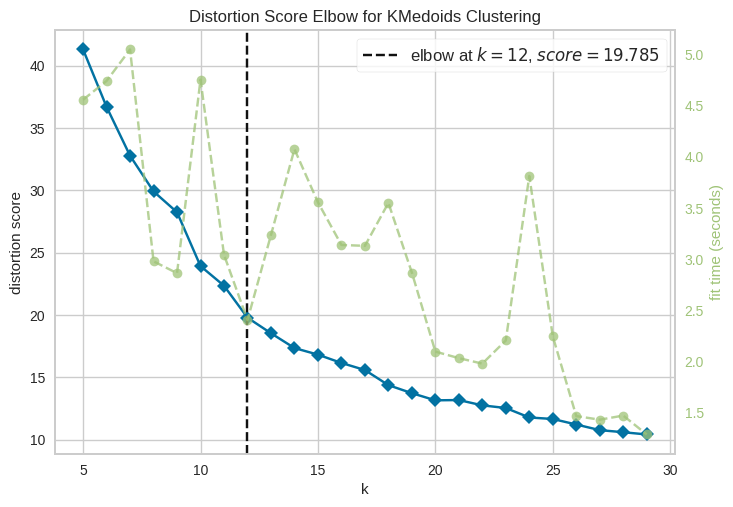

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMedoids(init='k-medoids++', n_clusters=29,
                                    random_state=1),
                 k=(5, 30))

In [ ]:
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(KMedoids(random_state=1, init = 'k-medoids++', max_iter=300), metric='distortion',  X = fasttext_array, k=(5,30))

In [ ]:
from sklearn_extra.cluster import KMedoids

NUM_CLUSTERS = 12
kmedoids = KMedoids(n_clusters=NUM_CLUSTERS, random_state=1, max_iter=300, init = 'k-medoids++')
kmedoids.fit(fasttext_array)

KMedoids(init='k-medoids++', n_clusters=12, random_state=1)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(fasttext_array, kmedoids.labels_)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.271238968304494


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(fasttext_array, kmedoids.labels_)
print("Davies-Bouldin Index:", dbs)

Davies-Bouldin Index: 0.9420801393212398


In [ ]:
df_cleaned['cluster'] = kmedoids.labels_
df_cleaned.sort_values(by='cluster')

update_date                                              title  \
5763  2023-09-14  An Empirical Analysis of Racial Categories in ...   
4832  2023-03-28  Using Simple Incentives to Improve Two-Sided F...   
2438  2021-09-10  Attributing Fair Decisions with Attention Inte...   
4101  2022-10-12  Are Pretrained Multilingual Models Equally Fai...   
2651  2021-10-12  Using Edge Cases to Disentangle Fairness and S...   
...          ...                                                ...   
378   2019-08-14  Improving Generalization in Coreference Resolu...   
1681  2021-03-02  Dados Abertos Governamentais no contexto de Po...   
3485  2022-05-17  PathologyBERT -- Pre-trained Vs. A New Transfo...   
3177  2022-07-20  Survival Prediction of Brain Cancer with Incom...   
5711  2023-08-29  ASCAPE: An open AI ecosystem to support the qu...   

                                               abstract  \
5763    Recent work in algorithmic fairness has high...   
4832    State-of-the-art order dispatching algorithm...   
2438    The widespread use of Artificial Intelligenc...   
4101    Pretrained multilingual language models can ...   
2651    Principles of fairness and solidarity in AI ...   
...                                                 ...   
378     In order for coreference resolution systems ...   
1681    There are many initiatives of transparency r...   
3485    Pathology text mining is a challenging task ...   
3177    Integrating cross-department multi-modal dat...   
5711    The latest cancer statistics indicate a decr...   

                                  abstract_nonstop_list  \
5763  ['fairness', 'drawing', 'discrimination', 'app...   
4832  ['optimizing', 'solely', 'efficiency', 'inequa...   
2438  ['fairness', 'fairness', 'rationale', 'underst...   
4101  ['highquality', 'consistency', 'societal', 'fa...   
2651  ['fairness', 'appear', 'reveal', 'fairness', '...   
...                                                 ...   
378                                      ['resolution']   
1681  ['transparency', 'reveals', 'governance', 'nat...   
3485  ['cancer', 'cancer', 'maintaining', 'terminolo...   
3177  ['cancer', 'date', 'expert', 'cancer', 'effect...   
5711  ['cancer', 'cancer', 'cancer', 'quality', 'pri...   

                                       abstract_nonstop  cluster  
5763  fairness drawing discrimination appear fairnes...        0  
4832  optimizing solely efficiency inequality inequa...        0  
2438  fairness fairness rationale understood fair re...        0  
4101  highquality consistency societal fairness fair...        0  
2651    fairness appear reveal fairness fairness deeper        0  
...                                                 ...      ...  
378                                          resolution       14  
1681  transparency reveals governance national inter...       14  
3485  cancer cancer maintaining terminology comprehe...       14  
3177  cancer date expert cancer effectively cancer o...       14  
5711               cancer cancer cancer quality private       14  

[6489 rows x 6 columns]

In [ ]:
from collections import Counter

Counter(kmedoids.labels_)

Counter({3: 857,
         14: 125,
         8: 1153,
         6: 1058,
         4: 458,
         1: 467,
         10: 459,
         2: 222,
         13: 555,
         5: 229,
         0: 108,
         12: 100,
         7: 172,
         9: 126,
         11: 400})

In [ ]:
# Initialize an empty dictionary to store abstract lists for each cluster
cluster_abstracts = {i: [] for i in range(NUM_CLUSTERS)}  # Assuming NUM_CLUSTERS is defined

# Loop through each abstract list and assign it to the corresponding cluster
for i, cluster_label in enumerate(kmedoids.labels_):
    cluster_abstracts[cluster_label].append(df_cleaned['abstract_nonstop_list'].iloc[i])

# Create a new DataFrame to store joined abstract lists for each cluster
cluster_abstracts_df = pd.DataFrame(columns=['cluster', 'joined_abstracts'])

# Populate the new DataFrame with joined abstract lists for each cluster
for cluster_num, abstract_list in cluster_abstracts.items():
    joined_abstracts = ' '.join(abstract_list)
    cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)

<ipython-input-416-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-416-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-416-fa8c0dc2d201>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_abstracts_df = cluster_abstracts_df.append({'cluster': cluster_num, 'joined_abstracts': joined_abstracts}, ignore_index=True)
<ipython-input-416-fa8c0dc2d201>:14: FutureWarning: The frame.append method is dep

In [ ]:
from collections import Counter
import re

# Initialize an empty dictionary to store sorted word counts for each cluster
cluster_sorted_word_counts = {}

# Tokenize and count words for each cluster
for cluster_num in range(NUM_CLUSTERS):
    # Get joined abstracts for the current cluster
    joined_abstracts = cluster_abstracts_df.loc[cluster_abstracts_df['cluster'] == cluster_num, 'joined_abstracts'].values[0]

    # Tokenize the joined abstracts and count the occurrences of each token
    words = re.findall(r'\b\w+\b', joined_abstracts.lower())  # Tokenization using regex
    word_counts = Counter(words)

    # Sort the word counts by frequency
    sorted_word_counts = word_counts.most_common(1)

    # Check if sorted_word_counts is empty (no words found)
    if not sorted_word_counts:
        # If the list is empty, assign 'not related' to sorted_word_counts
        sorted_word_counts = [('not related', 0)]

    # Store the sorted word counts for the current cluster
    cluster_sorted_word_counts[cluster_num] = sorted_word_counts

# Print the top 1 word counts for each cluster
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    print(f'Cluster #{cluster_num}:')
    for word, count in sorted_word_counts:
        print(f'{word}')
    print('-' * 80)

Cluster #0:
fairness
--------------------------------------------------------------------------------
Cluster #1:
governance
--------------------------------------------------------------------------------
Cluster #2:
not related
--------------------------------------------------------------------------------
Cluster #3:
quality
--------------------------------------------------------------------------------
Cluster #4:
reasoning
--------------------------------------------------------------------------------
Cluster #5:
adaptation
--------------------------------------------------------------------------------
Cluster #6:
effective
--------------------------------------------------------------------------------
Cluster #7:
ability
--------------------------------------------------------------------------------
Cluster #8:
effective
--------------------------------------------------------------------------------
Cluster #9:
bias
---------------------------------------------------------

In [ ]:
top_words_per_cluster = []

# Iterate through the cluster_sorted_word_counts dictionary
for cluster_num, sorted_word_counts in cluster_sorted_word_counts.items():
    cluster_words = []

    # Iterate through the sorted word counts for each cluster
    for word, _ in sorted_word_counts:
        cluster_words.append(word)

    # Append the cluster number and its top words to the list
    top_words_per_cluster.append((cluster_num, cluster_words))

# Print the top words list
print(top_words_per_cluster)

[(0, ['fairness']), (1, ['governance']), (2, ['not related']), (3, ['quality']), (4, ['reasoning']), (5, ['adaptation']), (6, ['effective']), (7, ['ability']), (8, ['effective']), (9, ['bias']), (10, ['robust']), (11, ['explainability']), (12, ['fairness']), (13, ['robustness']), (14, ['cancer'])]


In [ ]:
# Initialize a dictionary to store top words and counts for each cluster
top_words_counts_dict = {cluster_num: top_words_counts for cluster_num, top_words_counts in top_words_per_cluster}

# Update the 'Top_Words_Counts' column in cluster_abstracts_df using the dictionary
cluster_abstracts_df['abstracts_related'] = cluster_abstracts_df['cluster'].map(top_words_counts_dict)

# Print the updated cluster_abstracts_df with the top words and counts mapped
cluster_abstracts_df.head()

cluster                                   joined_abstracts abstracts_related
0       0  ['fair', 'fairness', 'discrimination', 'discri...        [fairness]
1       1  ['sense', 'earlier', 'enhanced', 'earlier', 'f...      [governance]
2       2  [] [] [] [] [] [] [] [] [] [] [] [] [] [] [] [...     [not related]
3       3  ['efficient', 'complexity', 'efficiency', 'sca...         [quality]
4       4  ['realistic', 'reasoning'] ['reasoning', 'reas...       [reasoning]

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
5763  2023-09-14  An Empirical Analysis of Racial Categories in ...   
4832  2023-03-28  Using Simple Incentives to Improve Two-Sided F...   
2438  2021-09-10  Attributing Fair Decisions with Attention Inte...   
4101  2022-10-12  Are Pretrained Multilingual Models Equally Fai...   
2651  2021-10-12  Using Edge Cases to Disentangle Fairness and S...   

                                               abstract  cluster  
5763    Recent work in algorithmic fairness has high...        0  
4832    State-of-the-art order dispatching algorithm...        0  
2438    The widespread use of Artificial Intelligenc...        0  
4101    Pretrained multilingual language models can ...        0  
2651    Principles of fairness and solidarity in AI ...        0

In [ ]:
abstract_clusters = df_cleaned[['update_date', 'title', 'abstract', 'cluster']].sort_values(by=['cluster'],ascending=True)
abstract_clusters.head()

update_date                                              title  \
5763  2023-09-14  An Empirical Analysis of Racial Categories in ...   
4832  2023-03-28  Using Simple Incentives to Improve Two-Sided F...   
2438  2021-09-10  Attributing Fair Decisions with Attention Inte...   
4101  2022-10-12  Are Pretrained Multilingual Models Equally Fai...   
2651  2021-10-12  Using Edge Cases to Disentangle Fairness and S...   

                                               abstract  cluster  
5763    Recent work in algorithmic fairness has high...        0  
4832    State-of-the-art order dispatching algorithm...        0  
2438    The widespread use of Artificial Intelligenc...        0  
4101    Pretrained multilingual language models can ...        0  
2651    Principles of fairness and solidarity in AI ...        0

In [ ]:
# Merge the 'abstract_clusters' DataFrame with 'cluster_abstracts_df' based on the 'cluster' column
result_kmd_fasttext = abstract_clusters.merge(cluster_abstracts_df[['cluster', 'abstracts_related']], left_on='cluster', right_on='cluster', how='left')

# Print the updated DataFrame with the top words and counts mapped
result_kmd_fasttext.head()

update_date                                              title  \
0  2023-09-14  An Empirical Analysis of Racial Categories in ...   
1  2023-03-28  Using Simple Incentives to Improve Two-Sided F...   
2  2021-09-10  Attributing Fair Decisions with Attention Inte...   
3  2022-10-12  Are Pretrained Multilingual Models Equally Fai...   
4  2021-10-12  Using Edge Cases to Disentangle Fairness and S...   

                                            abstract cluster abstracts_related  
0    Recent work in algorithmic fairness has high...       0        [fairness]  
1    State-of-the-art order dispatching algorithm...       0        [fairness]  
2    The widespread use of Artificial Intelligenc...       0        [fairness]  
3    Pretrained multilingual language models can ...       0        [fairness]  
4    Principles of fairness and solidarity in AI ...       0        [fairness]

In [ ]:
# Save the DataFrame to a CSV file
#result_kmd_fasttext.to_csv('drive/MyDrive/Colab Notebooks/results/result_kmedoids_fasttext.csv', index=False)